In [508]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as matplotlib
from matplotlib import rcParams
import statsmodels.api as sm
from statsmodels.formula.api import ols
from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = 300

In [509]:
housing = pd.read_csv('./rawData_DoNotModify/train.csv')

In [510]:
display(housing.head())

#difference in 

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [511]:

# corr = temp.corr(method="pearson")
# corrLot = corr['LotFrontage'][1:]
# display(corrLot.sort_values(ascending=False))

# temp.columns.values
housing.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [512]:
## Code to impute LotFrontagev- we need to improve regression
housing['firstFlrSF'] = list(housing['1stFlrSF'])
all_columns = " + ".join(['LotArea','TotRmsAbvGrd','GarageCars','firstFlrSF','Neighborhood'])
my_formula = "LotFrontage~" + all_columns
my_formula

lot_model = ols(my_formula, data=housing).fit()
print(lot_model.summary())

ypred = lot_model.predict(housing[['LotArea','TotRmsAbvGrd','GarageArea','GarageCars','firstFlrSF']])
print(ypred[0:5])

L=[]
for i in range(len(housing['LotFrontage'])):
    if(np.isnan(housing['LotFrontage'][i])):
        L.append(ypred[i])
    else:
        L.append(housing['LotFrontage'][i])
 
housing['LotFrontage']= L
housing['LotFrontage'][0:5]

housing.drop('firstFlrSF',axis=1,inplace=True)


                            OLS Regression Results                            
Dep. Variable:            LotFrontage   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     30.12
Date:                Fri, 17 Aug 2018   Prob (F-statistic):          2.40e-117
Time:                        19:54:07   Log-Likelihood:                -5209.1
No. Observations:                1201   AIC:                         1.048e+04
Df Residuals:                    1172   BIC:                         1.062e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

PatsyError: Error evaluating factor: NameError: name 'Neighborhood' is not defined
    LotFrontage~LotArea + TotRmsAbvGrd + GarageCars + firstFlrSF + Neighborhood
                                                                   ^^^^^^^^^^^^

In [470]:
##Convert MSSubClass to Categroical
housing['MSSubClass'] = 's' + housing['MSSubClass'].astype(str)
housing['MSSubClass']

0        s60
1        s20
2        s60
3        s70
4        s60
5        s50
6        s20
7        s60
8        s50
9       s190
10       s20
11       s60
12       s20
13       s20
14       s20
15       s45
16       s20
17       s90
18       s20
19       s20
20       s60
21       s45
22       s20
23      s120
24       s20
25       s20
26       s20
27       s20
28       s20
29       s30
30       s70
31       s20
32       s20
33       s20
34      s120
35       s60
36       s20
37       s20
38       s20
39       s90
40       s20
41       s20
42       s85
43       s20
44       s20
45      s120
46       s50
47       s20
48      s190
49       s20
50       s60
51       s50
52       s90
53       s20
54       s80
55       s20
56      s160
57       s60
58       s60
59       s20
60       s20
61       s75
62      s120
63       s70
64       s60
65       s60
66       s20
67       s20
68       s30
69       s50
70       s20
71       s20
72       s60
73       s20
74       s50
75      s180
76       s20

In [489]:
##Impute the 7 missing MasVnrType , MasVnrArea
housing.MasVnrType.fillna('None', inplace=True)              #8 missing values to mode none
housing.MasVnrArea.fillna(0, inplace=True)                   #8 missing values to mode 0
housing.Alley.fillna('No_alley', inplace=True)               #NA means no alley not we are unsure

housing.BsmtQual.fillna('No_basement', inplace=True)         #NA means no basement not we are unsure
housing.BsmtCond.fillna('No_basement', inplace=True)         #NA means no basement not we are unsure
housing.BsmtExposure.fillna('No_basement', inplace=True)     #NA means no basement not we are unsure
housing.BsmtFinType1.fillna('No_basement', inplace=True)     #NA means no basement not we are unsure
housing.BsmtFinType2.fillna('No_basement', inplace=True)     #NA means no basement not we are unsure

housing.Electrical.fillna('SBrkr', inplace=True)             #imputing one value with mode
housing.FireplaceQu.fillna('No_fireplace', inplace=True)     #NA means no fireplace not we are unsure
housing.GarageType.fillna('No_garage', inplace=True)         #NA means no garage not we are unsure
housing.GarageYrBlt.fillna('No_garage', inplace=True)        #NA means no garage not we are unsure
housing.GarageFinish.fillna('No_garage', inplace=True)       #NA means no garage not we are unsure
housing.GarageQual.fillna('No_garage', inplace=True)         #NA means no garage not we are unsure
housing.GarageCond.fillna('No_garage', inplace=True)         #NA means no garage not we are unsure


housing.PoolQC.fillna('No_pool', inplace=True)              #NA means no pool not we are unsure
housing.Fence.fillna('No_fence', inplace=True)              #NA means no fence not we are unsure
housing.MiscFeature.fillna('No_miscFeature', inplace=True)  #NA means no Misc Feature not we are unsure

for i in range(len(housing['BsmtQual'])):                         
    if((housing['BsmtQual'][i]!='No_basement')&(housing['BsmtExposure'][i]=='No_basement')):
        housing['BsmtExposure'][i] = 'No'        #If there appears to be a basement then we will impute the logical no exposure
        housing['BsmtFinType2'][i] = 'Unf '      #and the mode Unfinshed
    else:
        pass

display(housing.head())
sum(housing.isnull().values) #missingness remaining

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Id MSSubClass MSZoning  LotFrontage  LotArea Street     Alley LotShape  \
0   1        s60       RL         65.0     8450   Pave  No_alley      Reg   
1   2        s20       RL         80.0     9600   Pave  No_alley      Reg   
2   3        s60       RL         68.0    11250   Pave  No_alley      IR1   
3   4        s70       RL         60.0     9550   Pave  No_alley      IR1   
4   5        s60       RL         84.0    14260   Pave  No_alley      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea  ExterQual  ExterCond Foundation BsmtQual  BsmtCond  \
0       196.0          4          3      PConc       Gd         3   
1         0.0          3          3     CBlock       Gd         3   
2       162.0          4          3      PConc       Gd         3   
3         0.0          3          3     BrkTil       TA         4   
4       350.0          4          3      PConc       Gd         3   

  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0           No          GLQ         706          Unf           0        150   
1           Gd          ALQ         978          Unf           0        284   
2           Mn          GLQ         486          Unf           0        434   
3           No          ALQ         216          Unf           0        540   
4           Av          GLQ         655          Unf           0        490   

   TotalBsmtSF Heating  HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
0          856    GasA          5          Y      SBrkr       856       854   
1         1262    GasA          5          Y      SBrkr      1262         0   
2          920    GasA          5          Y      SBrkr       920       866   
3          756    GasA          4          Y      SBrkr       961       756   
4         1145    GasA          5          Y      SBrkr      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd Functional  \
0             3             1            4             8        Typ   
1             3             1            3             6        Typ   
2             3             1            4             6        Typ   
3             3             1            4             7        Typ   
4             4             1            4    

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
#make year built and remodel numeric

In [472]:
ord_cols = ['ExterQual', 'ExterCond','BsmtCond','HeatingQC', 'KitchenQual', 
           'FireplaceQu', 'GarageQual', 'Ga`rageCond', 'PoolQC']
ord_dic = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po':1}

In [473]:
#covert ratings to numeric
for col in ord_cols:
    housing[col] = housing[col].map(lambda x: ord_dic.get(x, 0))  #what do we think about pool quality =0 assigned to no pool
housing.head()

Id MSSubClass MSZoning  LotFrontage  LotArea Street     Alley LotShape  \
0   1        s60       RL         65.0     8450   Pave  No_alley      Reg   
1   2        s20       RL         80.0     9600   Pave  No_alley      Reg   
2   3        s60       RL         68.0    11250   Pave  No_alley      IR1   
3   4        s70       RL         60.0     9550   Pave  No_alley      IR1   
4   5        s60       RL         84.0    14260   Pave  No_alley      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea  ExterQual  ExterCond Foundation BsmtQual  BsmtCond  \
0       196.0          4          3      PConc       Gd         3   
1         0.0          3          3     CBlock       Gd         3   
2       162.0          4          3      PConc       Gd         3   
3         0.0          3          3     BrkTil       TA         4   
4       350.0          4          3      PConc       Gd         3   

  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0           No          GLQ         706          Unf           0        150   
1           Gd          ALQ         978          Unf           0        284   
2           Mn          GLQ         486          Unf           0        434   
3           No          ALQ         216          Unf           0        540   
4           Av          GLQ         655          Unf           0        490   

   TotalBsmtSF Heating  HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
0          856    GasA          5          Y      SBrkr       856       854   
1         1262    GasA          5          Y      SBrkr      1262         0   
2          920    GasA          5          Y      SBrkr       920       866   
3          756    GasA          4          Y      SBrkr       961       756   
4         1145    GasA          5          Y      SBrkr      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd Functional  \
0             3             1            4             8        Typ   
1             3             1            3             6        Typ   
2             3             1            4             6        Typ   
3             3             1            4             7        Typ   
4             4             1            4    

In [474]:
housingNumeric = pd.get_dummies(housing, drop_first=True, dummy_na=True)
display(housingNumeric.head())

Id  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1         65.0     8450            7            5       2003   
1   2         80.0     9600            6            8       1976   
2   3         68.0    11250            7            5       2001   
3   4         60.0     9550            7            5       1915   
4   5         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  ExterQual  ExterCond  BsmtCond  BsmtFinSF1  \
0          2003       196.0          4          3         3         706   
1          1976         0.0          3          3         3         978   
2          2002       162.0          4          3         3         486   
3          1970         0.0          3          3         4         216   
4          2000       350.0          4          3         3         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  \
0           0        150          856          5       856       854   
1           0        284         1262          5      1262         0   
2           0        434          920          5       920       866   
3           0        540          756          4       961       756   
4           0        490         1145          5      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  \
0             3             1            4             8           0   
1             3             1            3             6           1   
2             3             1            4             6           1   
3             3             1            4             7           1   
4             4             1            4             9           1   

   FireplaceQu  GarageYrBlt  GarageCars  GarageArea  GarageQual  GarageCond  \
0            0       2003.0           2         548           3           3   
1            3       1976.0           2         460           3           3   
2            3       2001.0           2         608           3           3   
3            4       1998.0           3         642           3           3   
4            3       2000.0           3         836           3           3   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0           0           61              0          0            0         0   
1         298            0              0          0            0         0   
2           0           42              0          0            0         0   
3           0           35            272          0            0         0   
4         192           84              0          0            0         0   

   PoolQC  MiscVal  MoSold  YrSold  SalePrice  MSSubClass_s160  \
0       0        0       2    2008     208500                0   
1       0        0       5    2007     181500                0   
2       0        0       9    2008     223500                0   
3       0        0       2    2006     140000                0   
4       0        0      12    2008     250000                0   

   MSSubClass_s180  MSSubClass_s190  MSSubClass_s20  MSSubClass_s30  \
0                0                0               0               0   
1                0                0               1               0   
2                0                0               0               0   
3                0                0               0               0   
4                0                0               0               0   

   MSSubClass_s40  MSSubClass_s45 

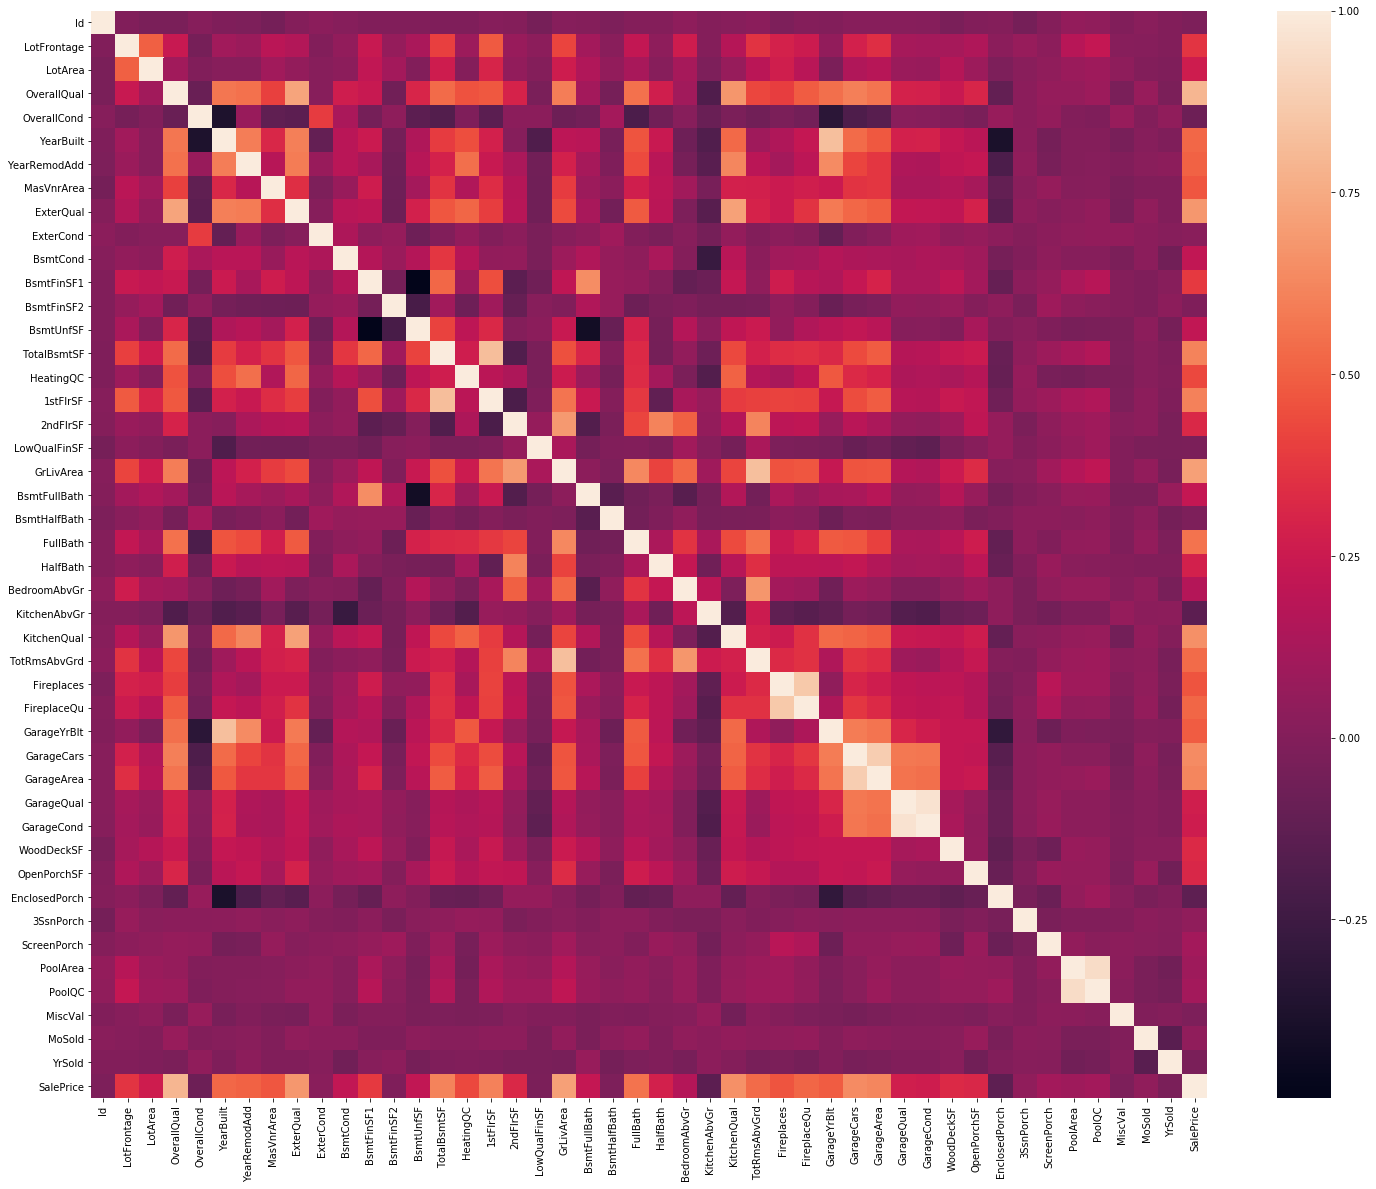

In [475]:
plt.figure(figsize=(25,20))
corr = housing.corr(method="pearson")
g = sns.heatmap(corr)
plt.show()

In [491]:
corr = housingNumeric.corr(method="pearson")
corrLot = corr['LotFrontage'][1:]
corrLot.sort_values

<bound method Series.sort_values of LotFrontage                   1.000000
LotArea                       0.497717
OverallQual                   0.235381
OverallCond                  -0.043117
YearBuilt                     0.104450
YearRemodAdd                  0.079822
MasVnrArea                    0.191852
ExterQual                     0.163103
ExterCond                     0.000689
BsmtCond                      0.051867
BsmtFinSF1                    0.239560
BsmtFinSF2                    0.061024
BsmtUnfSF                     0.130008
TotalBsmtSF                   0.402442
HeatingQC                     0.083263
1stFlrSF                      0.482041
2ndFlrSF                      0.072181
LowQualFinSF                  0.031737
GrLivArea                     0.417529
BsmtFullBath                  0.110927
BsmtHalfBath                  0.019435
FullBath                      0.218384
HalfBath                      0.040451
BedroomAbvGr                  0.260701
KitchenAbvGr                

In [72]:
corr = housing.corr(method="pearson")
corrSalesPrice = corr['SalePrice'][1:]

           SalePrice               
               count           mean
MSSubClass                         
s120              87  200779.080460
s160              63  138647.380952
s180              10  102300.000000
s190              30  129613.333333
s20              536  185224.811567
s30               69   95829.724638
s40                4  156125.000000
s45               12  108591.666667
s50              144  143302.972222
s60              299  239948.501672
s70               60  166772.416667
s75               16  192437.500000
s80               58  169736.551724
s85               20  147810.000000
s90               52  133541.076923


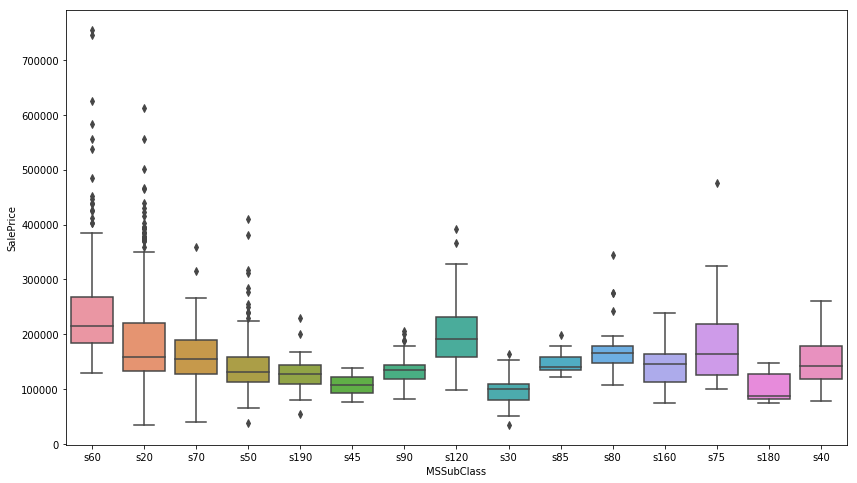

         SalePrice               
             count           mean
MSZoning                         
C (all)         10   74528.000000
FV              65  214014.061538
RH              16  131558.375000
RL            1151  191004.994787
RM             218  126316.830275


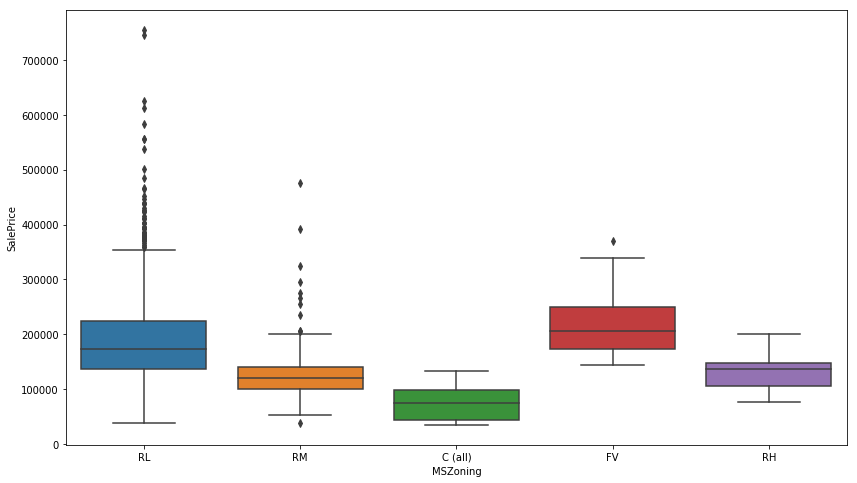

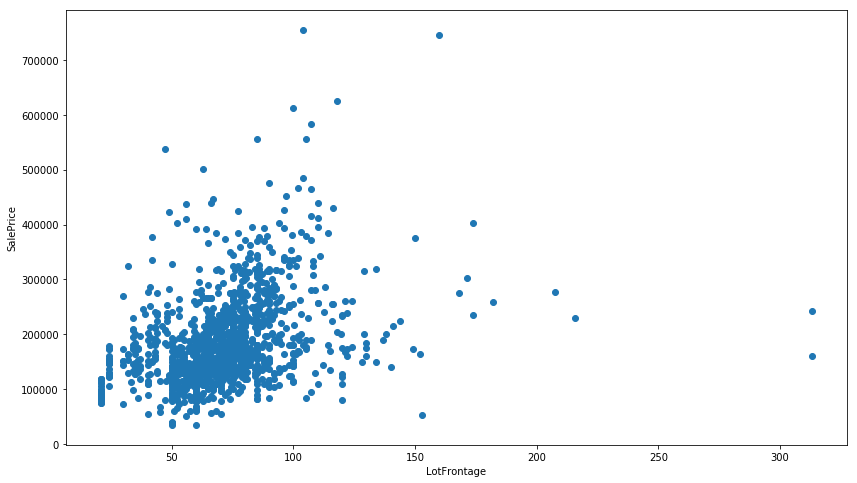

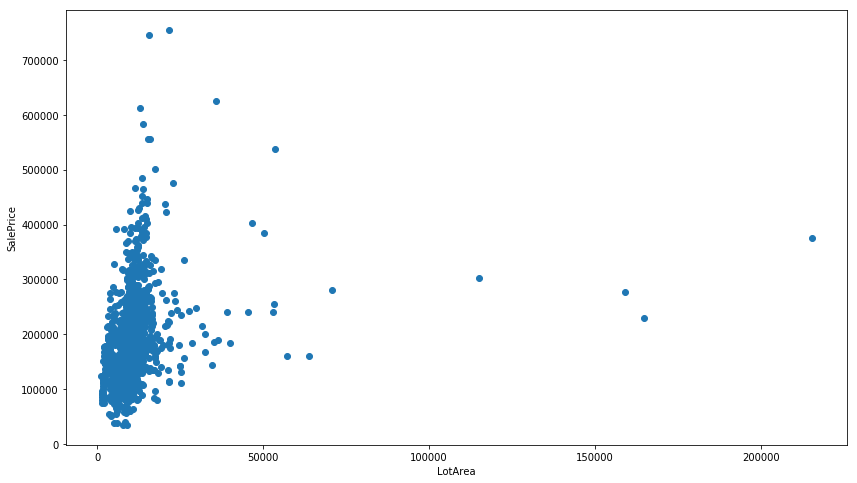

       SalePrice               
           count           mean
Street                         
Grvl           6  130190.500000
Pave        1454  181130.538514


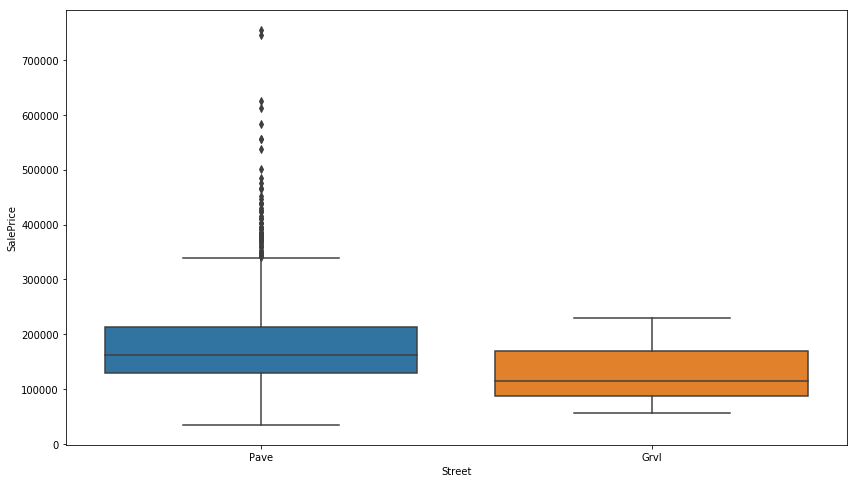

         SalePrice               
             count           mean
Alley                            
Grvl            50  122219.080000
No_alley      1369  183452.131483
Pave            41  168000.585366


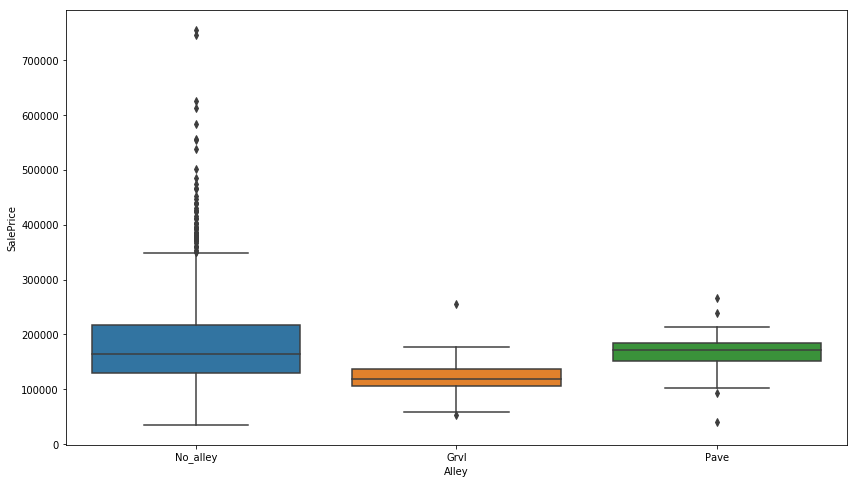

         SalePrice               
             count           mean
LotShape                         
IR1            484  206101.665289
IR2             41  239833.365854
IR3             10  216036.500000
Reg            925  164754.818378


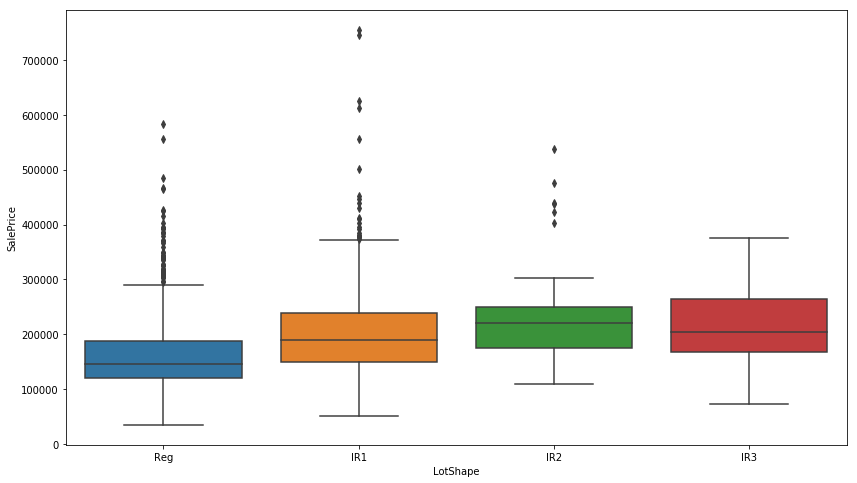

            SalePrice               
                count           mean
LandContour                         
Bnk                63  143104.079365
HLS                50  231533.940000
Low                36  203661.111111
Lvl              1311  180183.746758


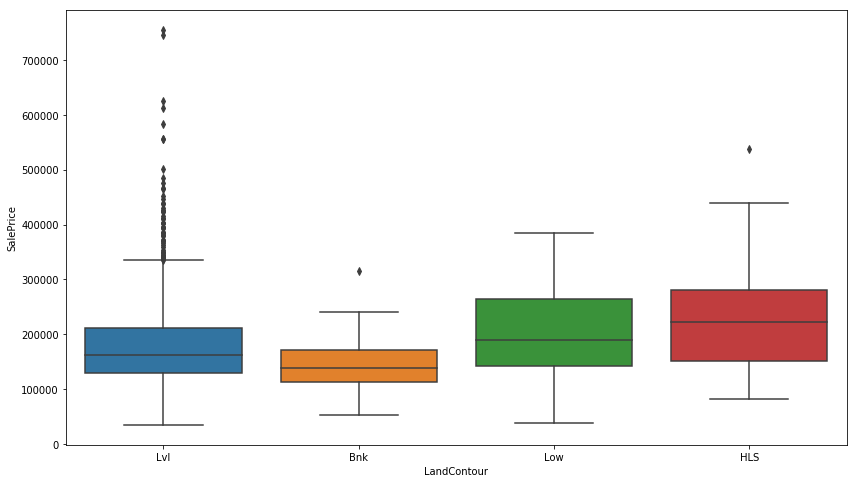

          SalePrice              
              count          mean
Utilities                        
AllPub         1459  180950.95682
NoSeWa            1  137500.00000


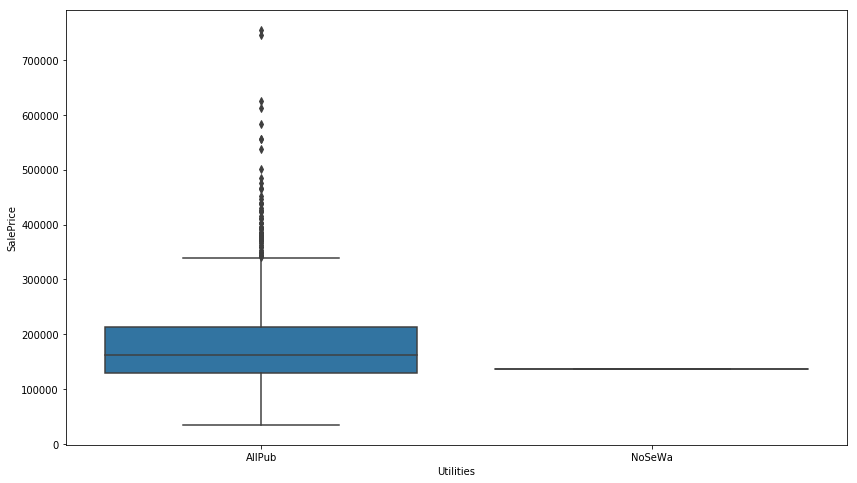

          SalePrice               
              count           mean
LotConfig                         
Corner          263  181623.425856
CulDSac          94  223854.617021
FR2              47  177934.574468
FR3               4  208475.000000
Inside         1052  176938.047529


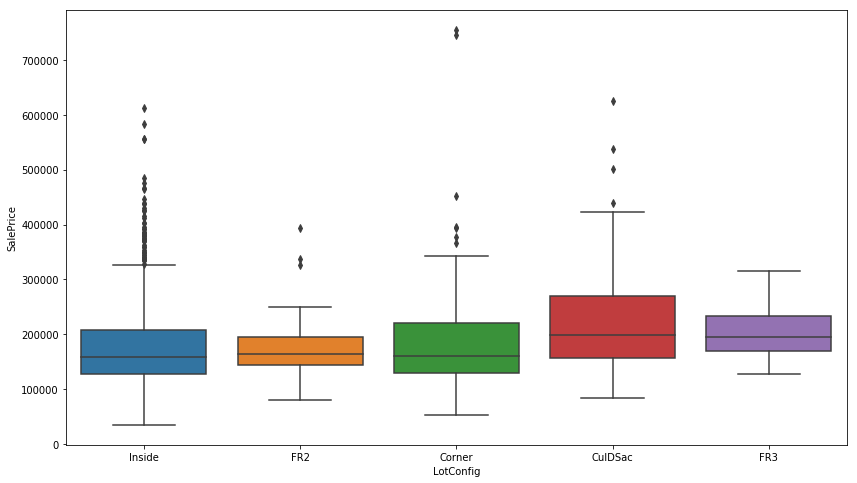

          SalePrice               
              count           mean
LandSlope                         
Gtl            1382  179956.799566
Mod              65  196734.138462
Sev              13  204379.230769


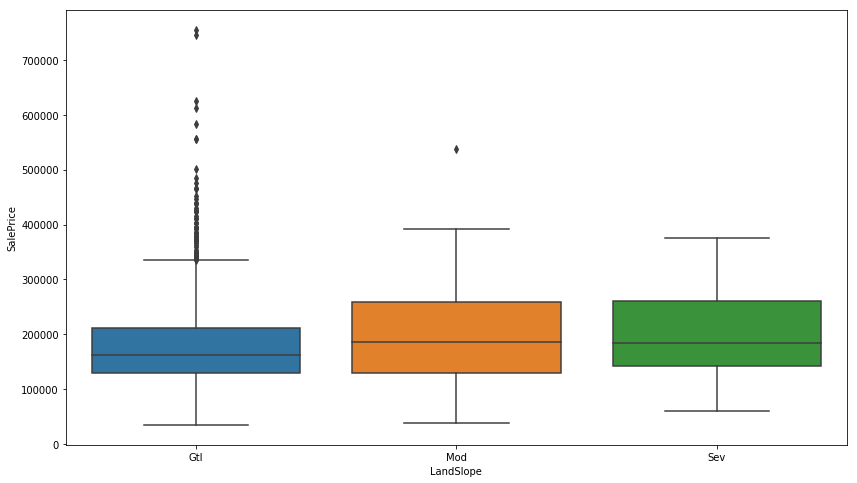

             SalePrice               
                 count           mean
Neighborhood                         
Blmngtn             17  194870.882353
Blueste              2  137500.000000
BrDale              16  104493.750000
BrkSide             58  124834.051724
ClearCr             28  212565.428571
CollgCr            150  197965.773333
Crawfor             51  210624.725490
Edwards            100  128219.700000
Gilbert             79  192854.506329
IDOTRR              37  100123.783784
MeadowV             17   98576.470588
Mitchel             49  156270.122449
NAmes              225  145847.080000
NPkVill              9  142694.444444
NWAmes              73  189050.068493
NoRidge             41  335295.317073
NridgHt             77  316270.623377
OldTown            113  128225.300885
SWISU               25  142591.360000
Sawyer              74  136793.135135
SawyerW             59  186555.796610
Somerst             86  225379.837209
StoneBr             25  310499.000000
Timber      

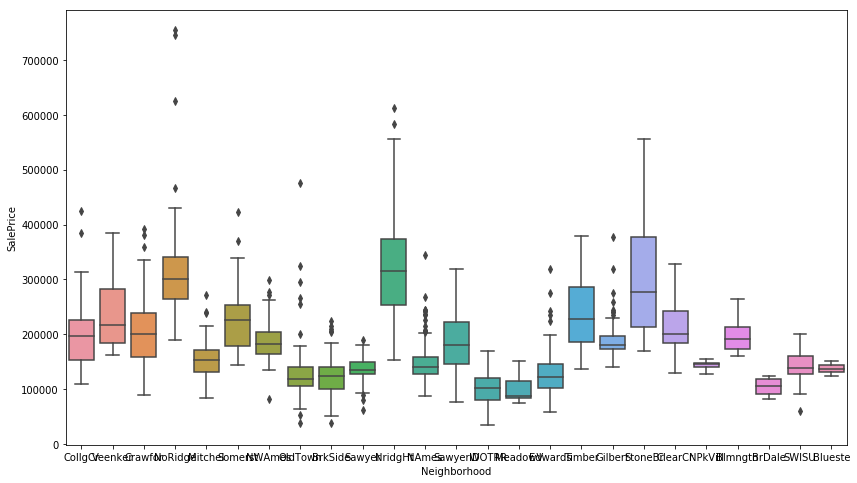

           SalePrice               
               count           mean
Condition1                         
Artery            48  135091.666667
Feedr             81  142475.481481
Norm            1260  184495.492063
PosA               8  225875.000000
PosN              19  215184.210526
RRAe              11  138400.000000
RRAn              26  184396.615385
RRNe               2  190750.000000
RRNn               5  212400.000000


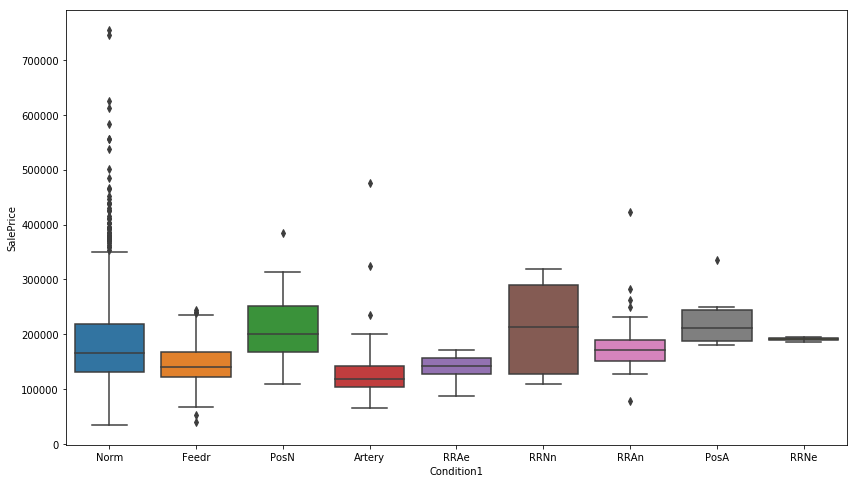

           SalePrice               
               count           mean
Condition2                         
Artery             2  106500.000000
Feedr              6  121166.666667
Norm            1445  181169.405536
PosA               1  325000.000000
PosN               2  284875.000000
RRAe               1  190000.000000
RRAn               1  136905.000000
RRNn               2   96750.000000


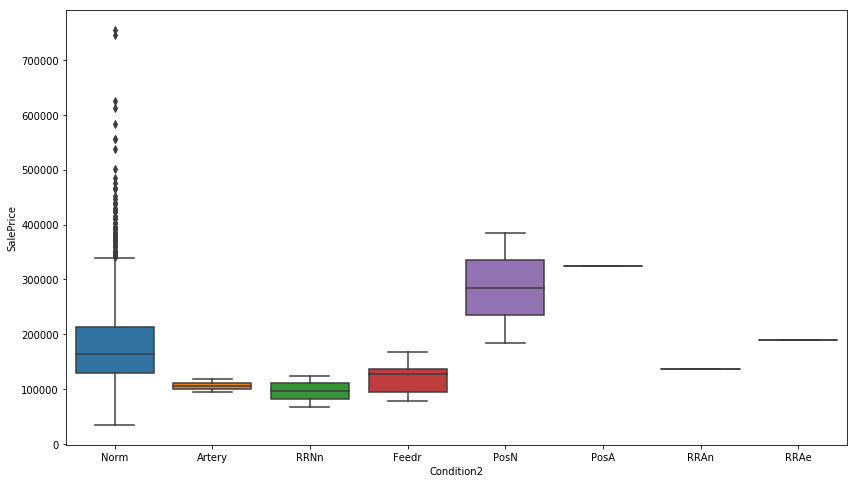

         SalePrice               
             count           mean
BldgType                         
1Fam          1220  185763.807377
2fmCon          31  128432.258065
Duplex          52  133541.076923
Twnhs           43  135911.627907
TwnhsE         114  181959.342105


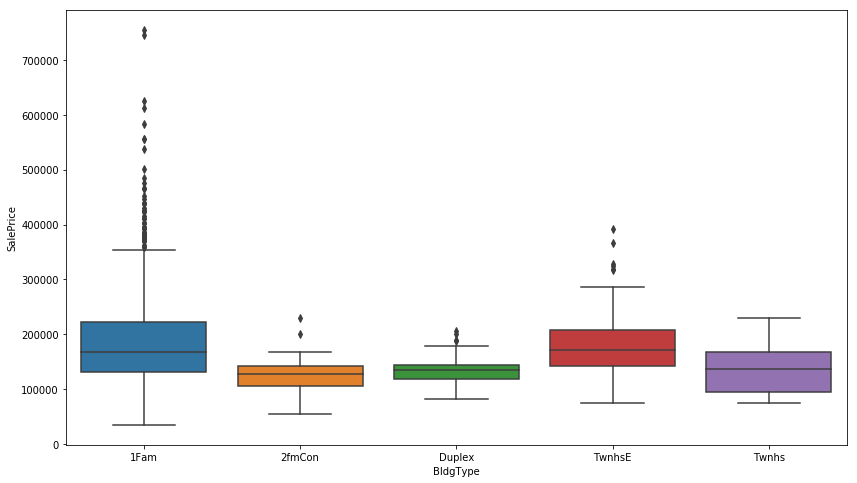

           SalePrice               
               count           mean
HouseStyle                         
1.5Fin           154  143116.740260
1.5Unf            14  110150.000000
1Story           726  175985.477961
2.5Fin             8  220000.000000
2.5Unf            11  157354.545455
2Story           445  210051.764045
SFoyer            37  135074.486486
SLvl              65  166703.384615


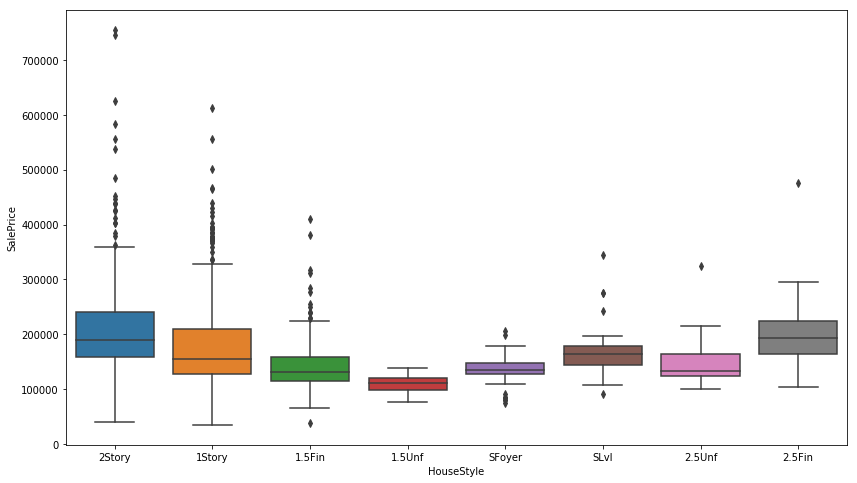

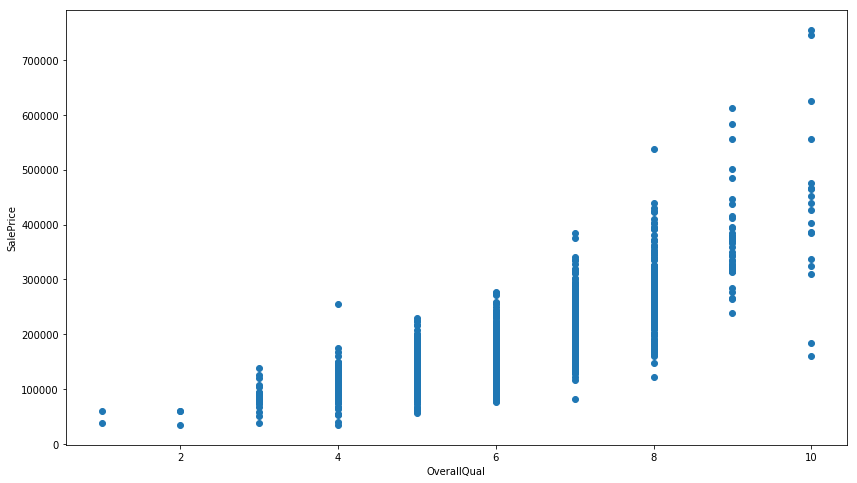

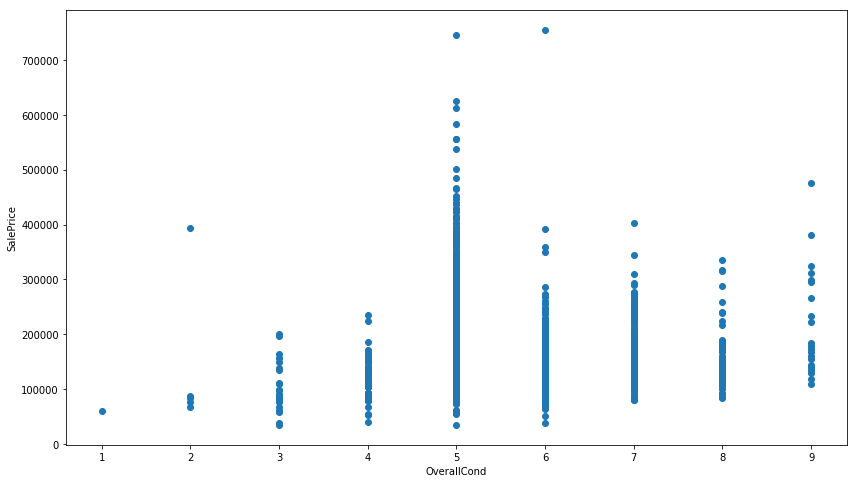

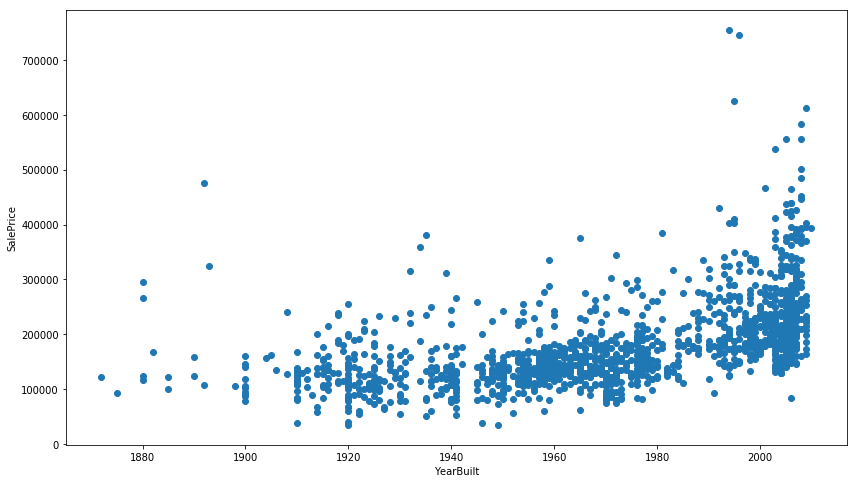

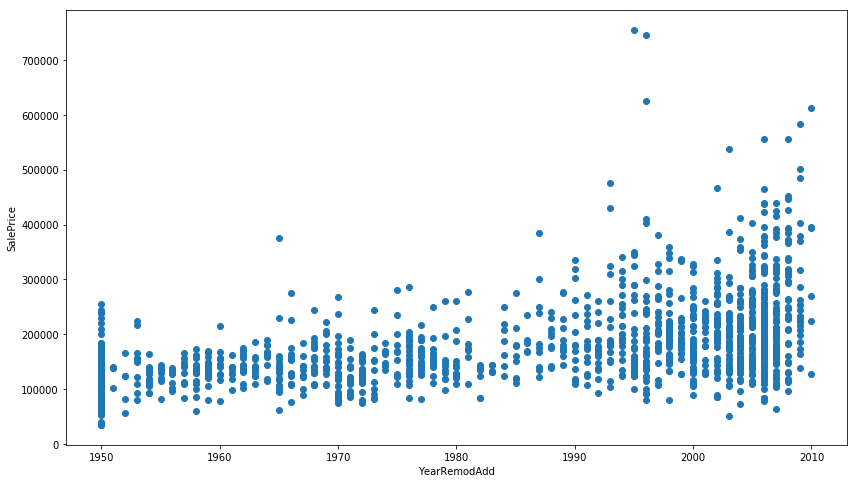

          SalePrice               
              count           mean
RoofStyle                         
Flat             13  194690.000000
Gable          1141  171483.956179
Gambrel          11  148909.090909
Hip             286  218876.933566
Mansard           7  180568.428571
Shed              2  225000.000000


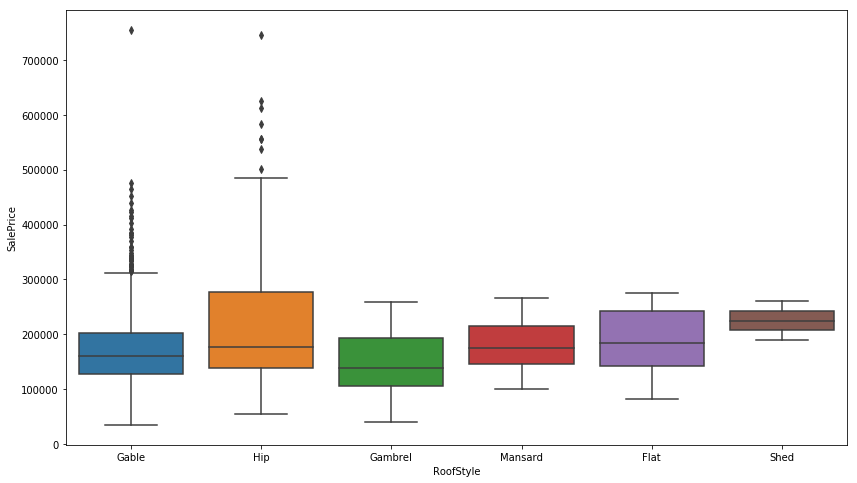

         SalePrice               
             count           mean
RoofMatl                         
ClyTile          1  160000.000000
CompShg       1434  179803.679219
Membran          1  241500.000000
Metal            1  180000.000000
Roll             1  137000.000000
Tar&Grv         11  185406.363636
WdShake          5  241400.000000
WdShngl          6  390250.000000


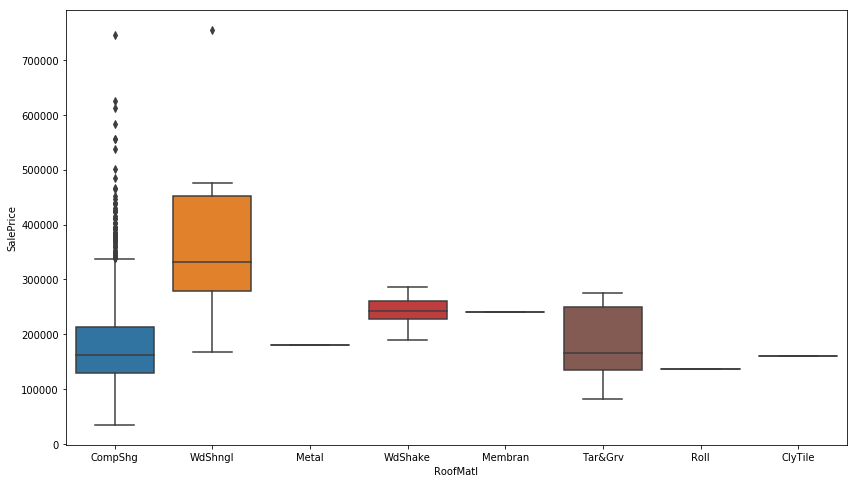

            SalePrice               
                count           mean
Exterior1st                         
AsbShng            20  107385.550000
AsphShn             1  100000.000000
BrkComm             2   71000.000000
BrkFace            50  194573.000000
CBlock              1  105000.000000
CemntBd            61  231690.655738
HdBoard           222  163077.450450
ImStucc             1  262000.000000
MetalSd           220  149422.177273
Plywood           108  175942.379630
Stone               2  258500.000000
Stucco             25  162990.000000
VinylSd           515  213732.900971
Wd Sdng           206  149841.645631
WdShing            26  150655.076923


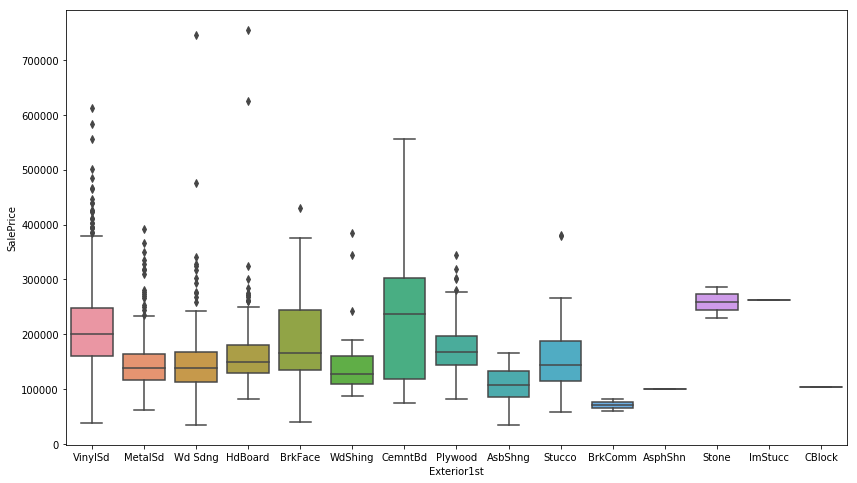

            SalePrice               
                count           mean
Exterior2nd                         
AsbShng            20  114060.550000
AsphShn             3  138000.000000
Brk Cmn             7  126714.285714
BrkFace            25  195818.000000
CBlock              1  105000.000000
CmentBd            60  230093.833333
HdBoard           207  167661.565217
ImStucc            10  252070.000000
MetalSd           214  149803.172897
Other               1  319000.000000
Plywood           142  168112.387324
Stone               5  158224.800000
Stucco             26  155905.153846
VinylSd           504  214432.460317
Wd Sdng           197  148386.065990
Wd Shng            38  161328.947368


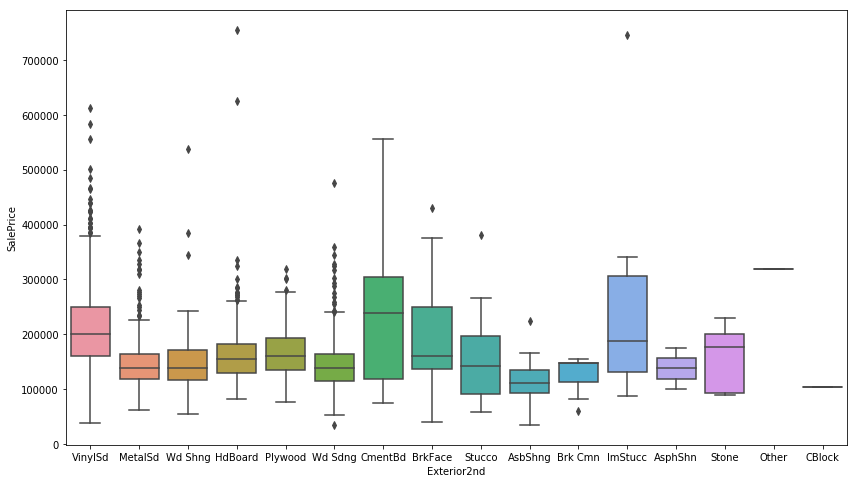

           SalePrice               
               count           mean
MasVnrType                         
BrkCmn            15  146318.066667
BrkFace          445  204691.871910
None             872  156958.243119
Stone            128  265583.625000


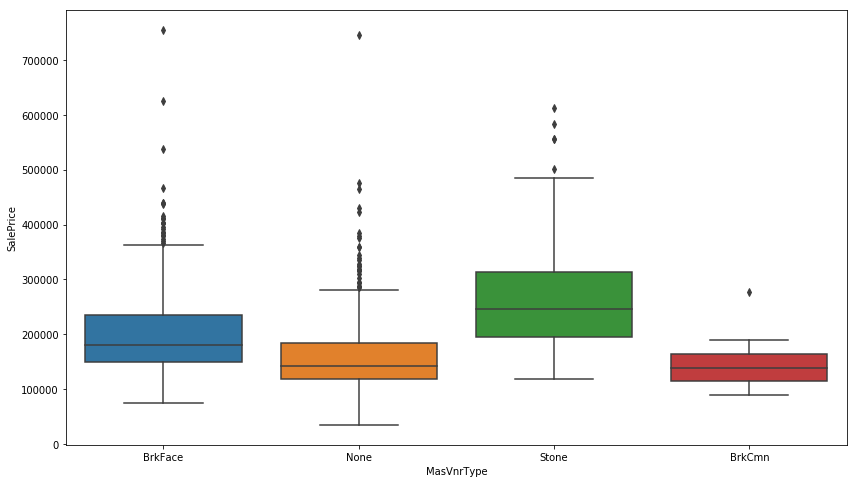

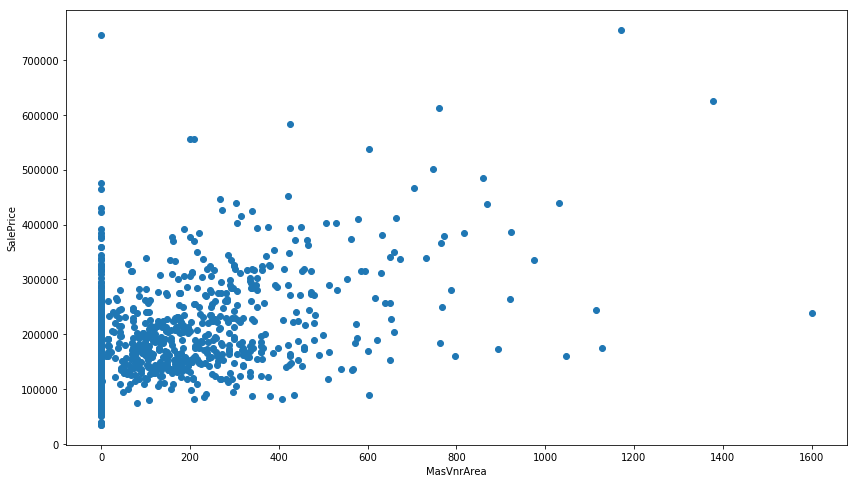

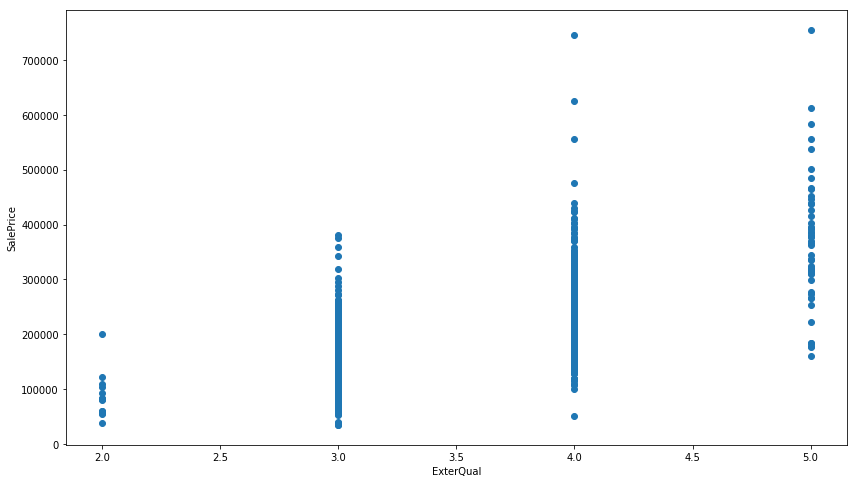

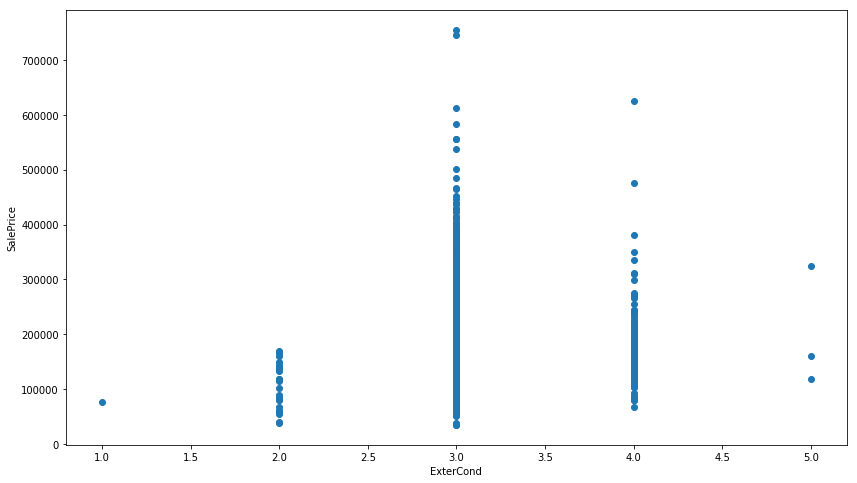

           SalePrice               
               count           mean
Foundation                         
BrkTil           146  132291.075342
CBlock           634  149805.714511
PConc            647  225230.442040
Slab              24  107365.625000
Stone              6  165959.166667
Wood               3  185666.666667


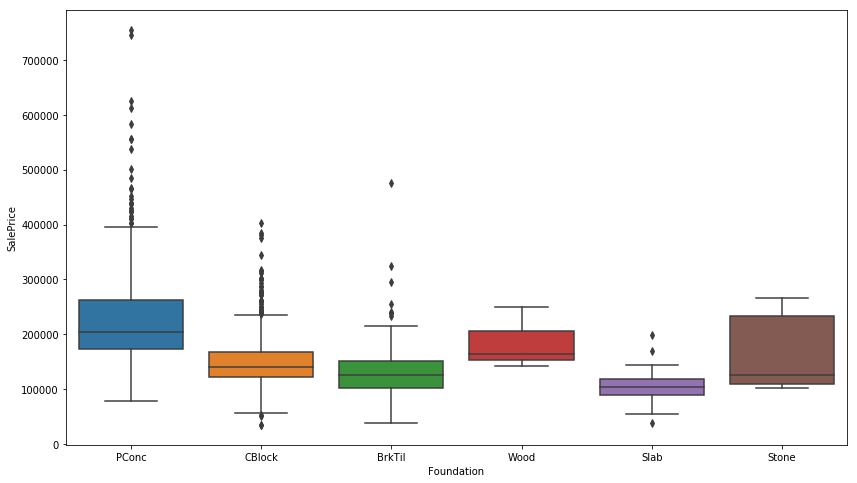

         SalePrice               
             count           mean
BsmtQual                         
Ex             121  327041.041322
Fa              35  115692.028571
Gd             618  202688.478964
TA             649  140759.818182


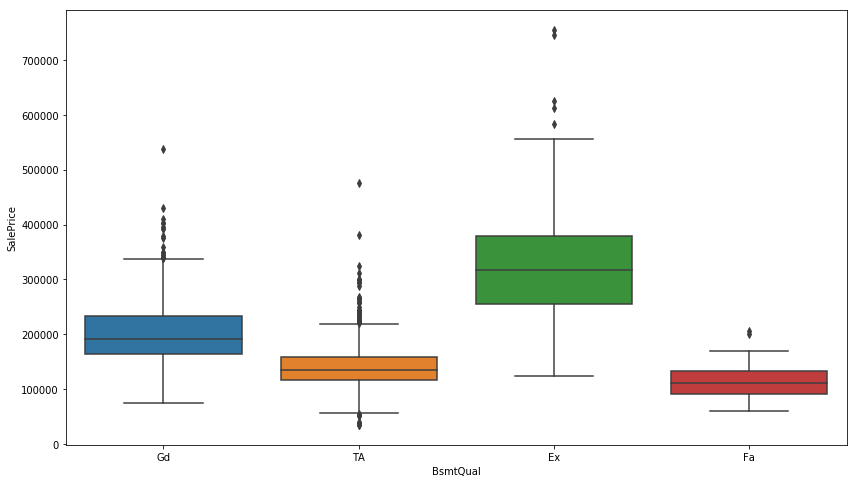

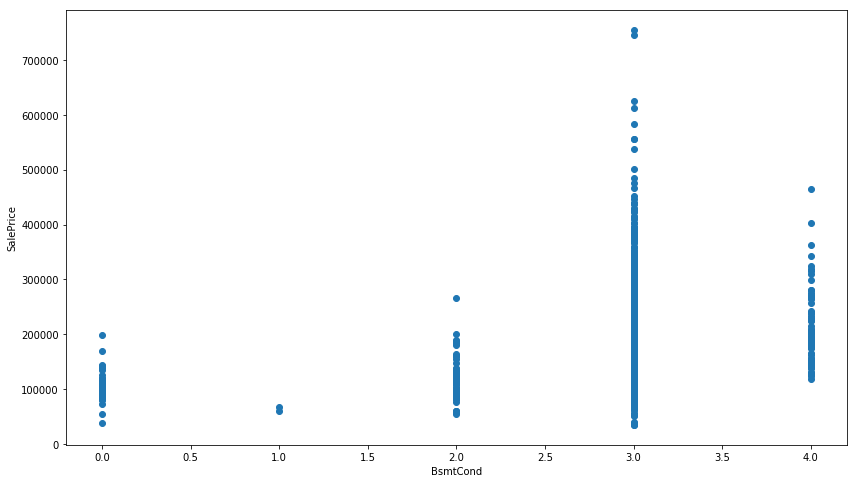

             SalePrice               
                 count           mean
BsmtExposure                         
Av                 221  206643.420814
Gd                 134  257689.805970
Mn                 114  192789.657895
No                 953  165652.295908


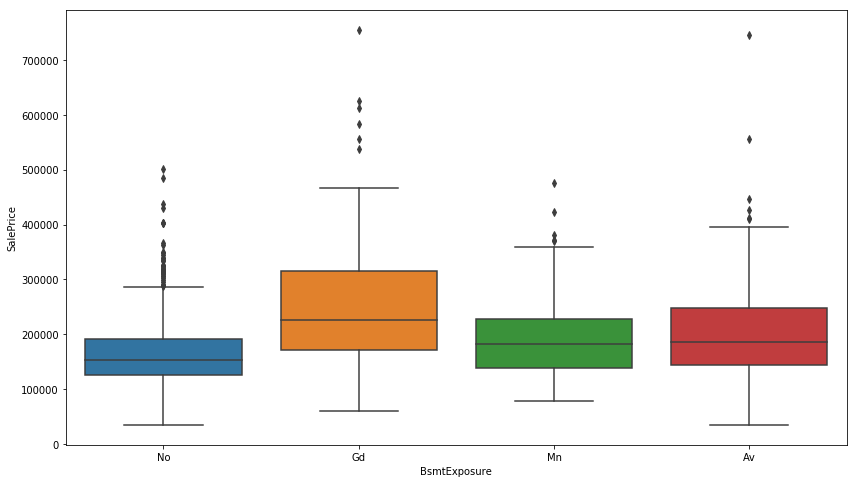

             SalePrice               
                 count           mean
BsmtFinType1                         
ALQ                220  161573.068182
BLQ                148  149493.655405
GLQ                418  235413.720096
LwQ                 74  151852.702703
Rec                133  146889.248120
Unf                430  170670.576744


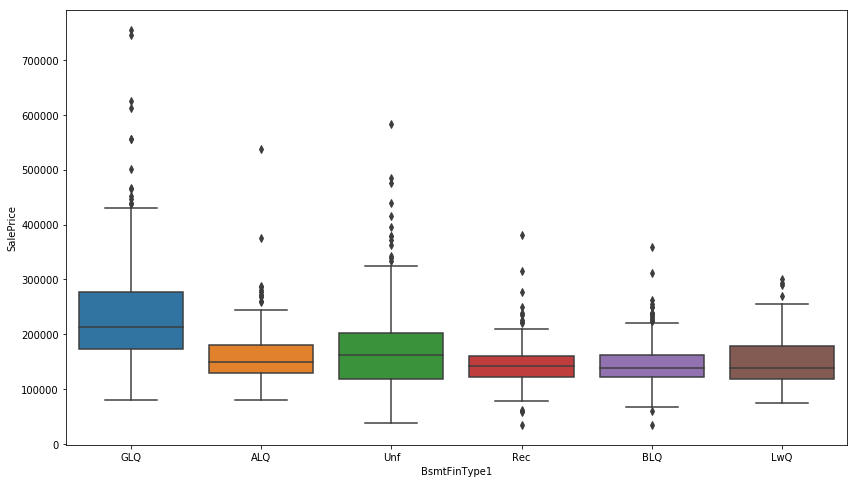

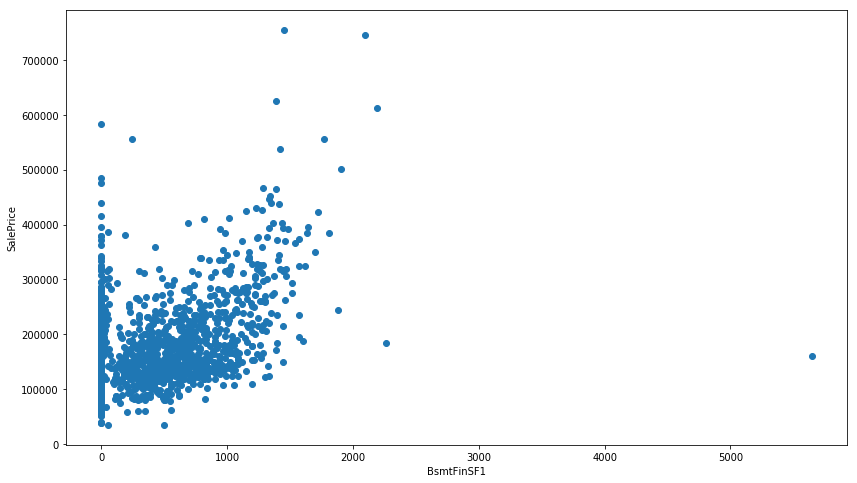

             SalePrice               
                 count           mean
BsmtFinType2                         
ALQ                 19  209942.105263
BLQ                 33  151101.000000
GLQ                 14  180982.142857
LwQ                 46  164364.130435
Rec                 54  164917.129630
Unf               1256  184694.690287


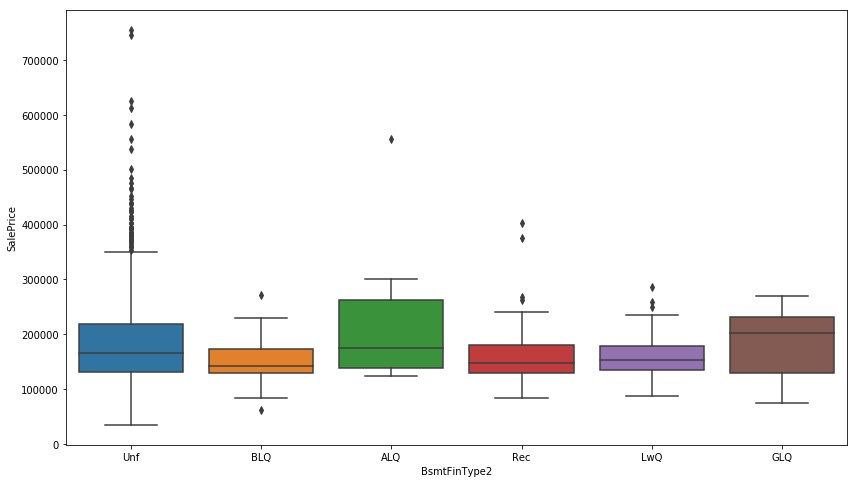

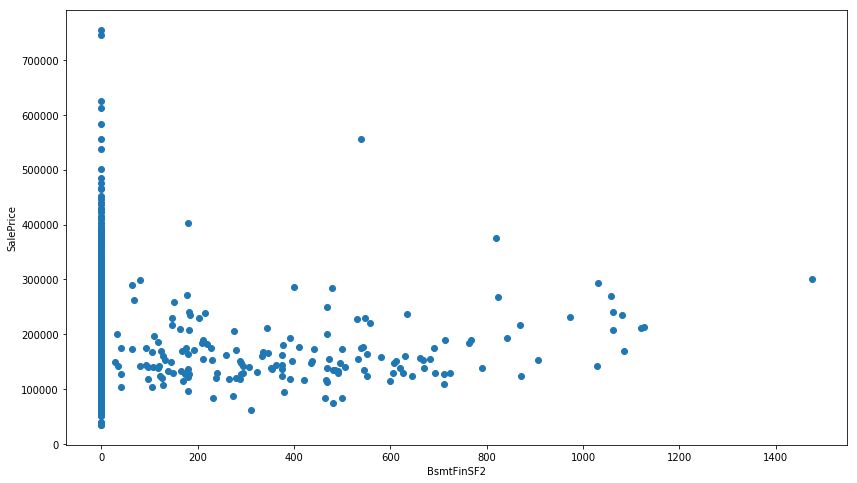

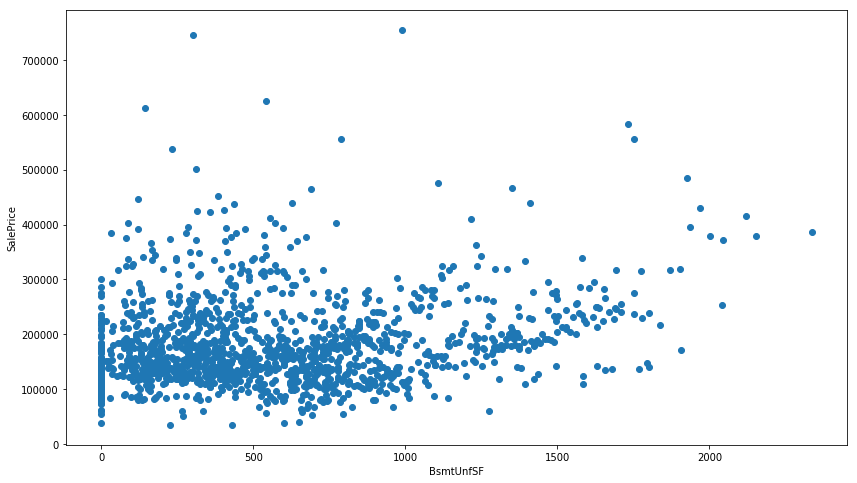

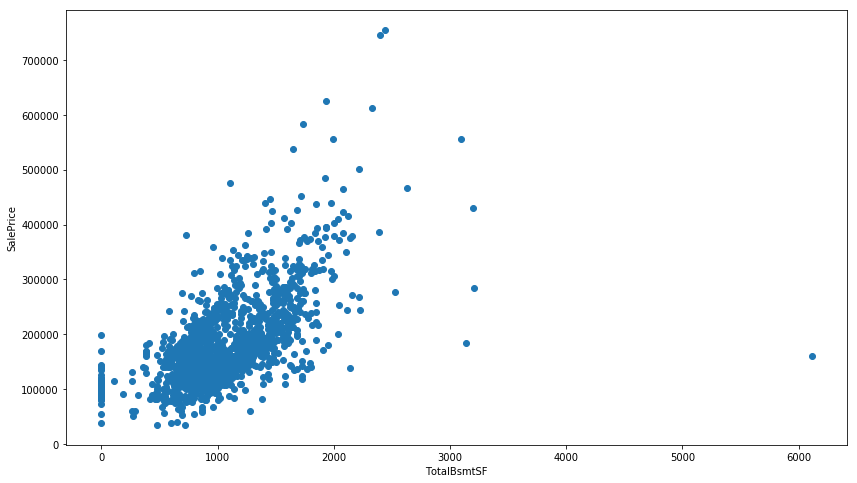

        SalePrice               
            count           mean
Heating                         
Floor           1   72500.000000
GasA         1428  182021.195378
GasW           18  166632.166667
Grav            7   75271.428571
OthW            2  125750.000000
Wall            4   92100.000000


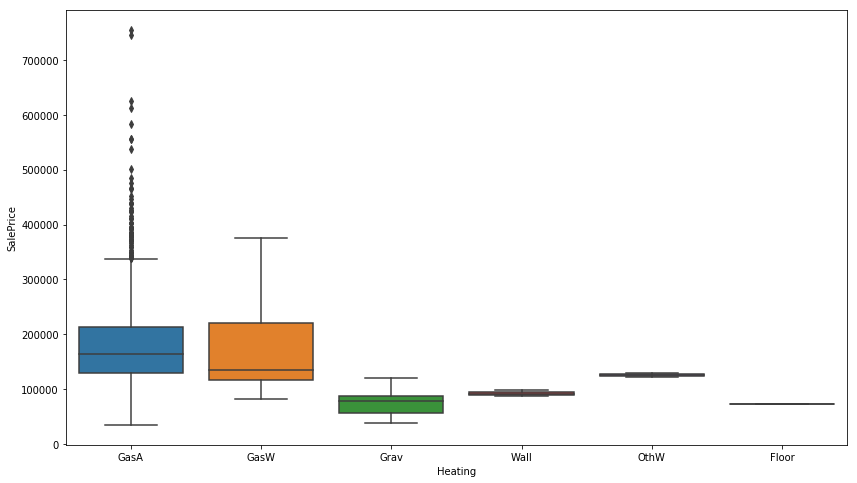

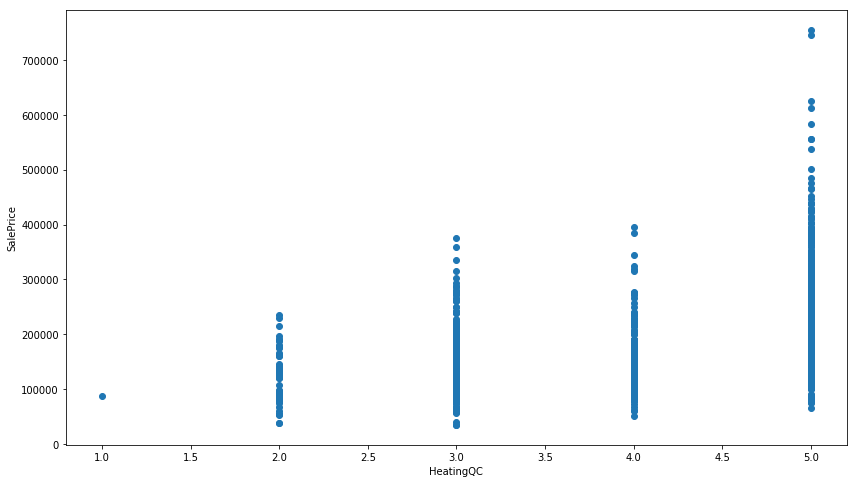

           SalePrice               
               count           mean
CentralAir                         
N                 95  105264.073684
Y               1365  186186.709890


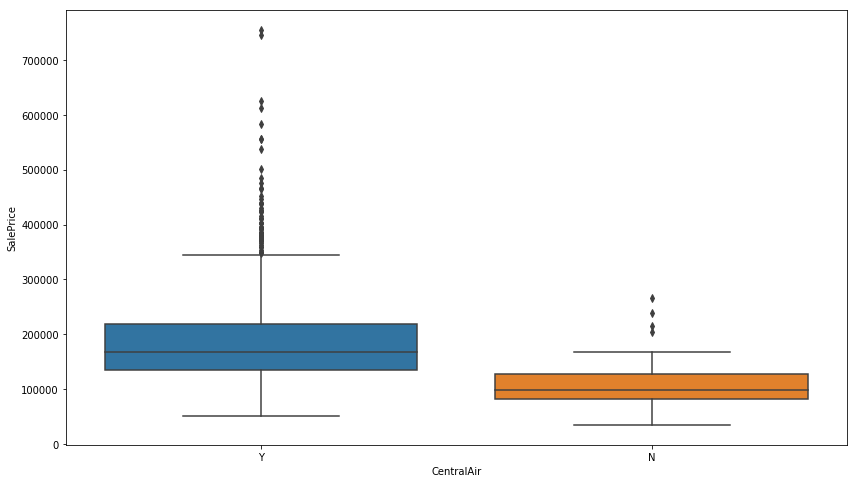

           SalePrice               
               count           mean
Electrical                         
FuseA             94  122196.893617
FuseF             27  107675.444444
FuseP              3   97333.333333
Mix                1   67000.000000
SBrkr           1335  186810.637453


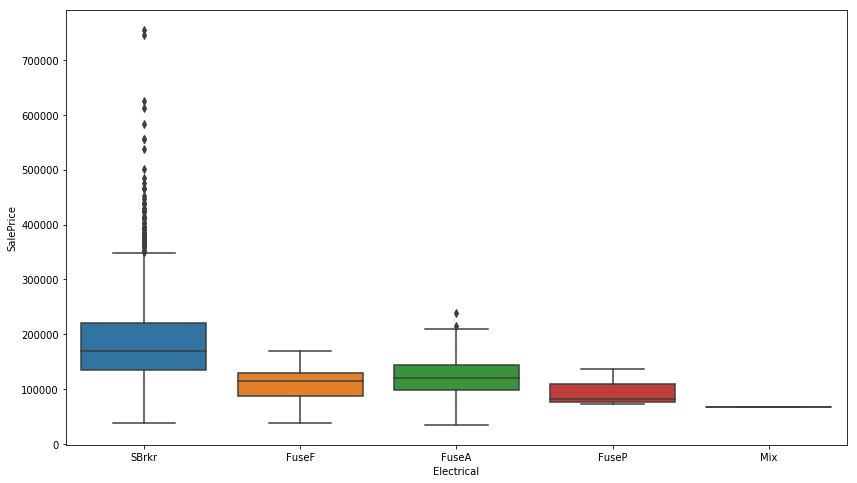

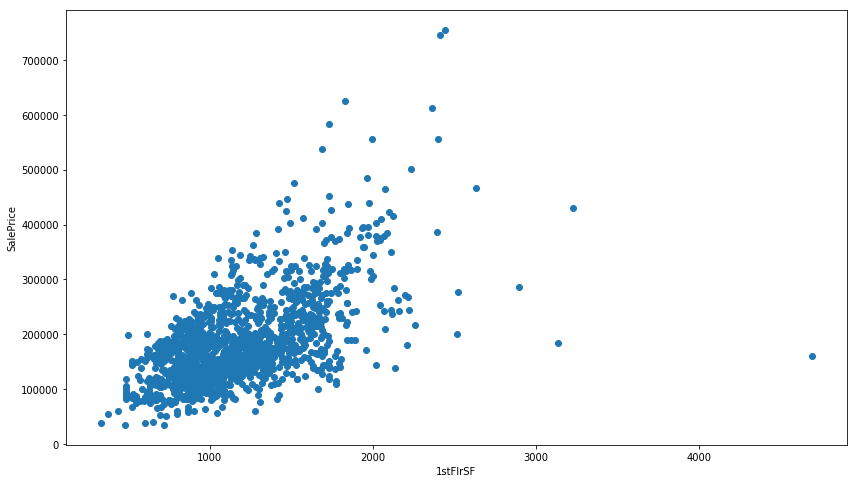

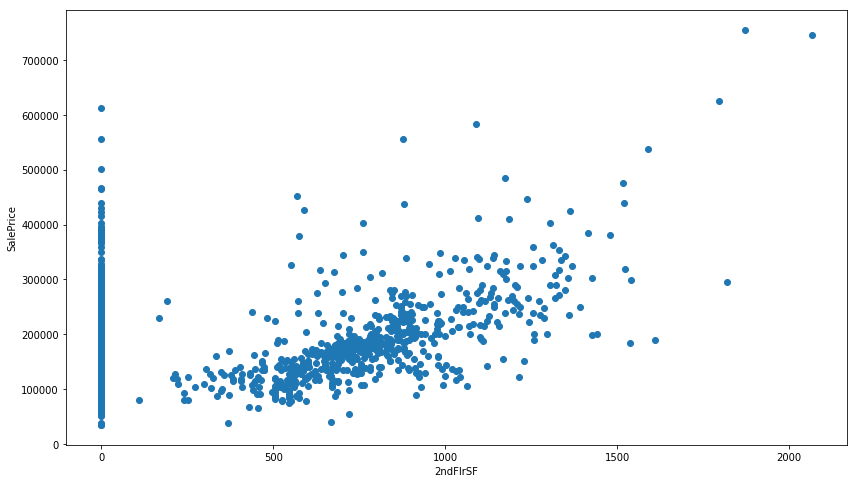

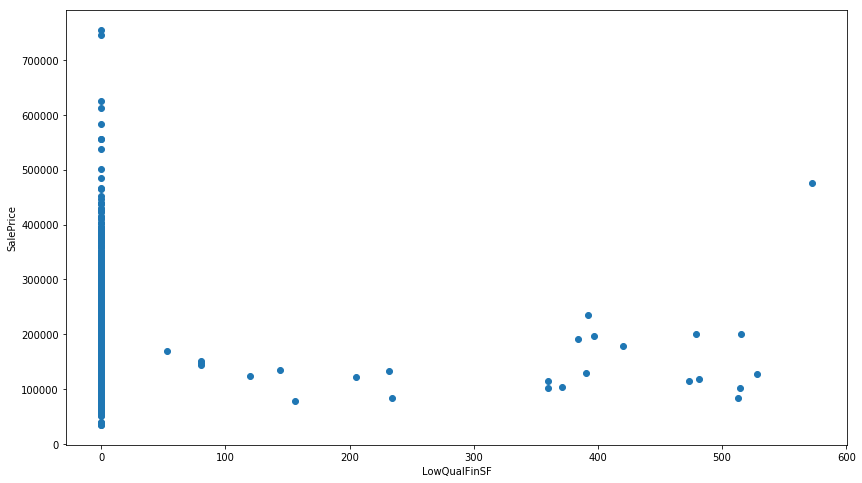

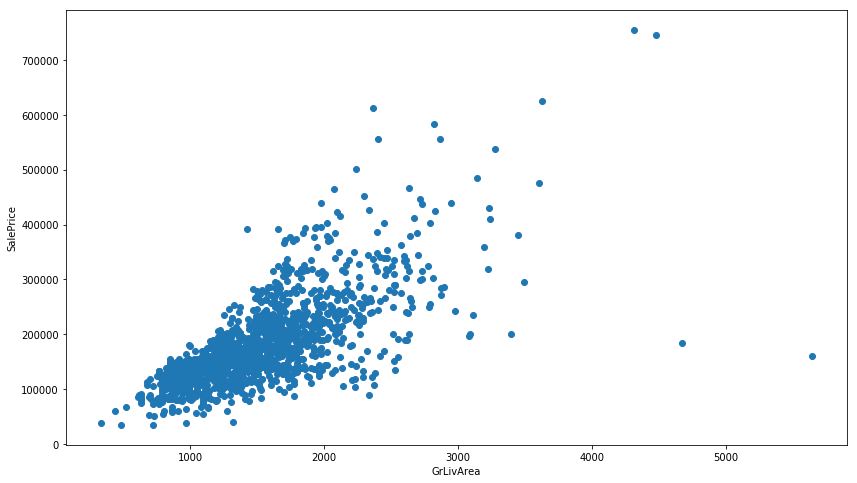

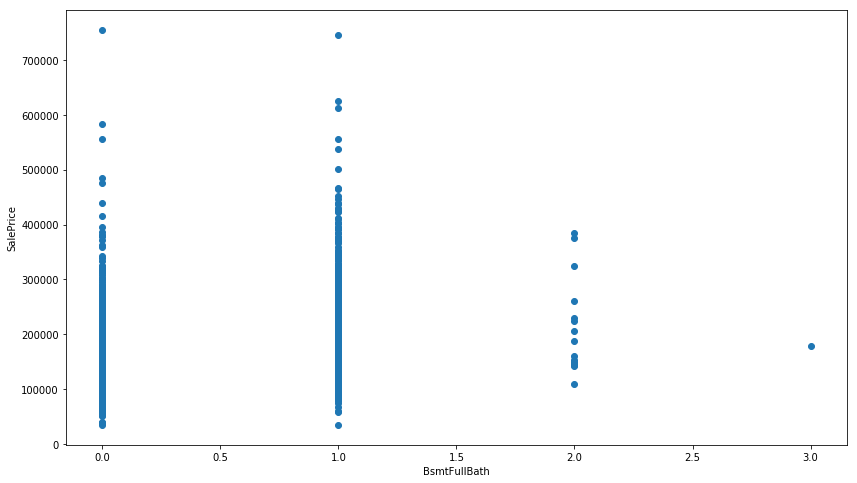

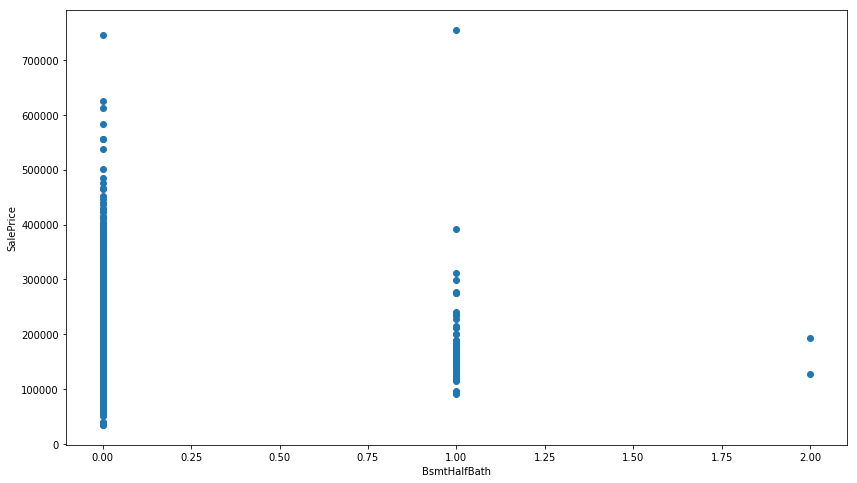

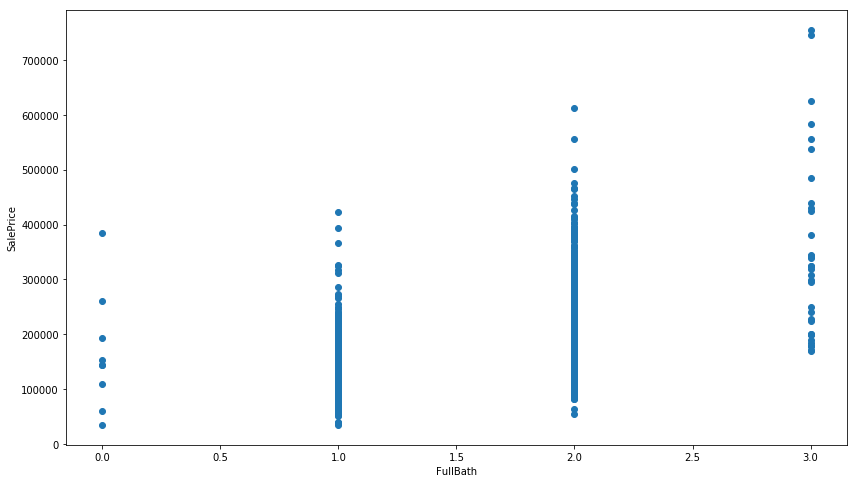

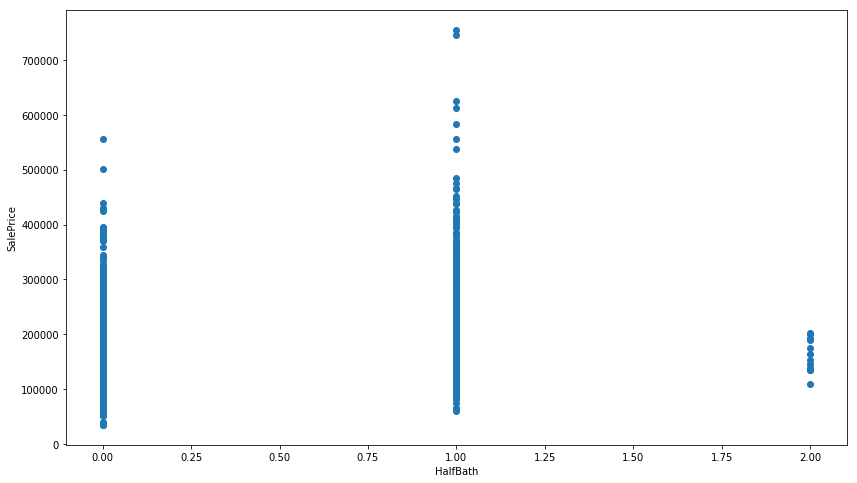

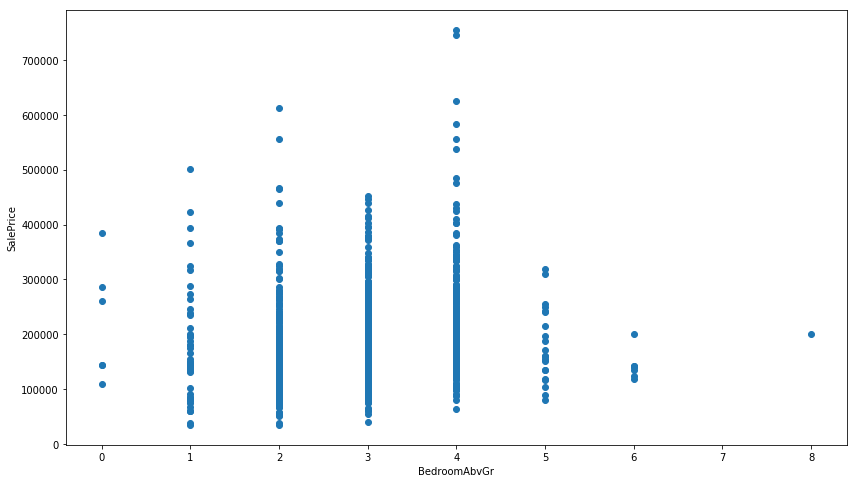

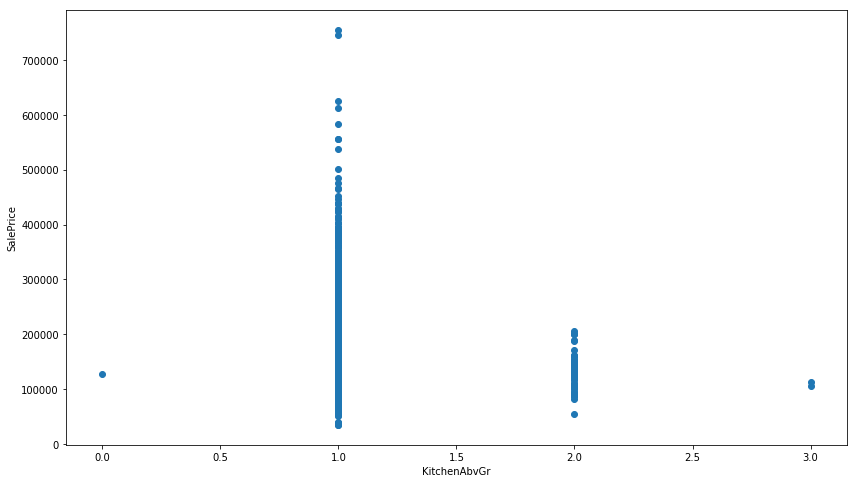

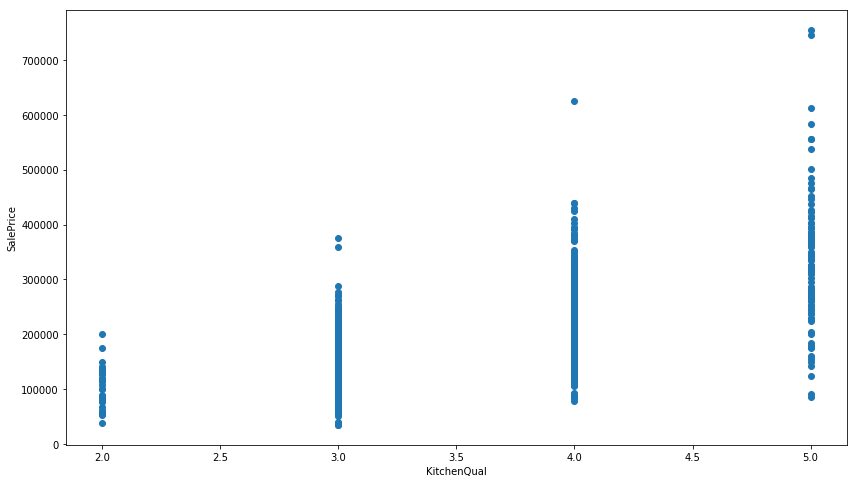

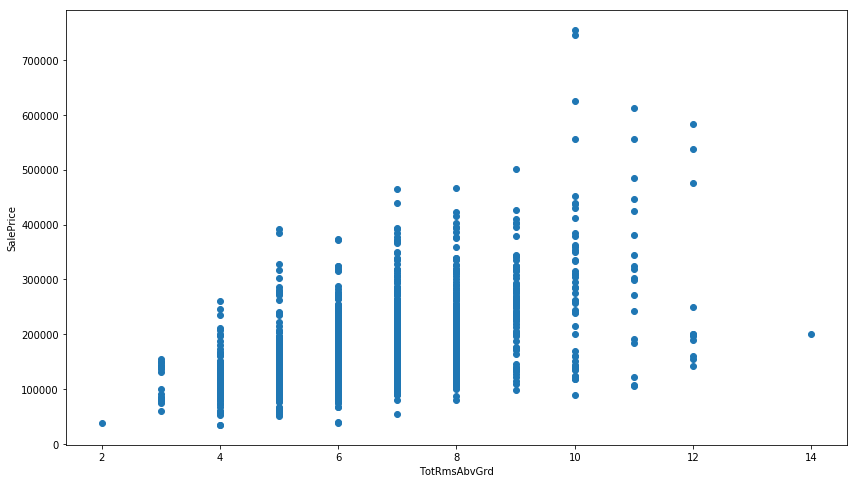

           SalePrice               
               count           mean
Functional                         
Maj1              14  153948.142857
Maj2               5   85800.000000
Min1              31  146385.483871
Min2              34  144240.647059
Mod               15  168393.333333
Sev                1  129000.000000
Typ             1360  183429.147059


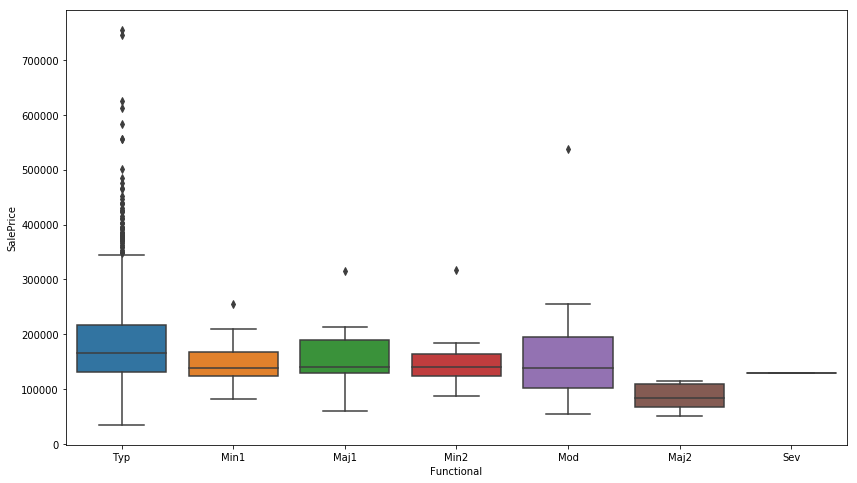

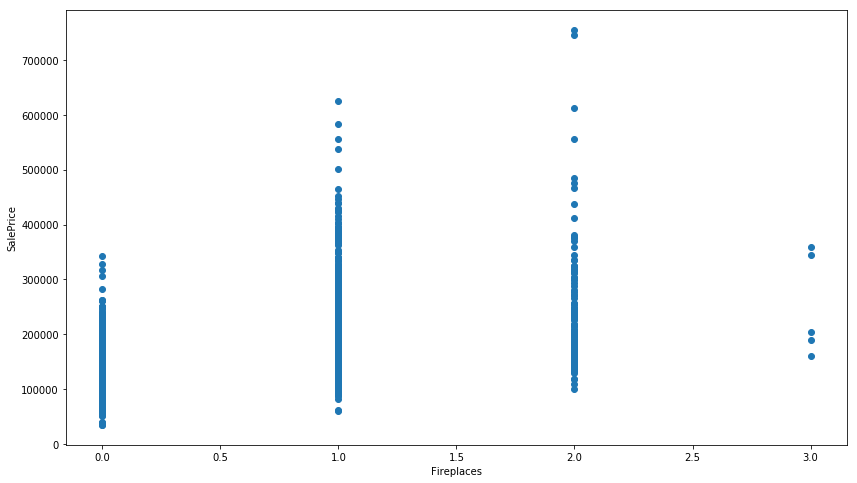

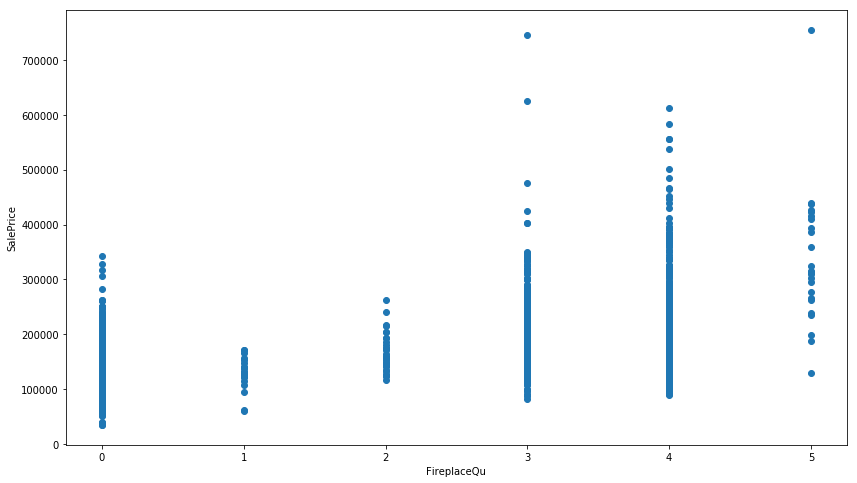

           SalePrice               
               count           mean
GarageType                         
2Types             6  151283.333333
Attchd           870  202892.656322
Basment           19  160570.684211
BuiltIn           88  254751.738636
CarPort            9  109962.111111
Detchd           387  134091.162791


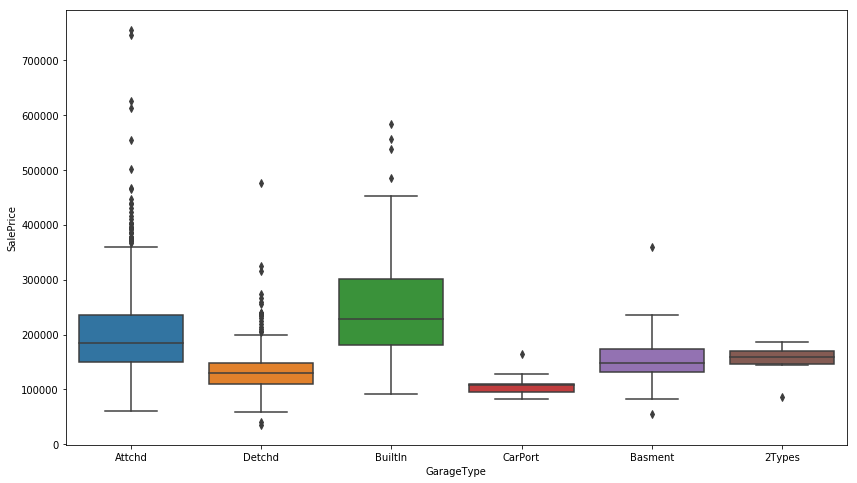

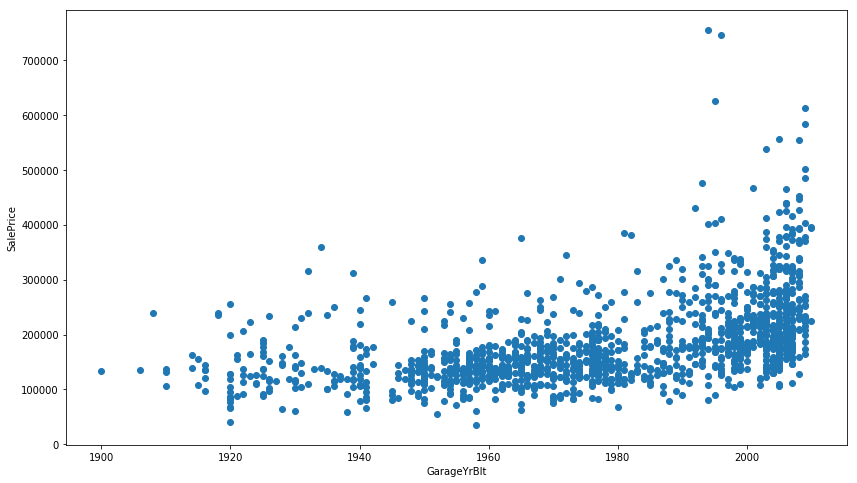

             SalePrice               
                 count           mean
GarageFinish                         
Fin                352  240052.690341
RFn                422  202068.869668
Unf                605  142156.423140


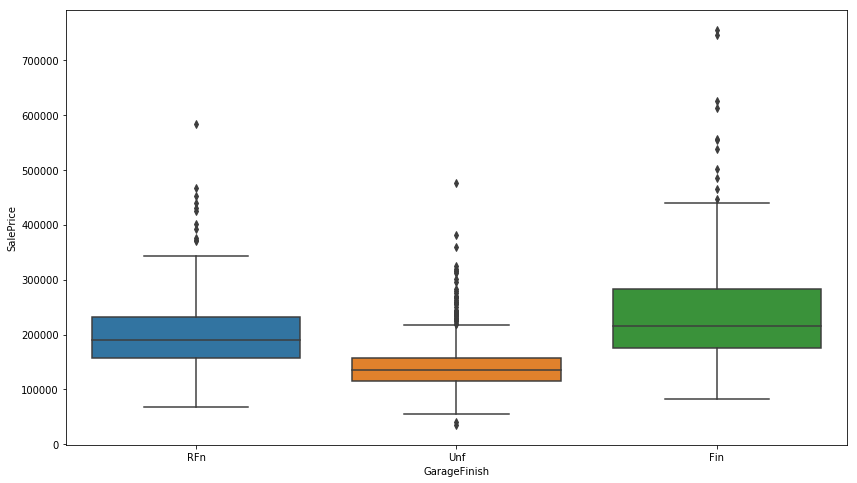

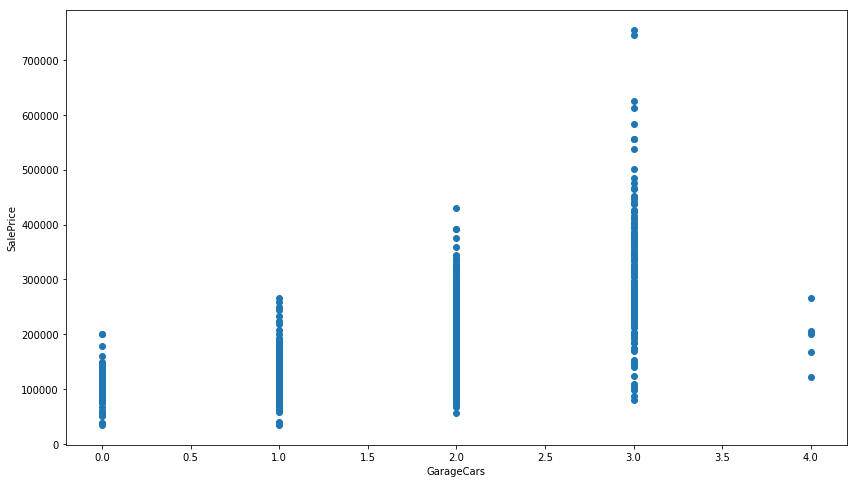

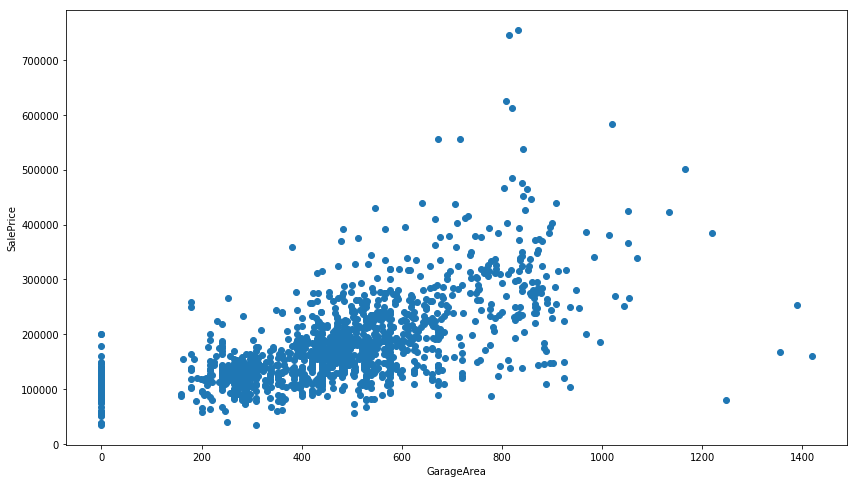

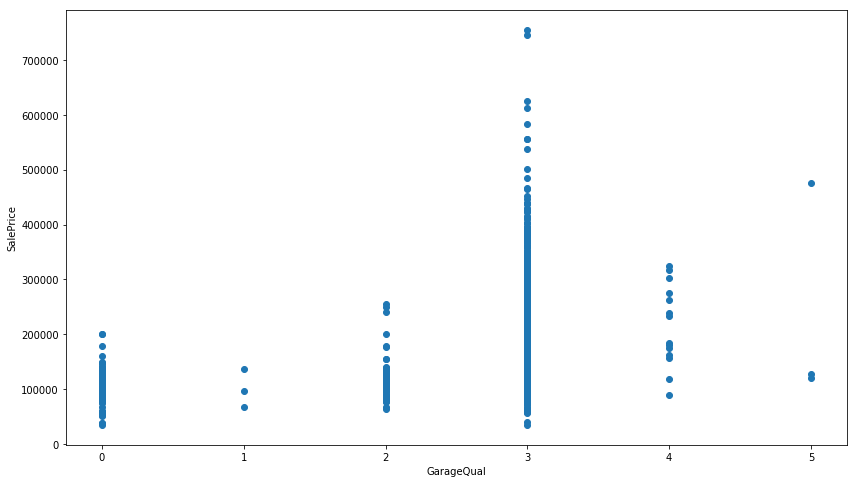

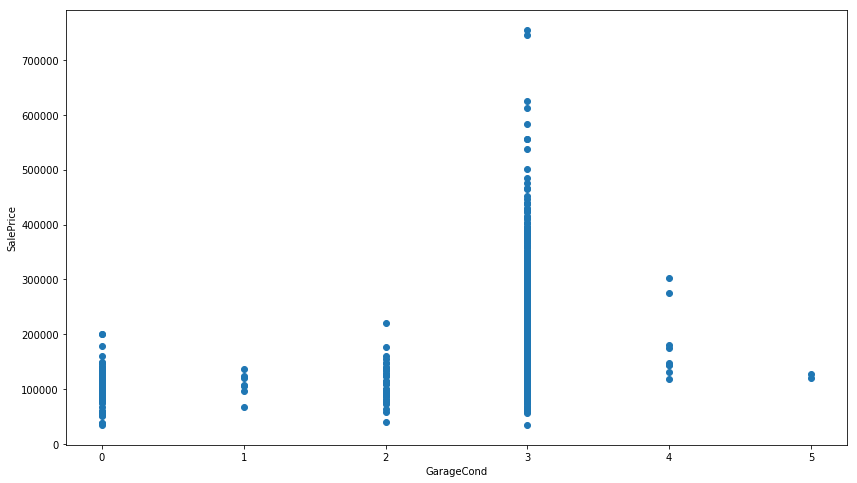

           SalePrice               
               count           mean
PavedDrive                         
N                 90  115039.122222
P                 30  132330.000000
Y               1340  186433.973881


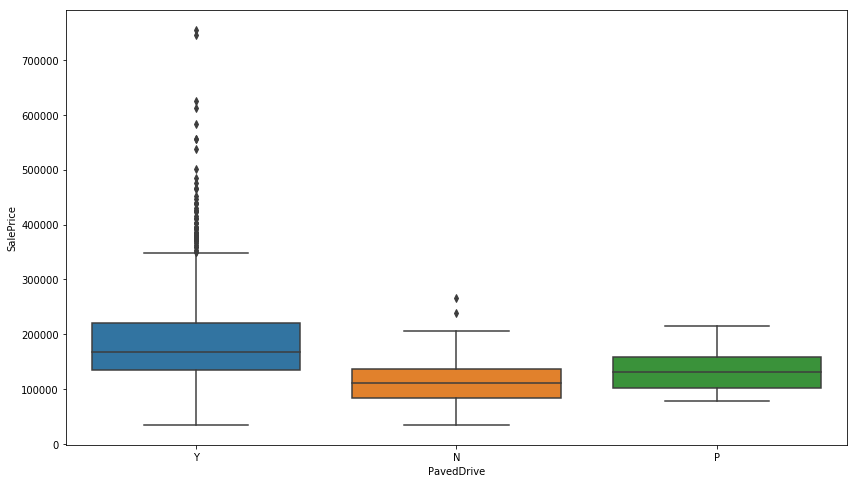

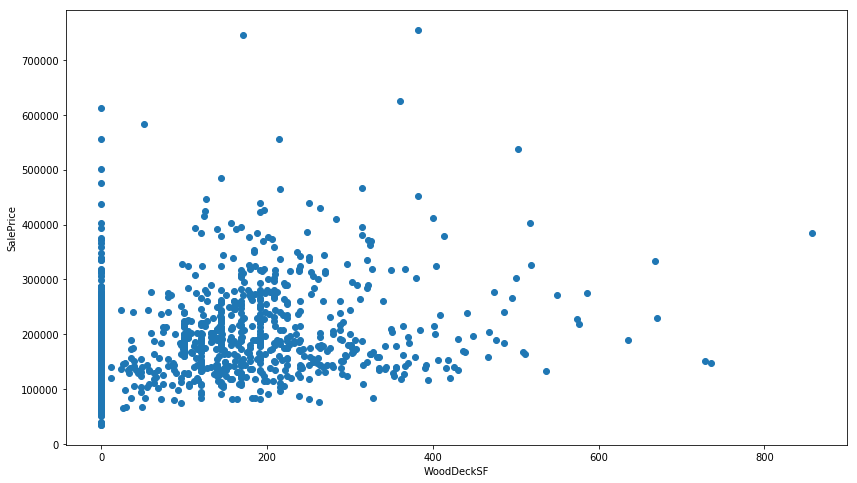

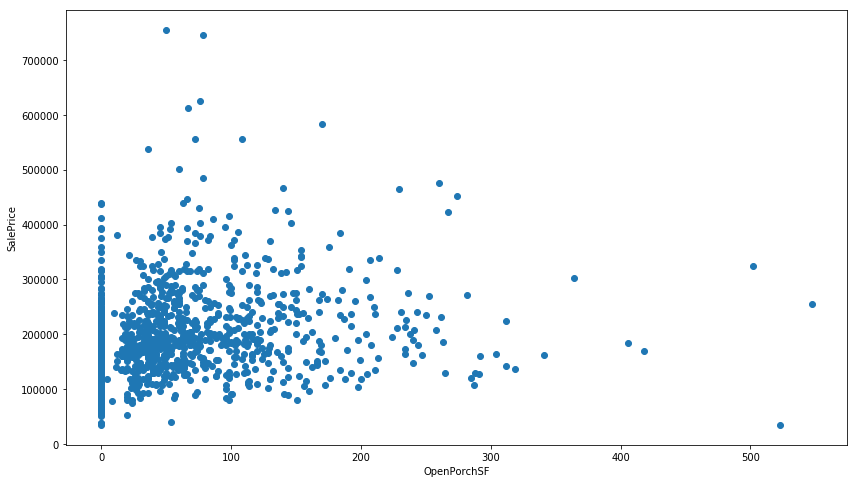

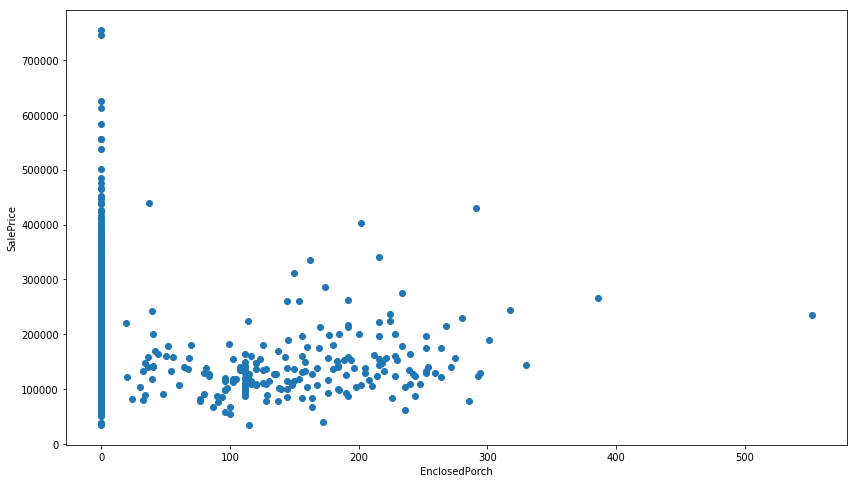

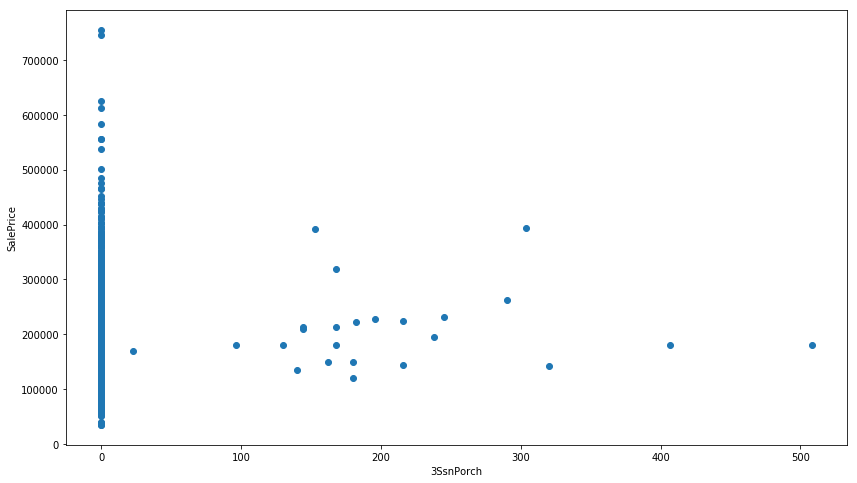

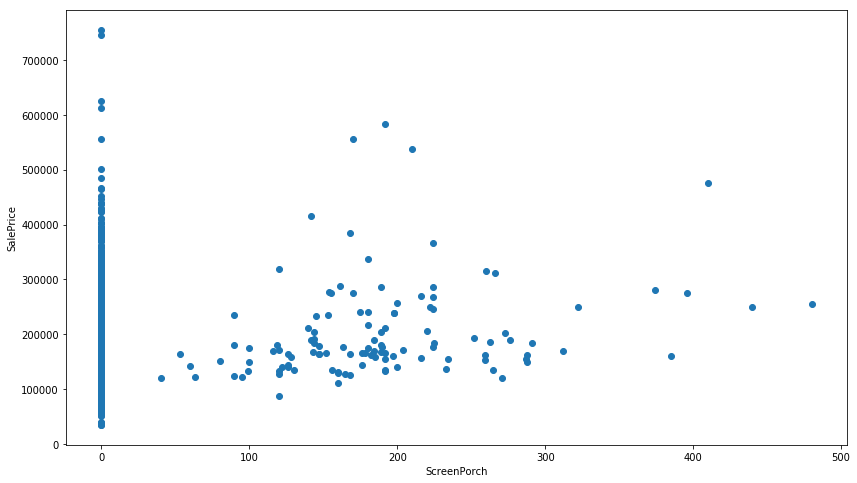

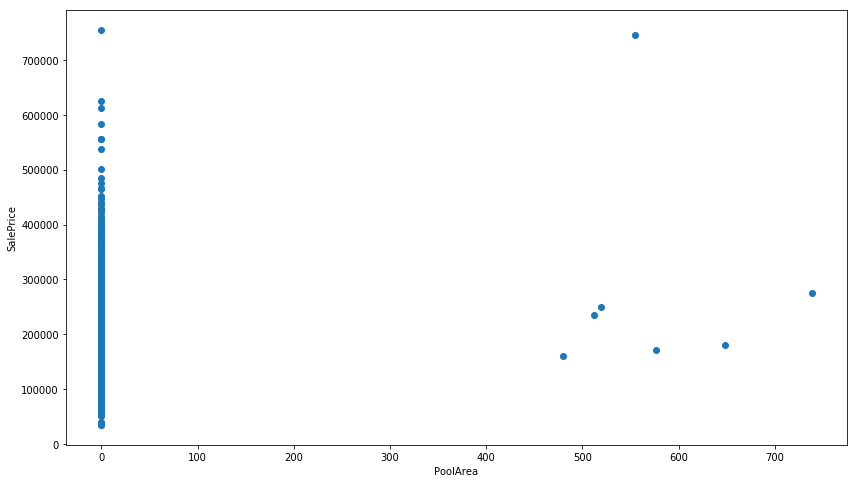

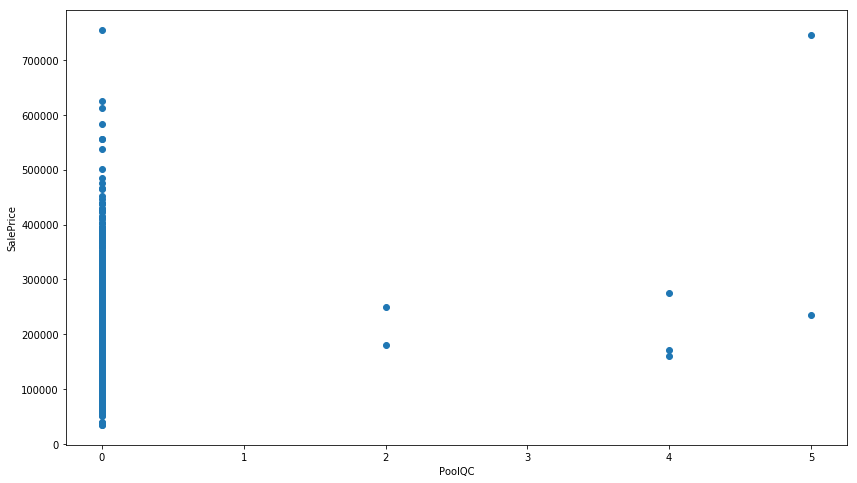

         SalePrice               
             count           mean
Fence                            
GdPrv           59  178927.457627
GdWo            54  140379.314815
MnPrv          157  148751.089172
MnWw            11  134286.363636
No_fence      1179  187596.837998


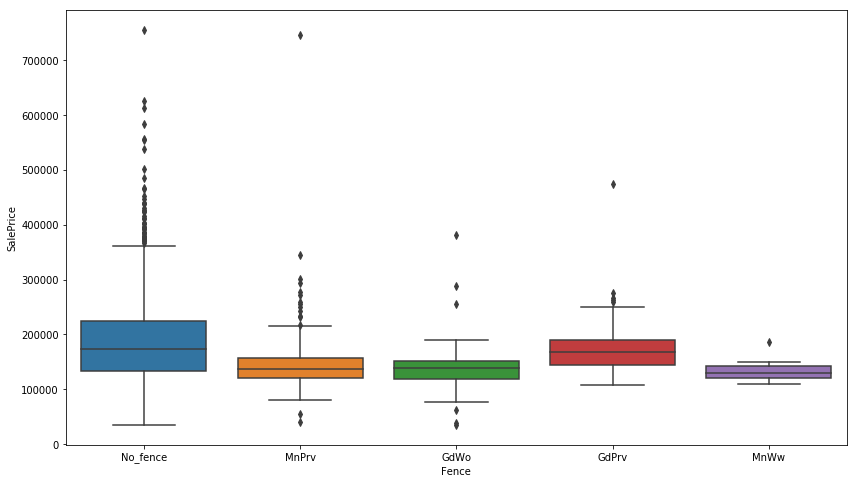

               SalePrice               
                   count           mean
MiscFeature                            
Gar2                   2  170750.000000
No_miscFeature      1406  182046.410384
Othr                   2   94000.000000
Shed                  49  151187.612245
TenC                   1  250000.000000


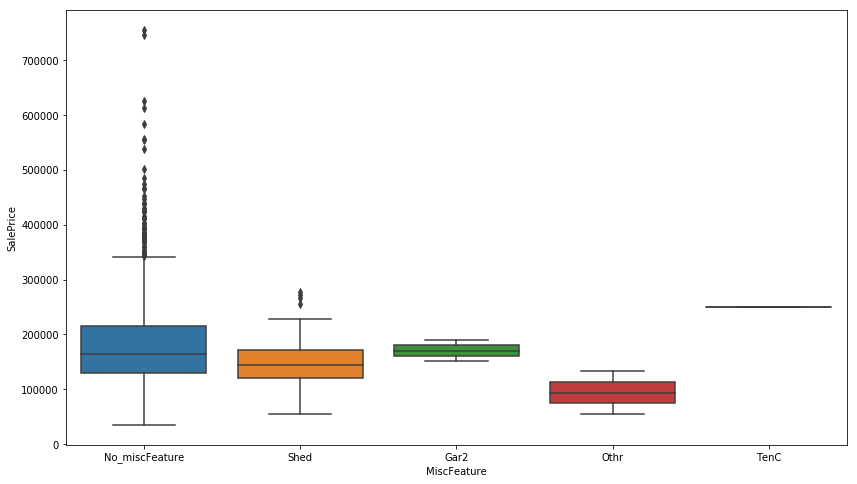

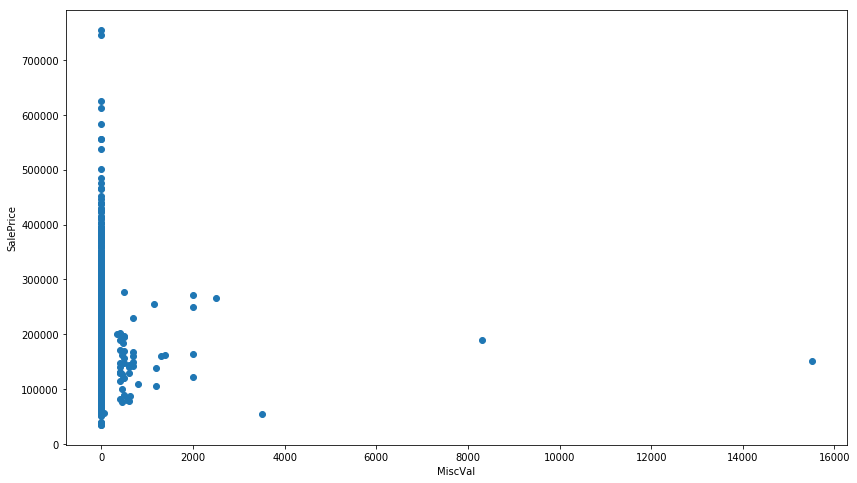

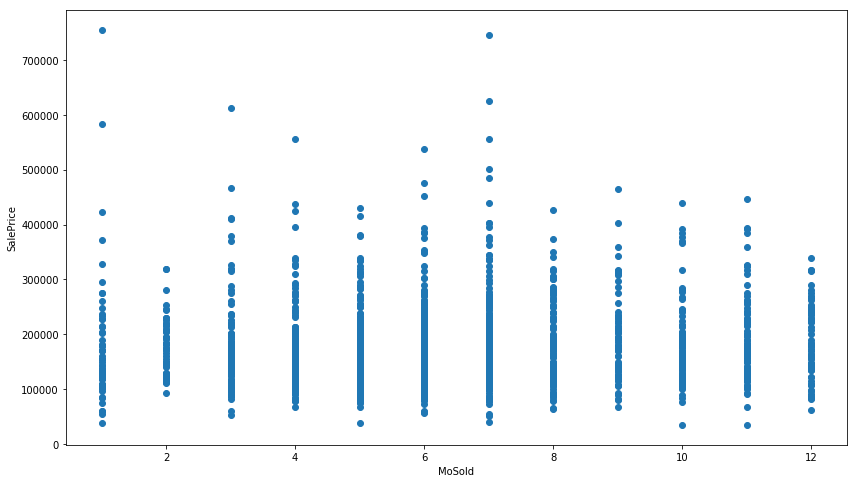

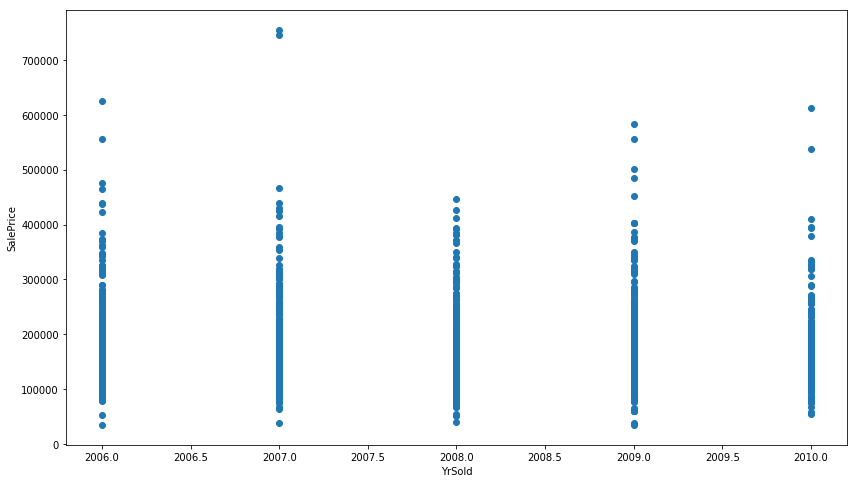

         SalePrice               
             count           mean
SaleType                         
COD             43  143973.255814
CWD              4  210600.000000
Con              2  269600.000000
ConLD            9  138780.888889
ConLI            5  200390.000000
ConLw            5  143700.000000
New            122  274945.418033
Oth              3  119850.000000
WD            1267  173401.836622


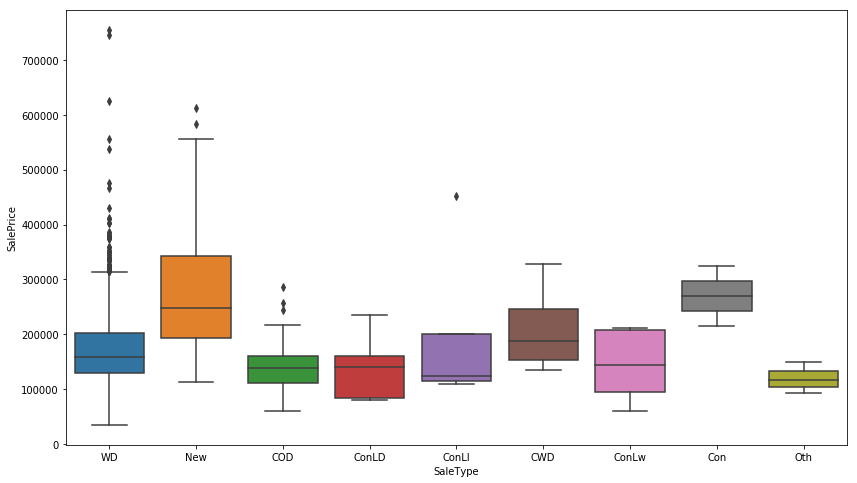

              SalePrice               
                  count           mean
SaleCondition                         
Abnorml             101  146526.623762
AdjLand               4  104125.000000
Alloca               12  167377.416667
Family               20  149600.000000
Normal             1198  175202.219533
Partial             125  272291.752000


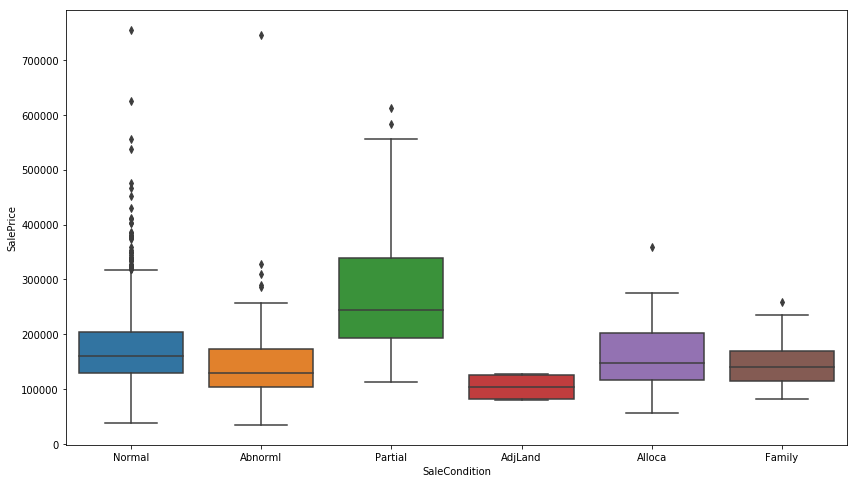

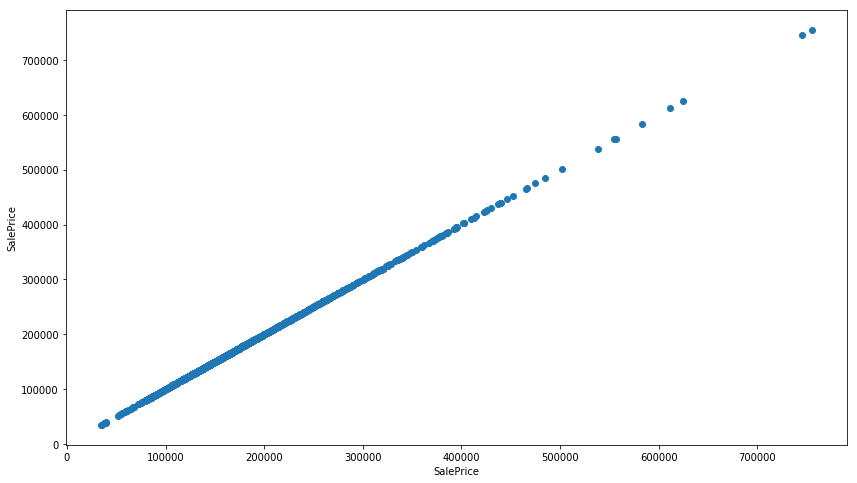

In [480]:
target='SalePrice'
for col in list(housing.columns.values)[1:len(housing.columns)]:
    try:
        if np.issubdtype(housing[col].dtype, np.number) == True:
            plt.figure(figsize=(14,8))
            matplotlib.pyplot.scatter(housing[col],housing.SalePrice)
        else:
            plt.figure(figsize=(14,8))
            sns.boxplot(x=col, y=target, data=housing)
            print(housing.groupby(col).agg({target:['count','mean']})) 
        plt.xlabel(col)
        plt.ylabel(target)
        plt.show()
    except:
        pass

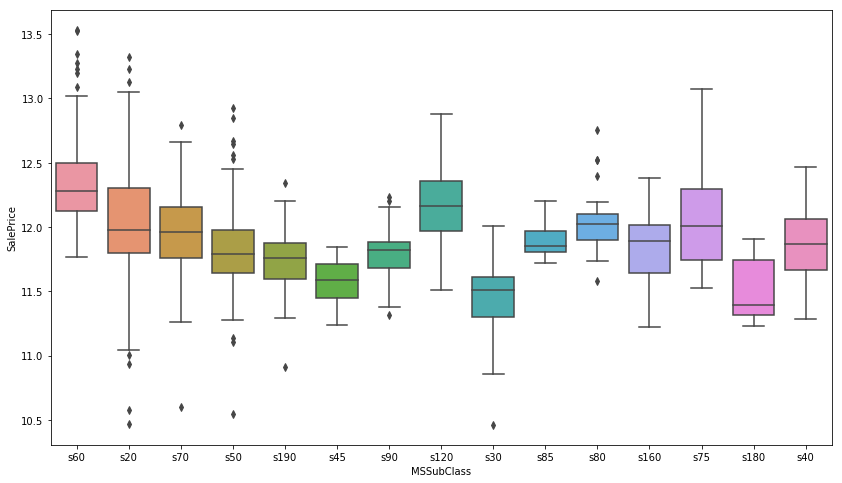

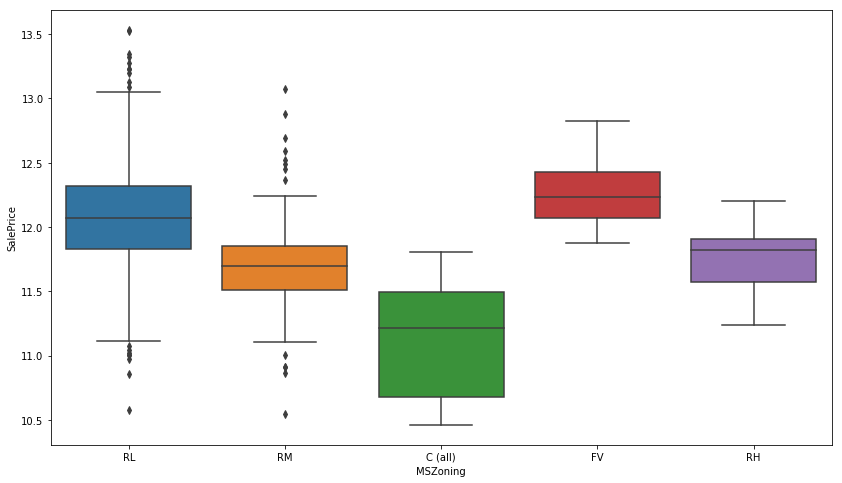

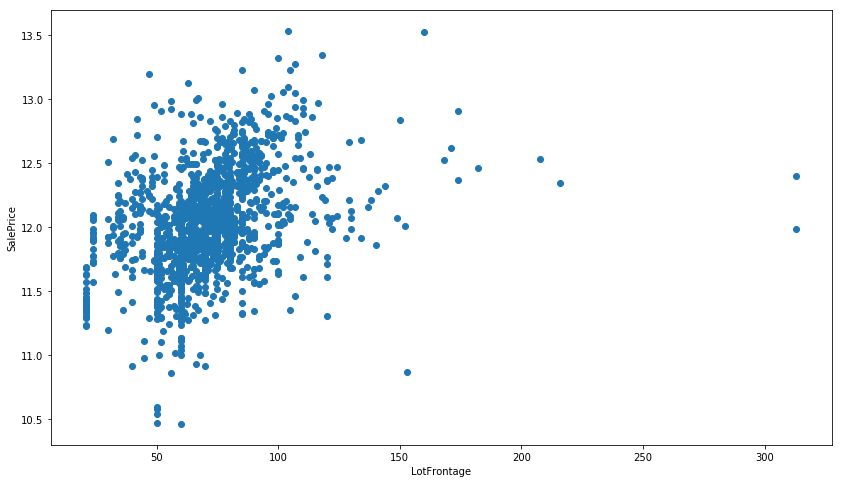

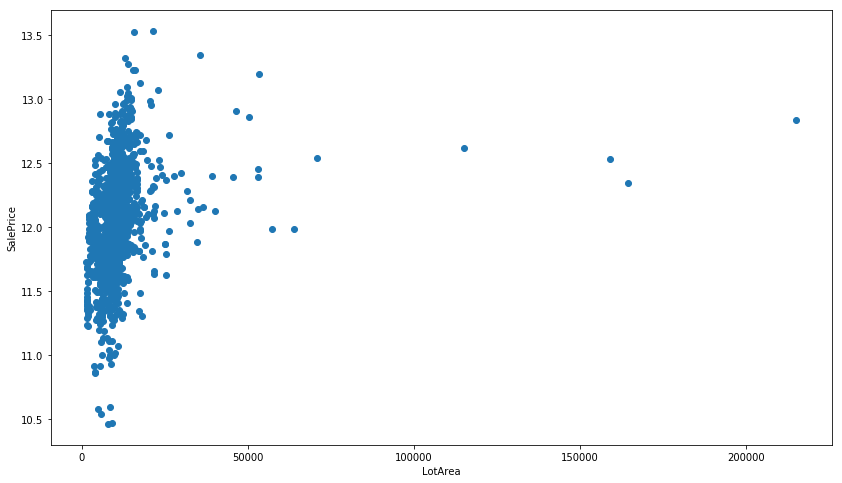

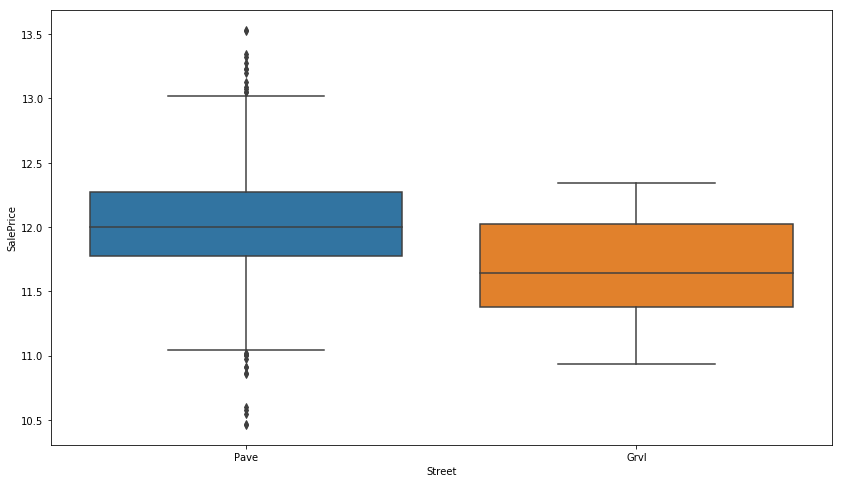

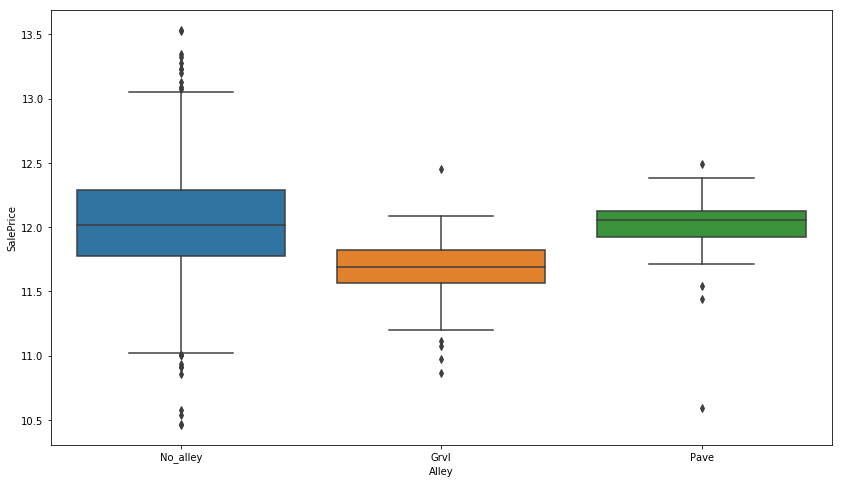

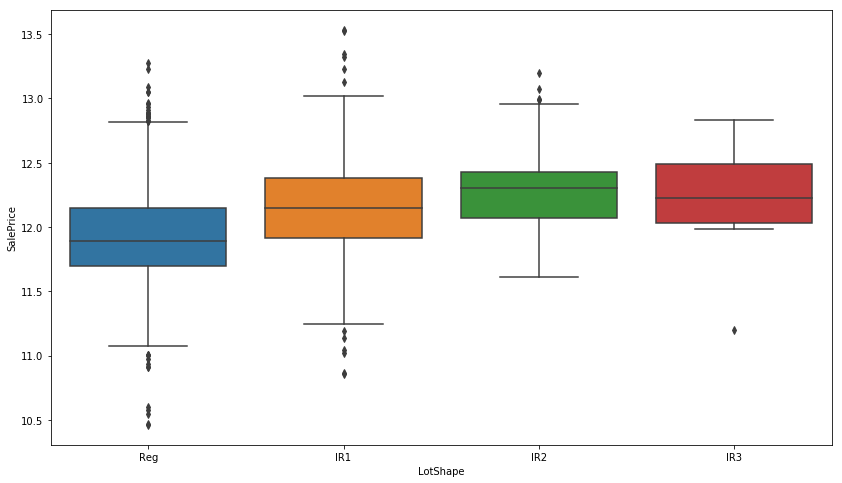

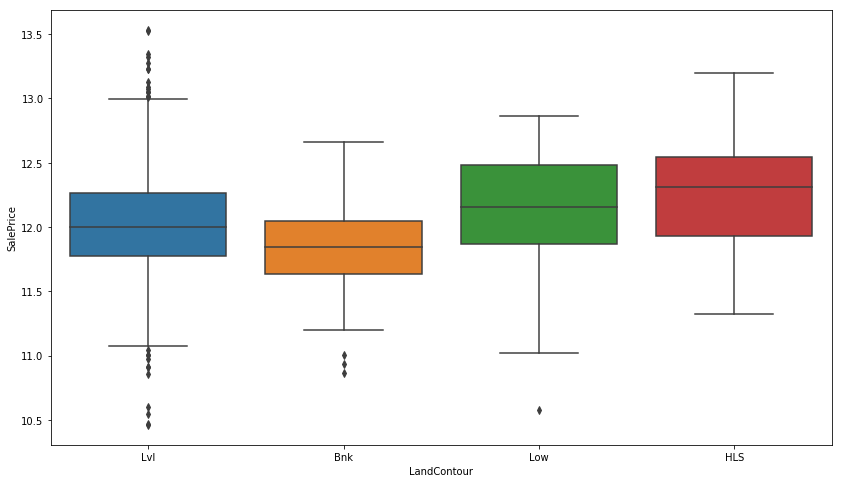

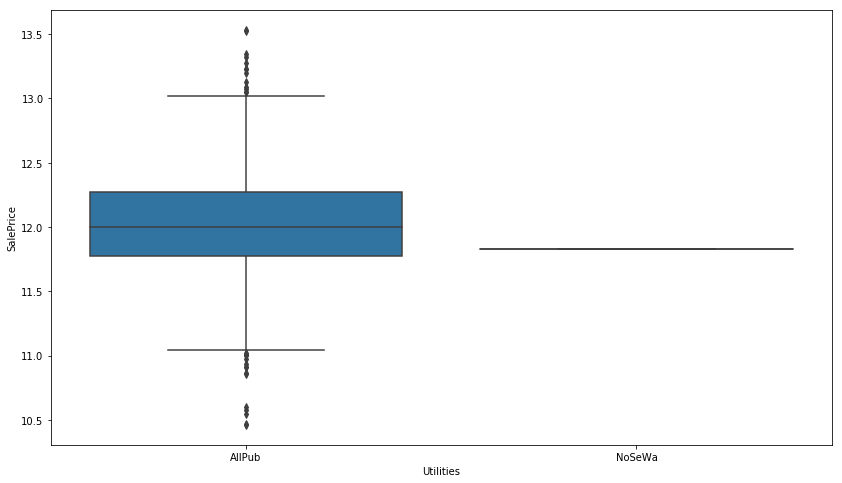

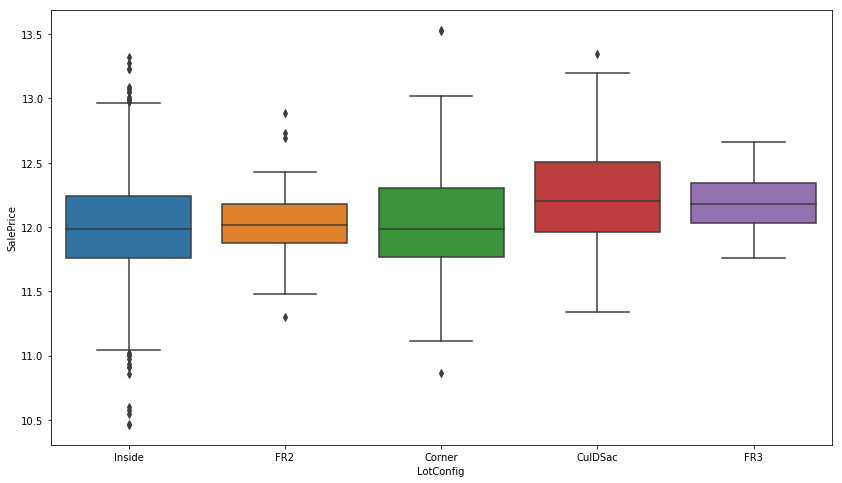

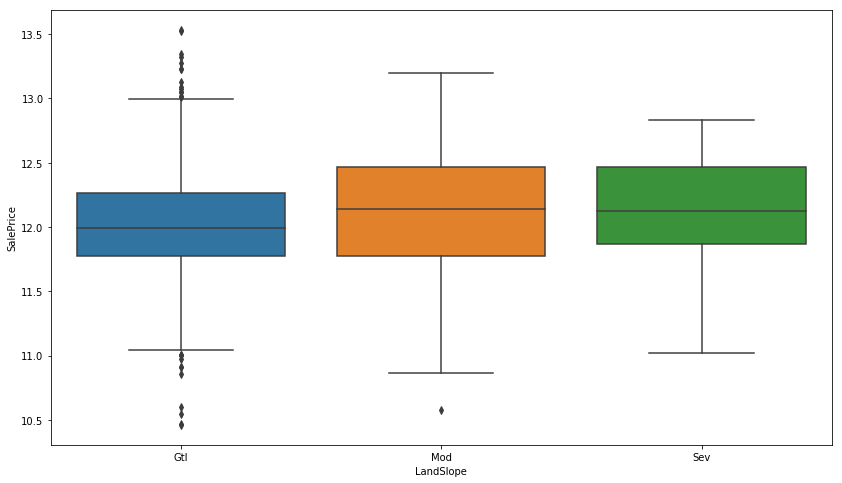

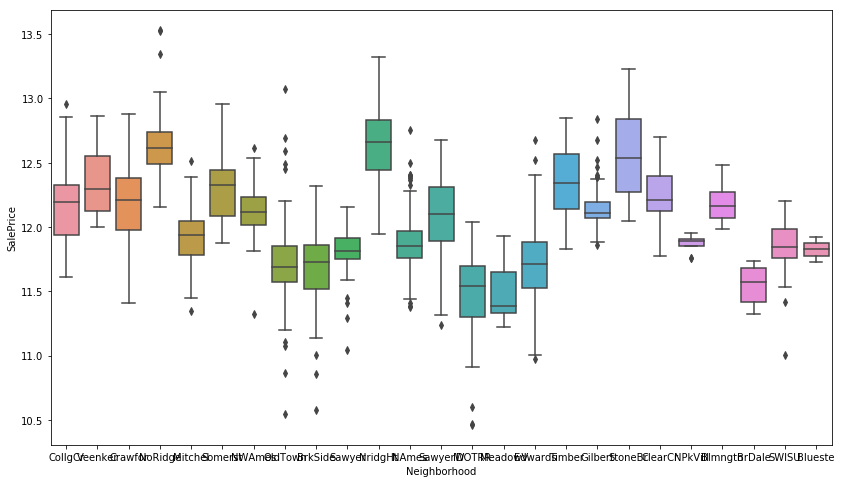

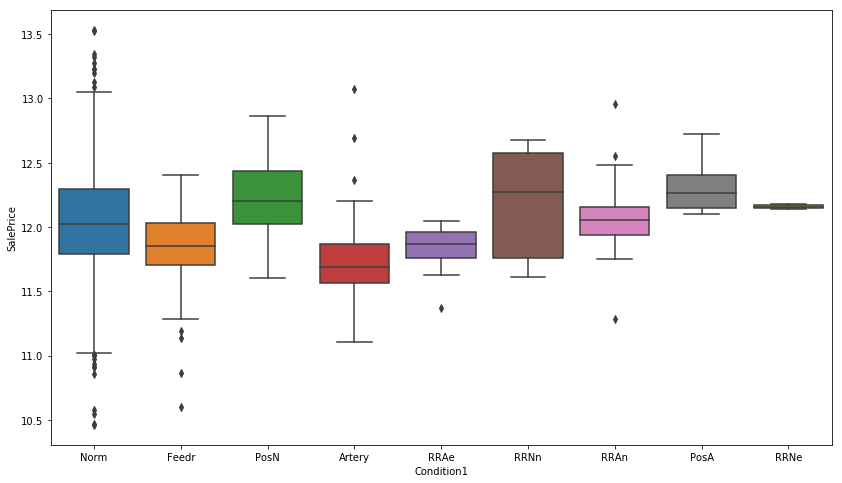

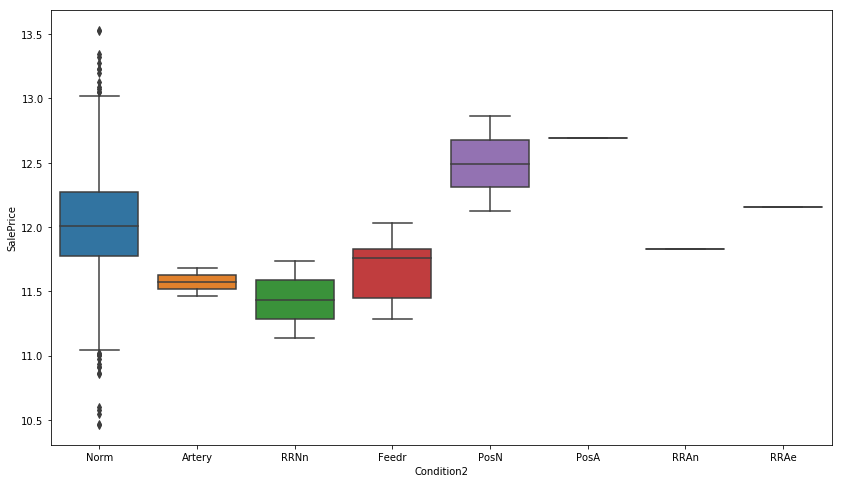

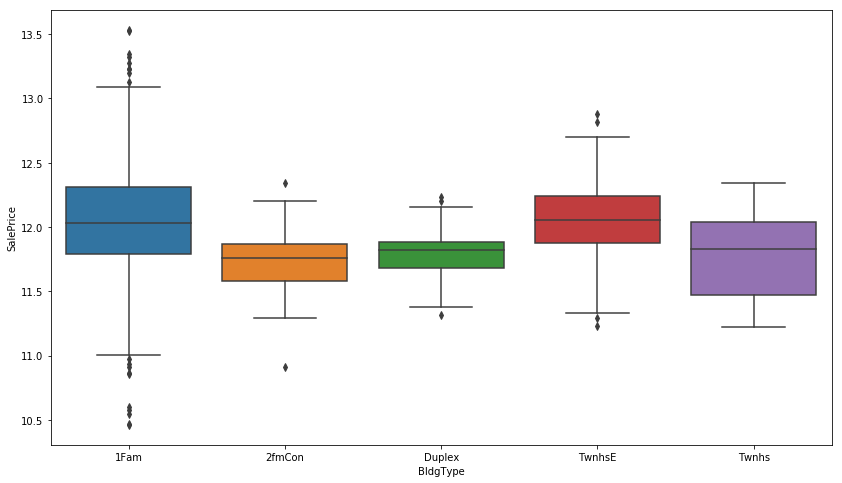

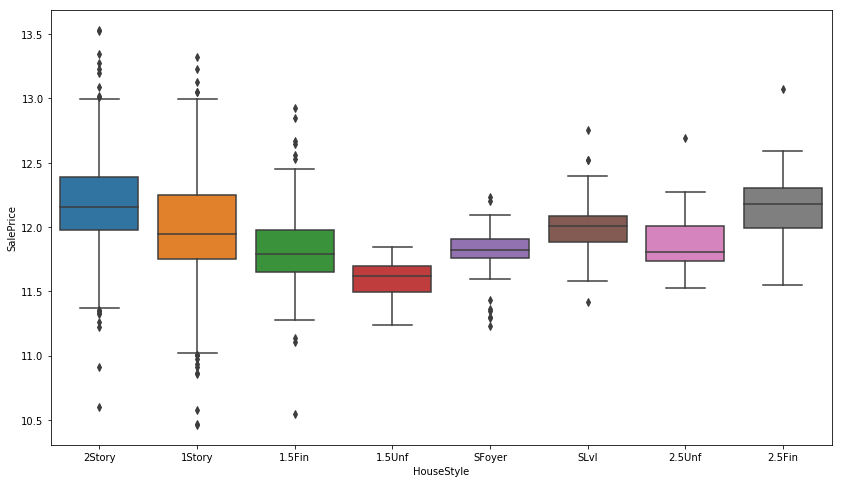

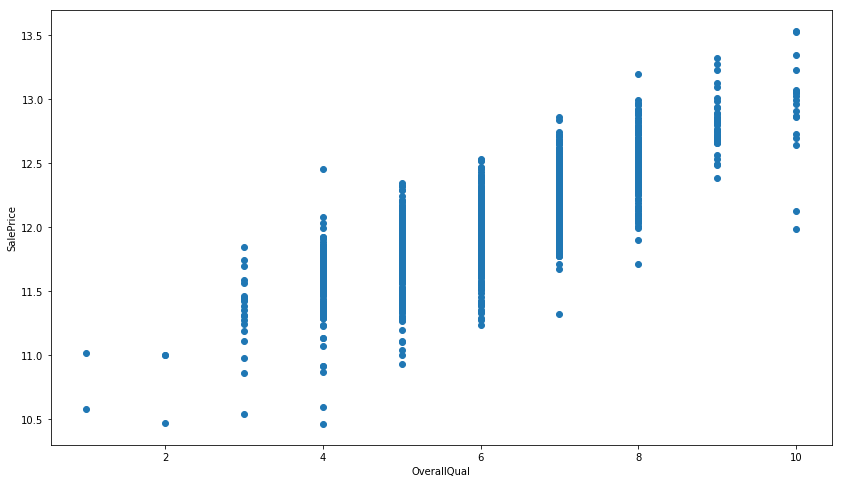

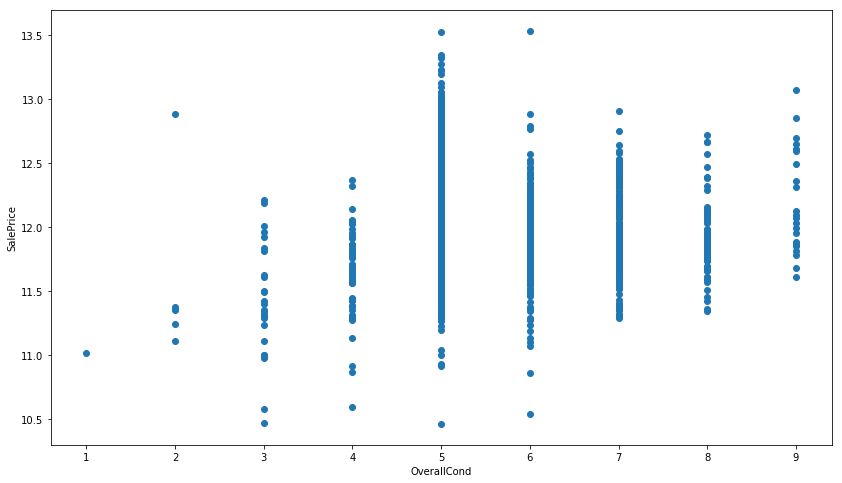

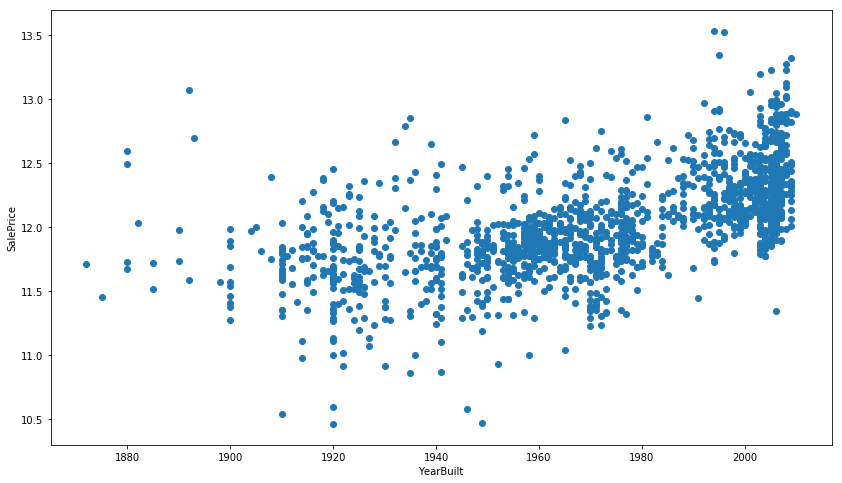

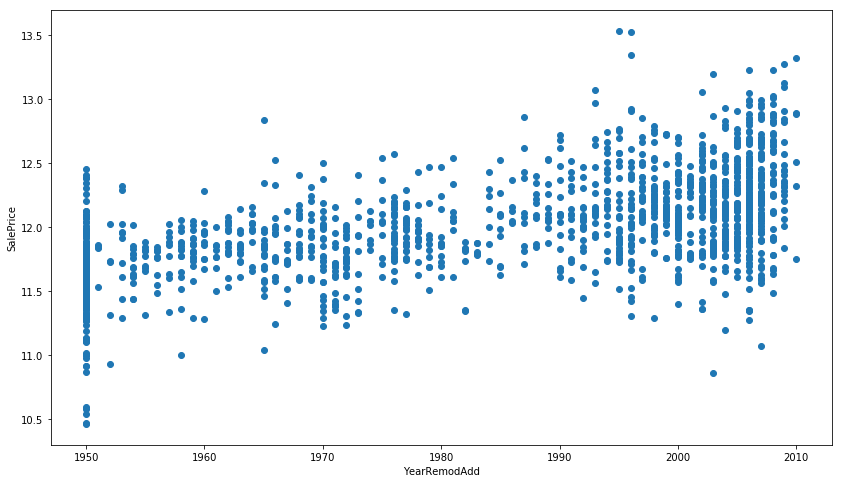

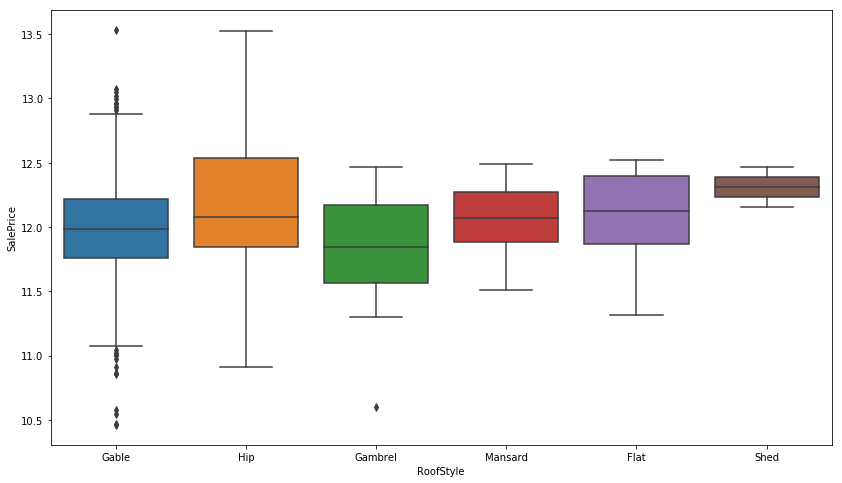

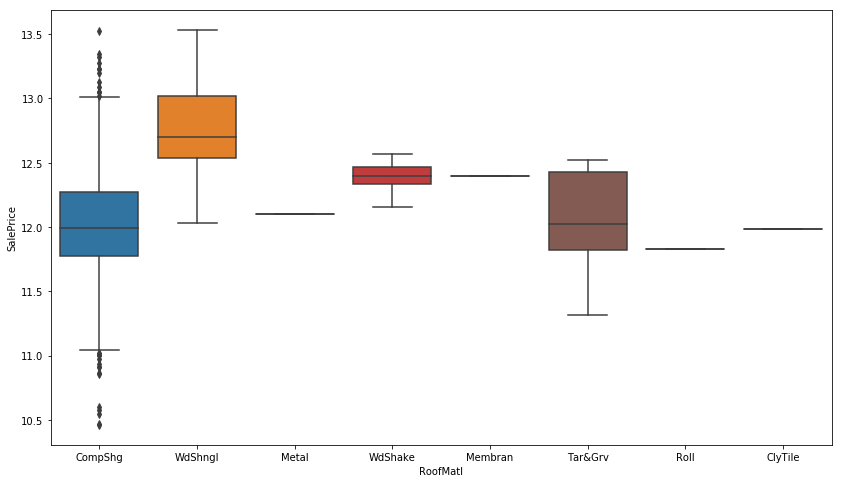

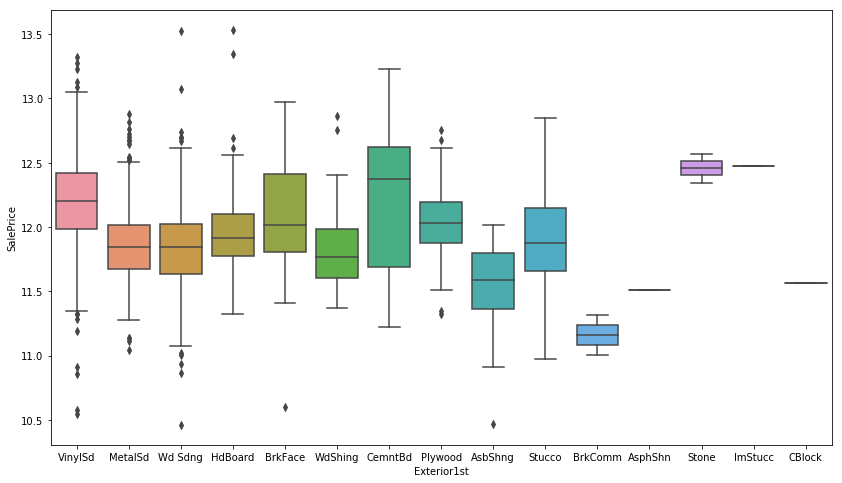

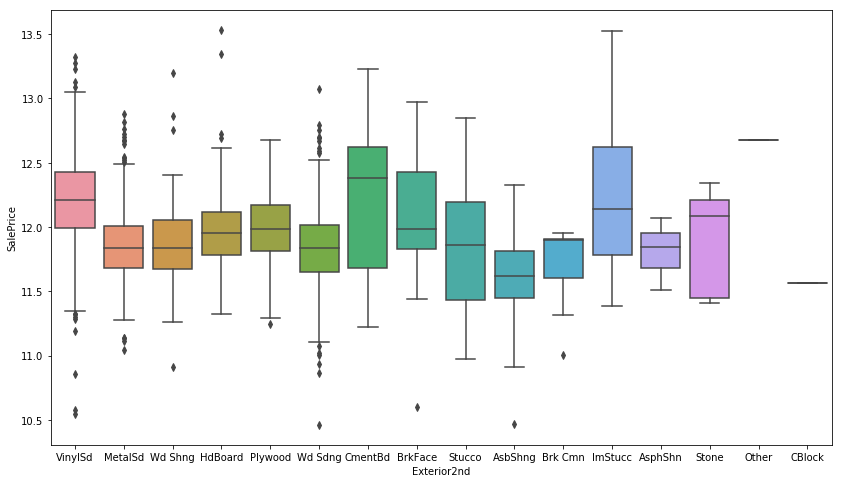

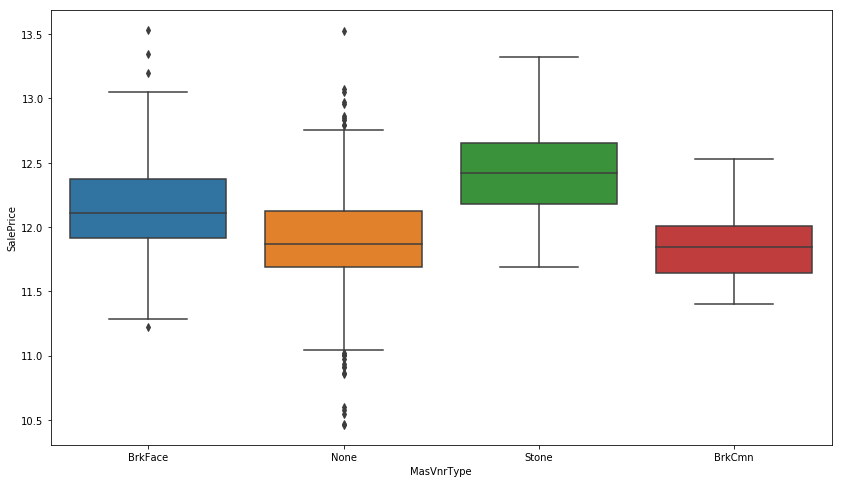

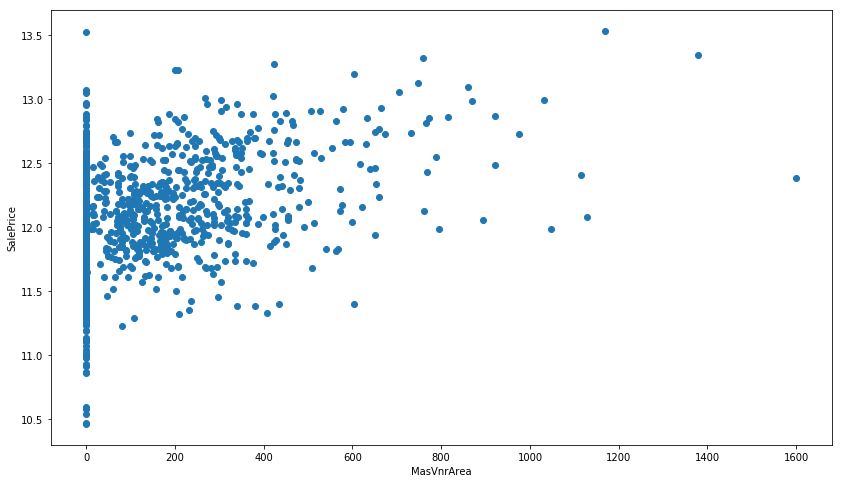

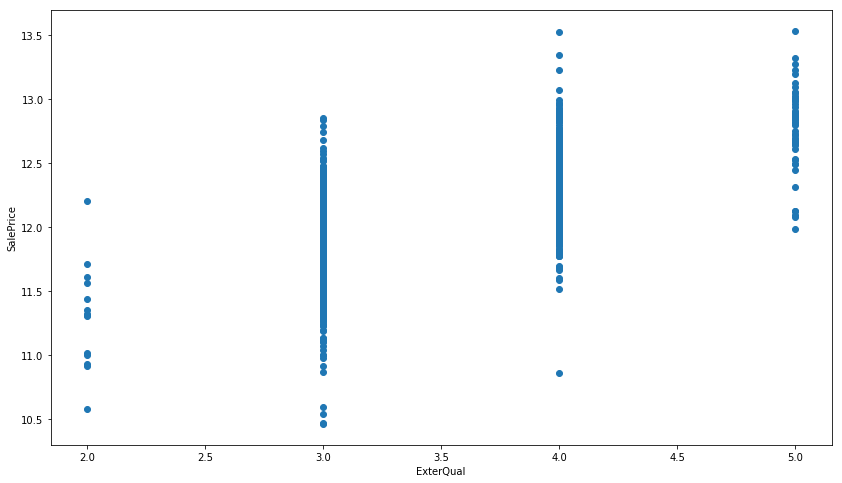

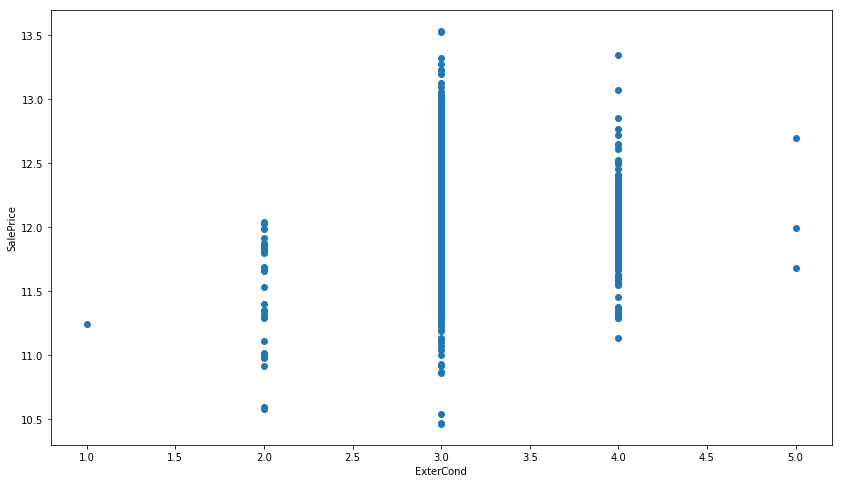

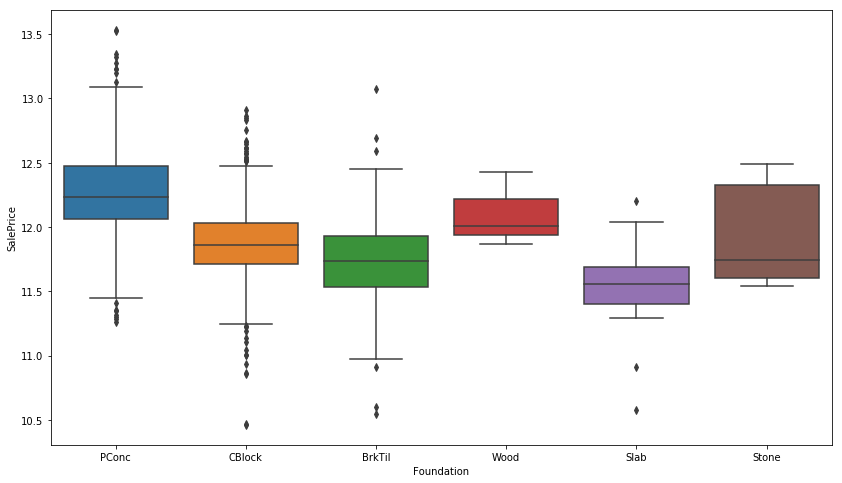

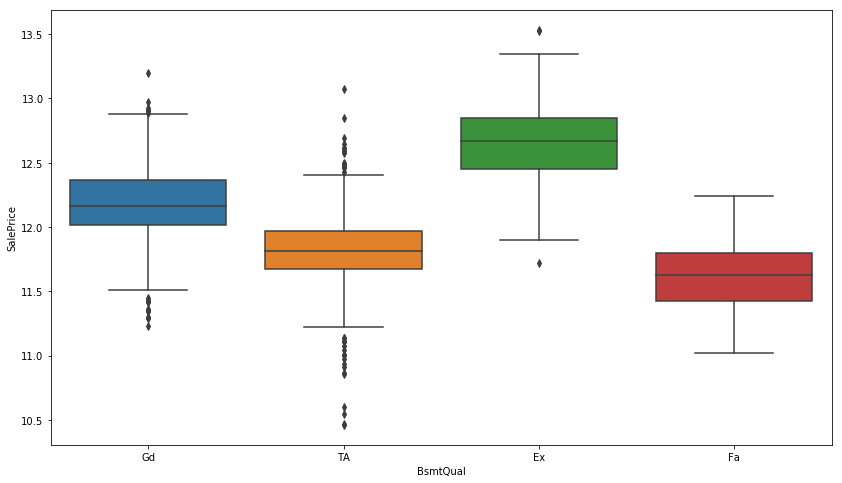

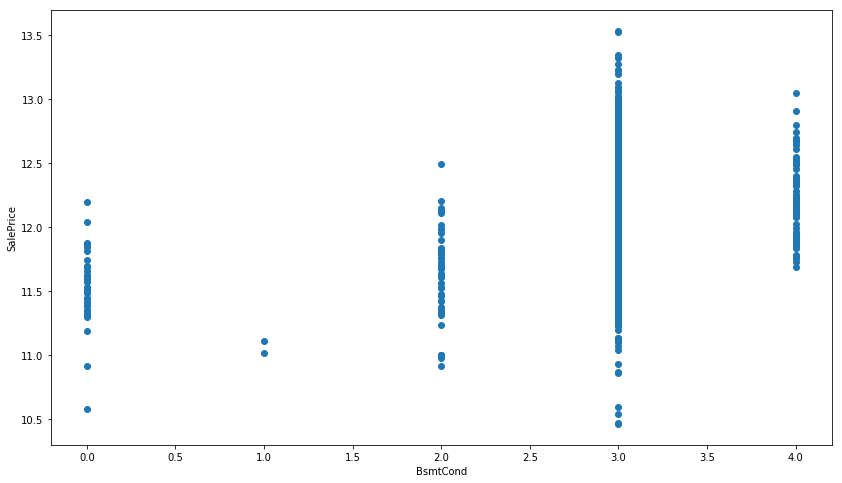

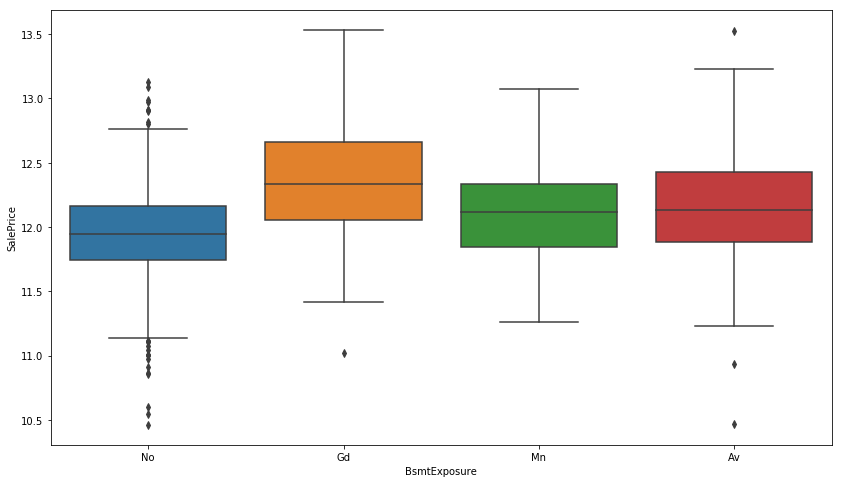

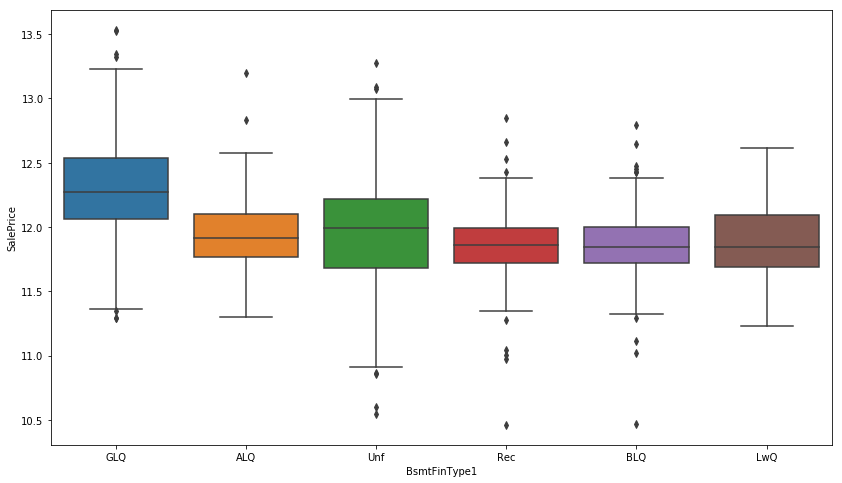

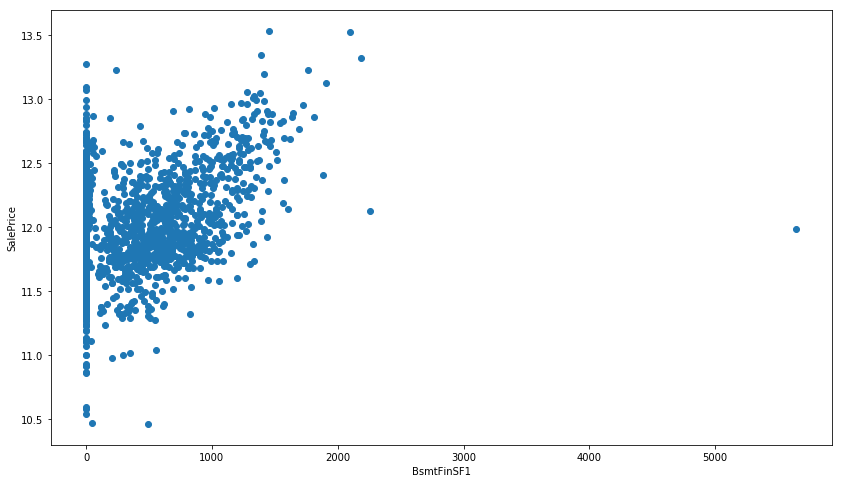

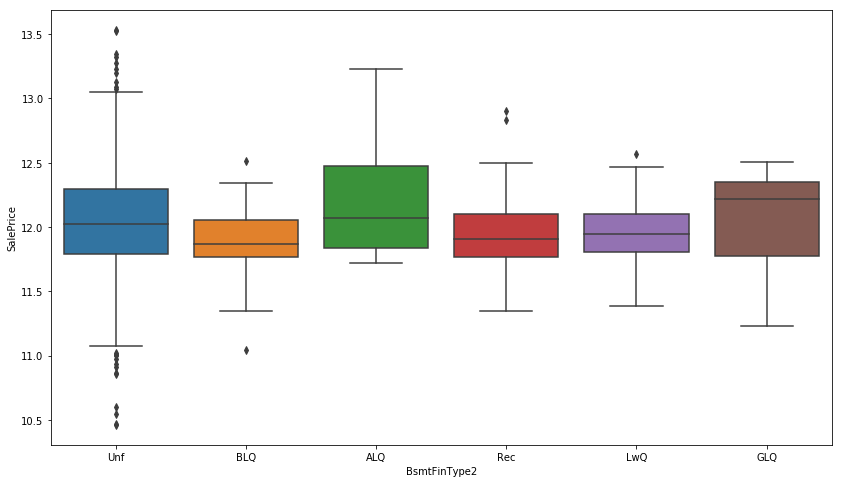

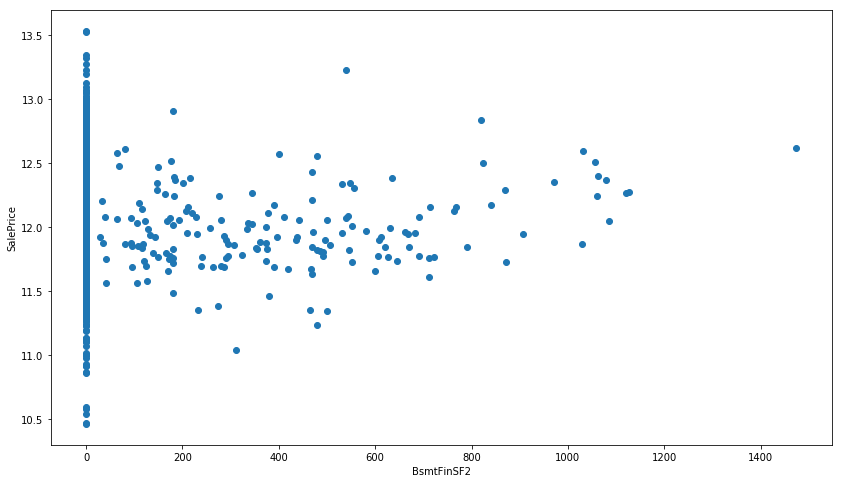

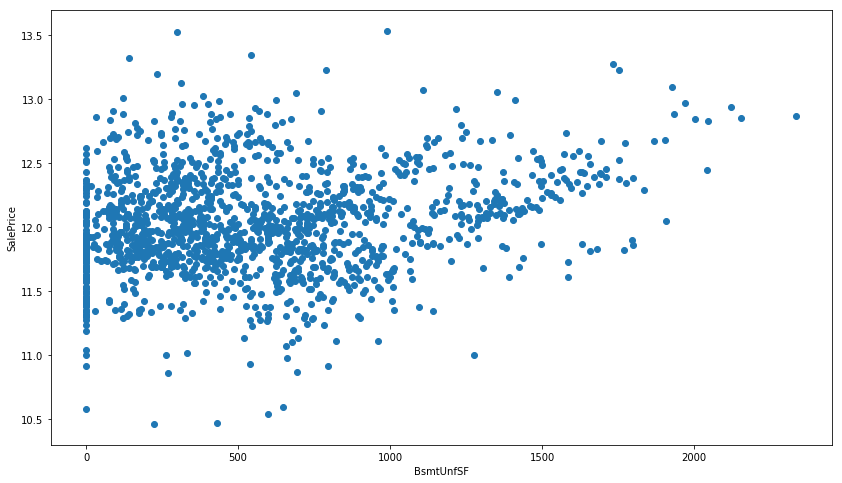

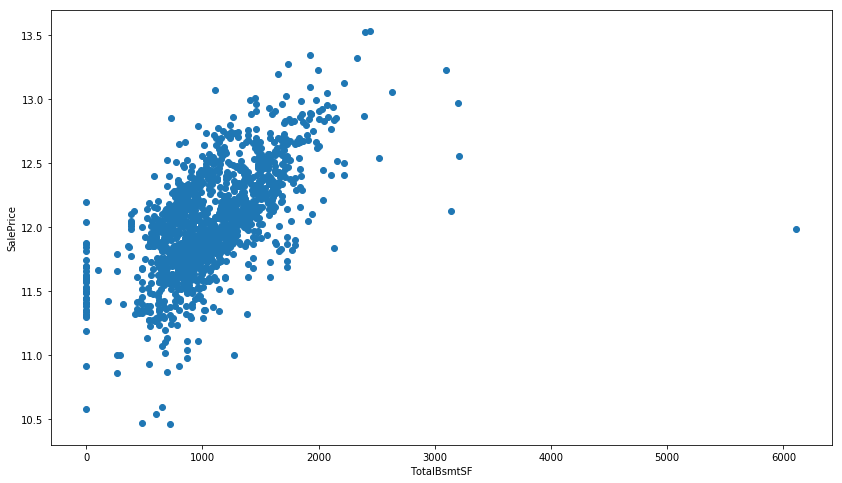

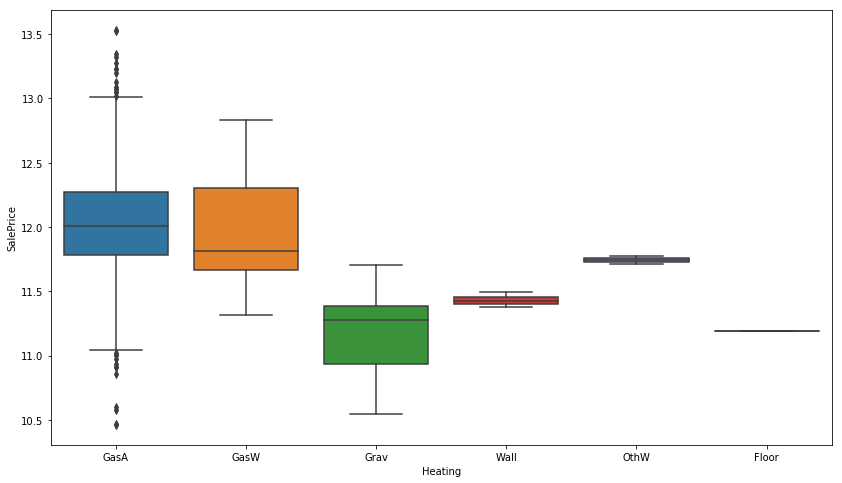

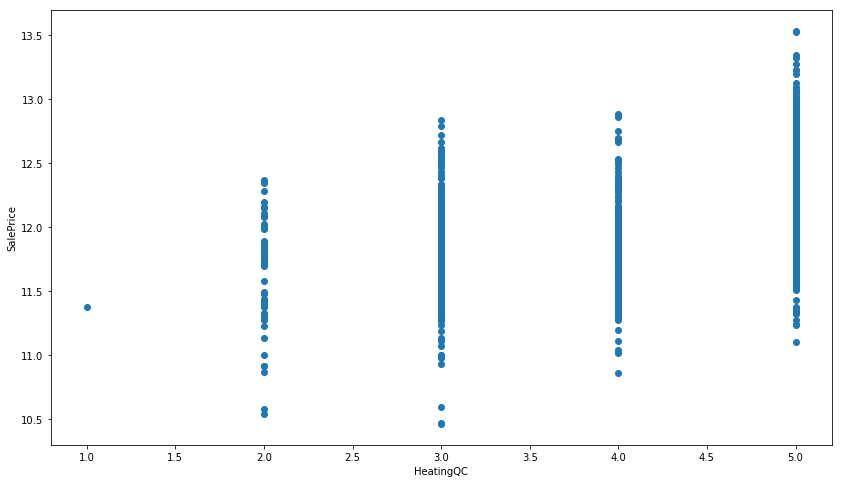

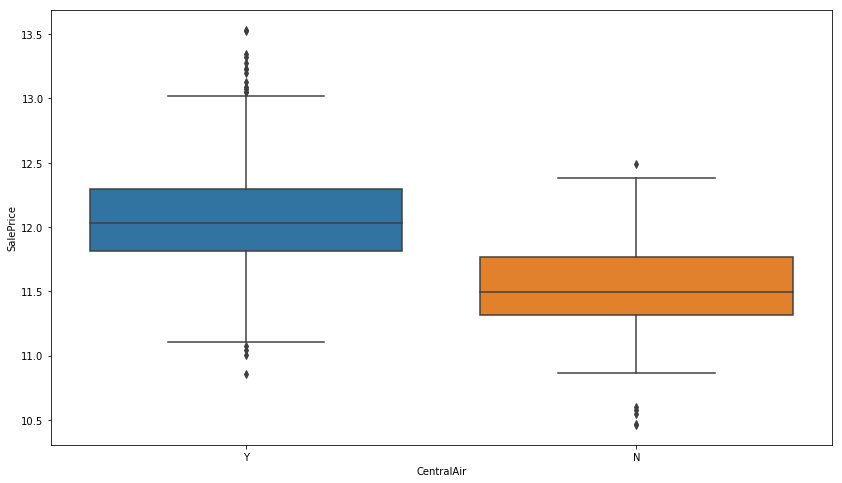

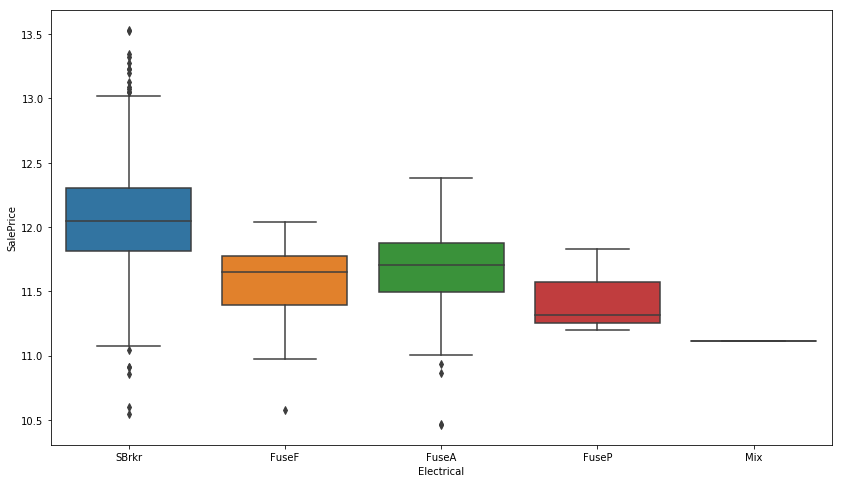

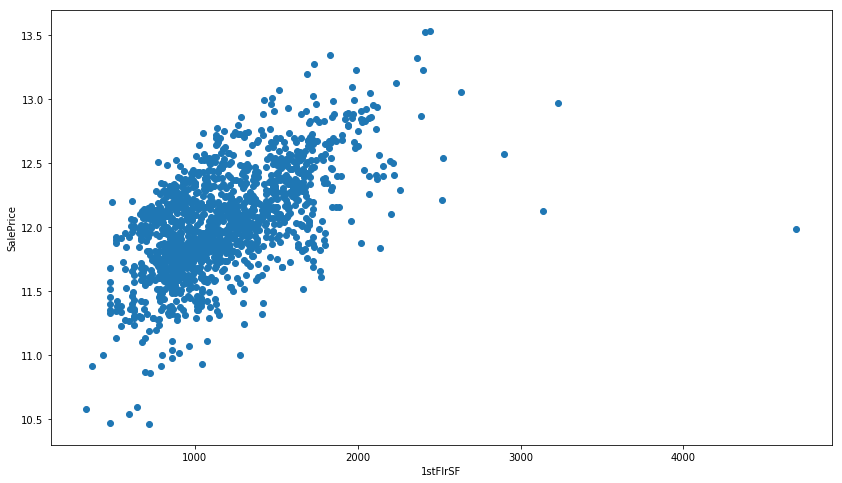

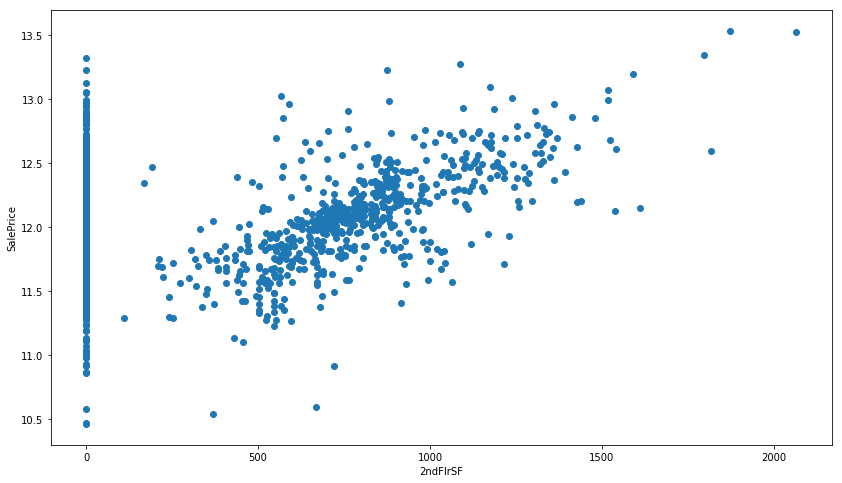

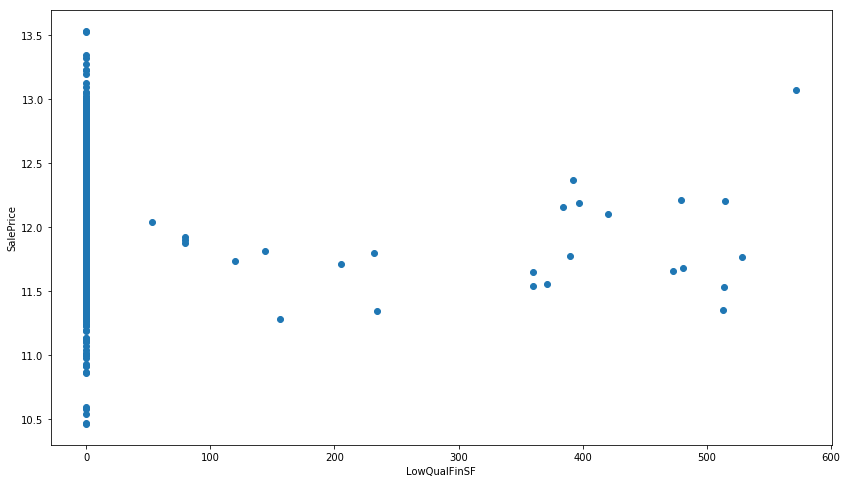

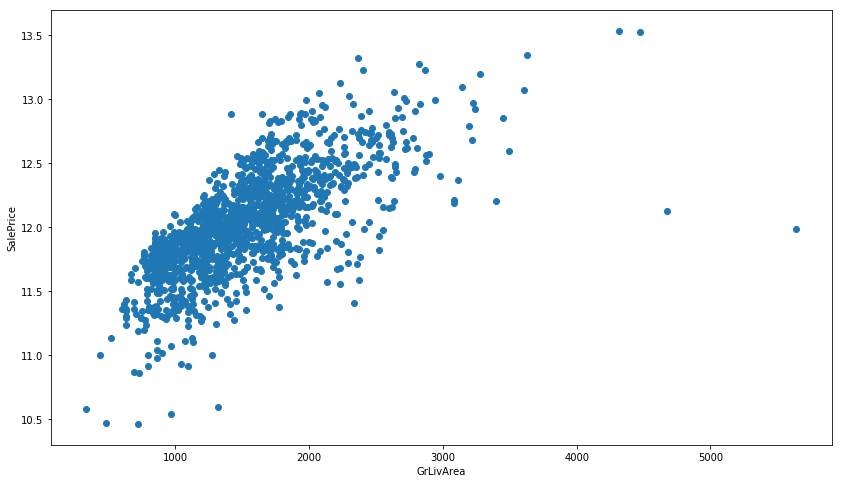

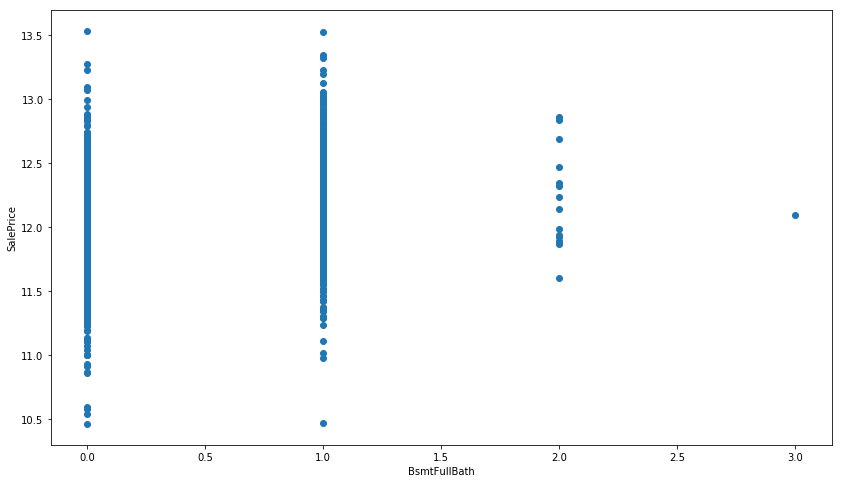

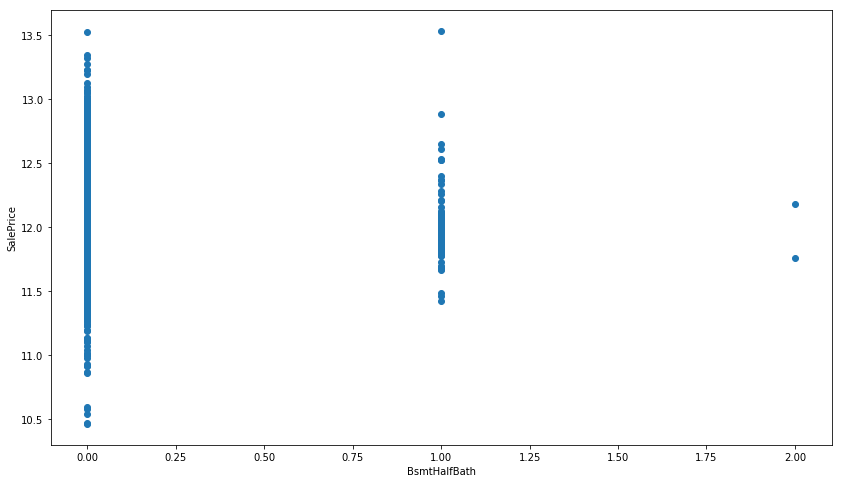

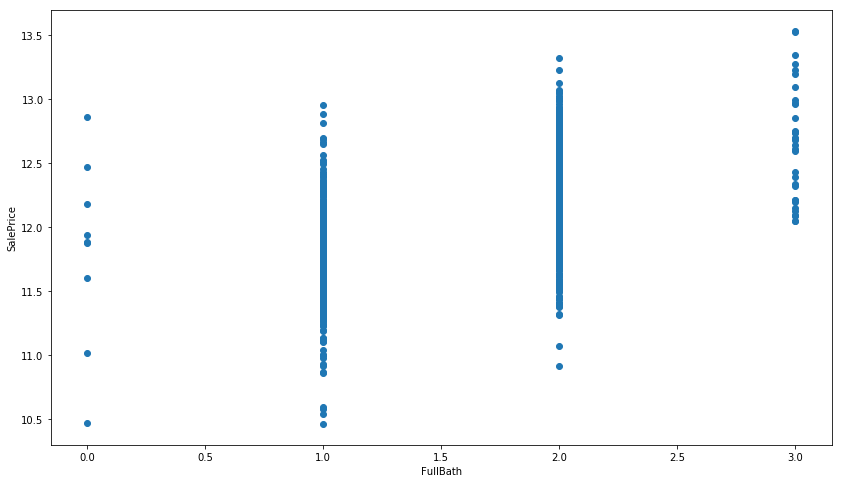

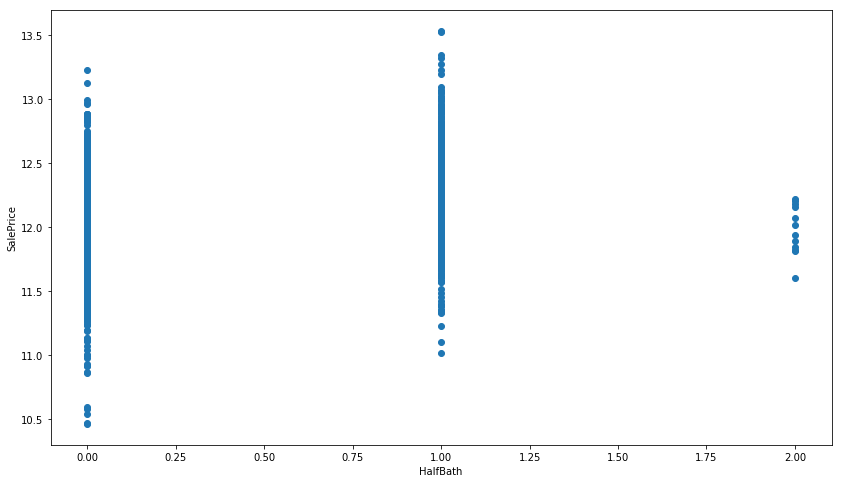

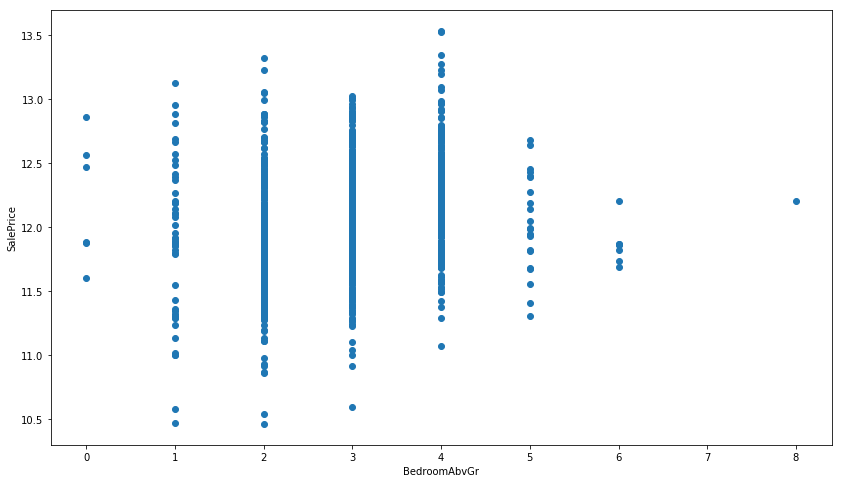

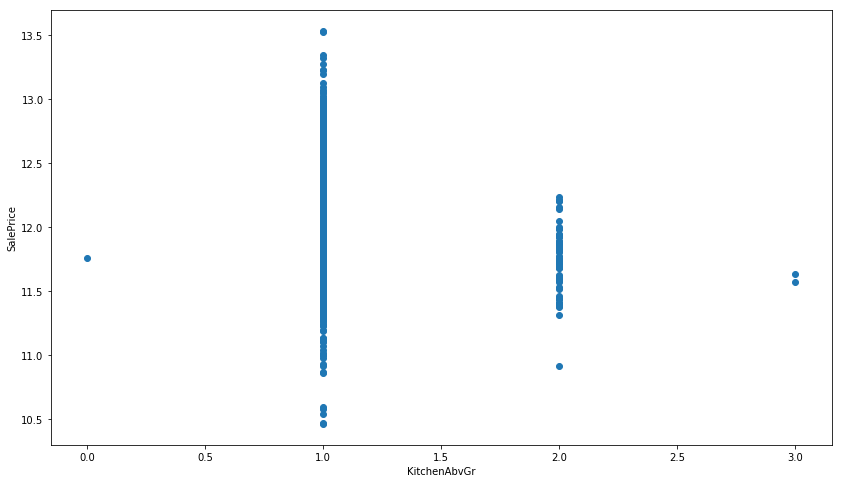

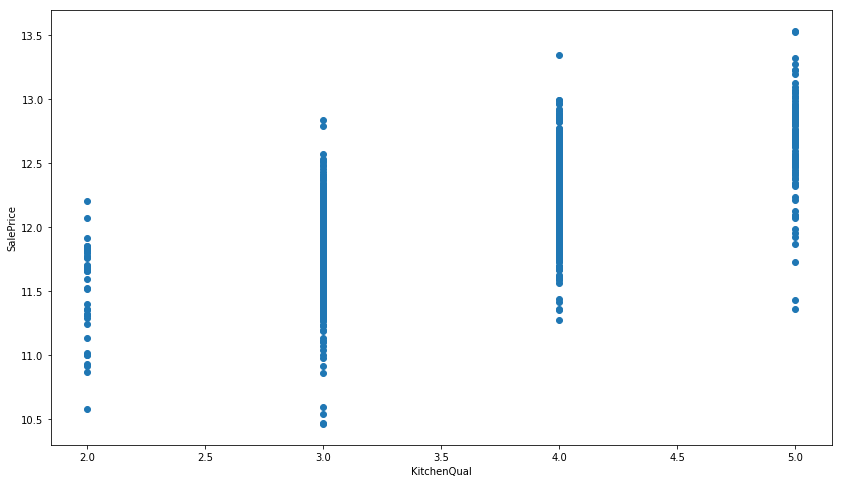

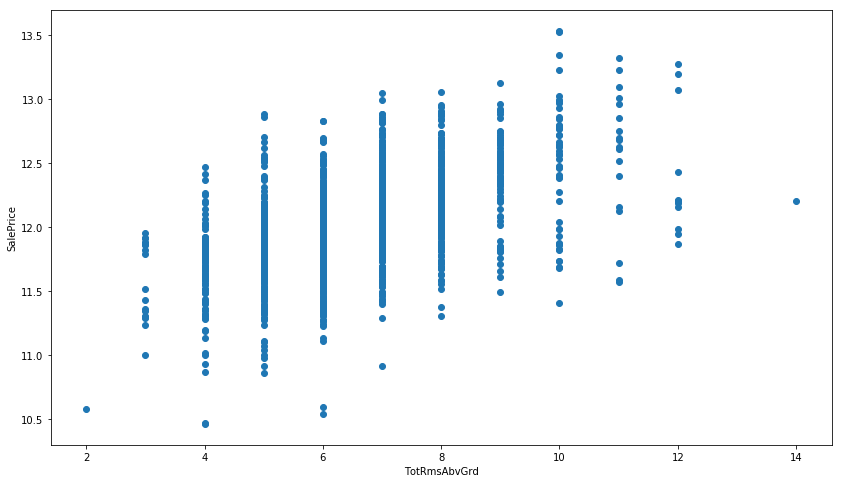

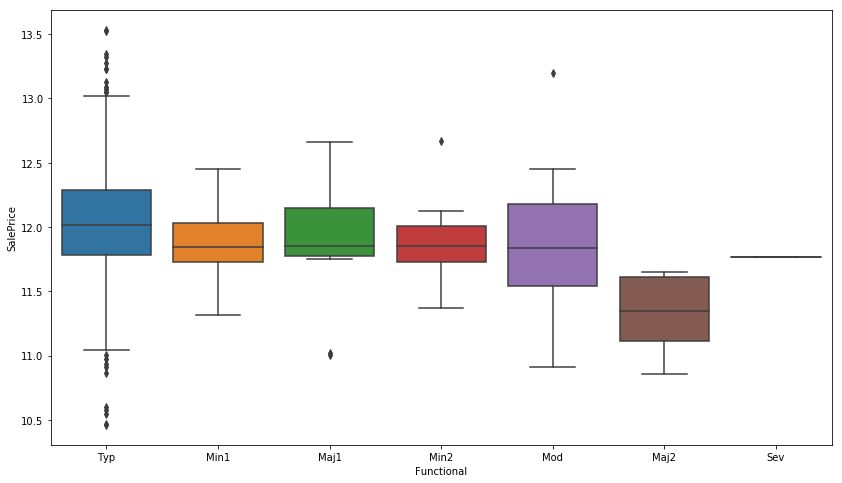

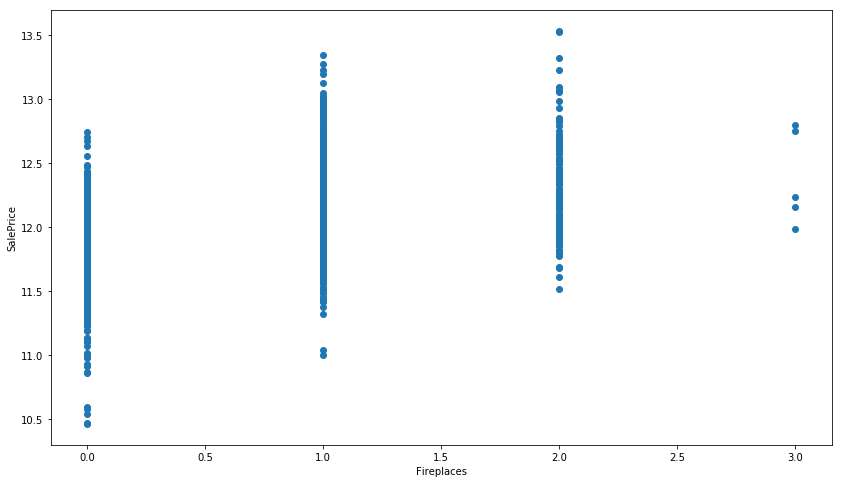

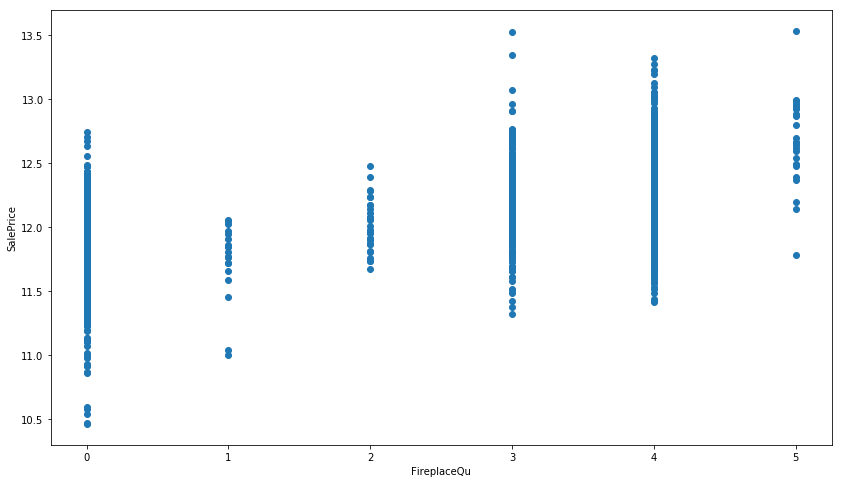

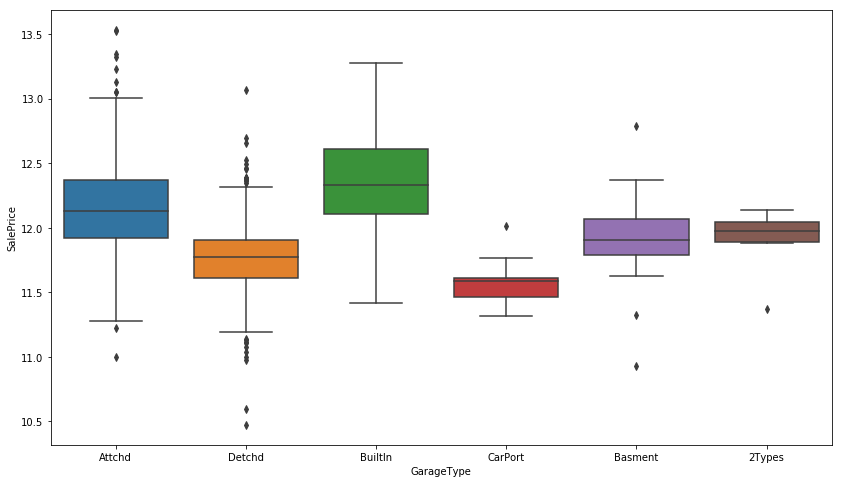

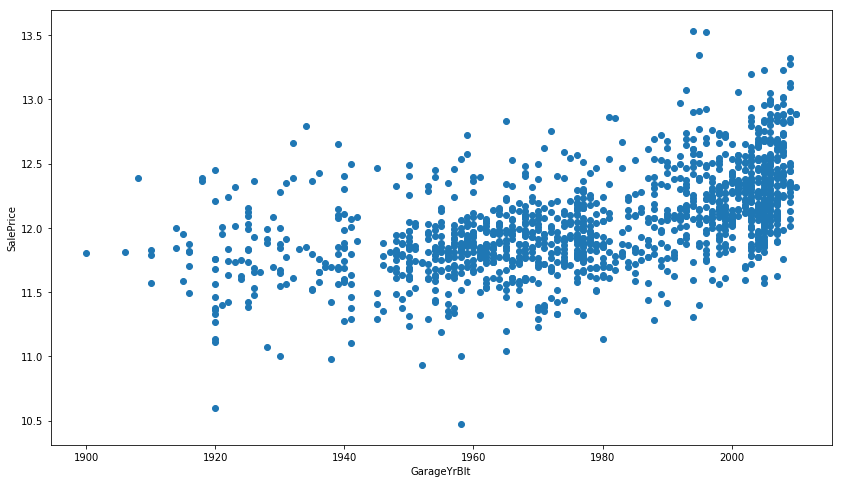

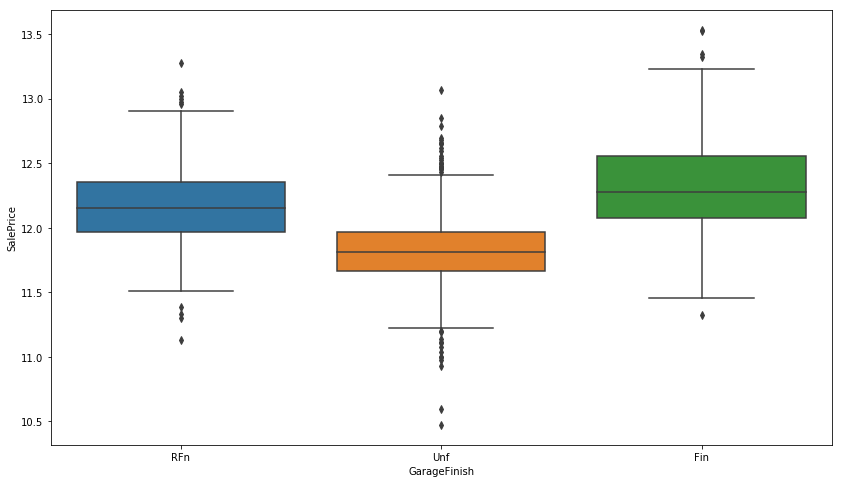

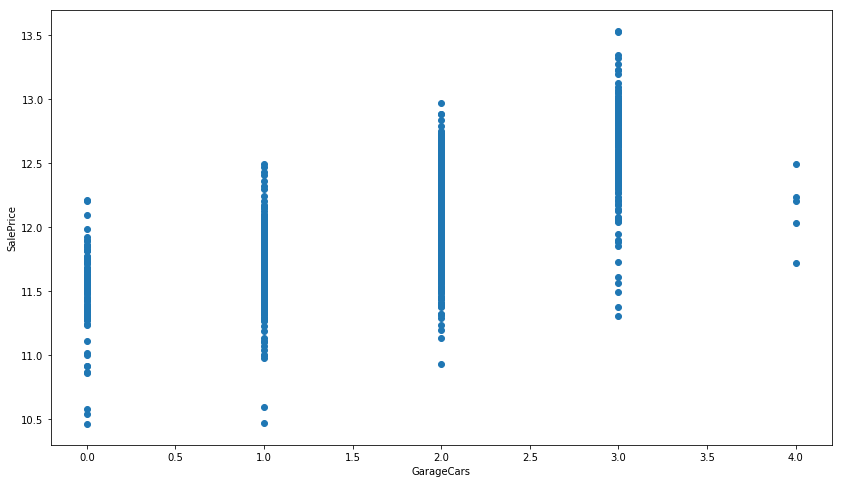

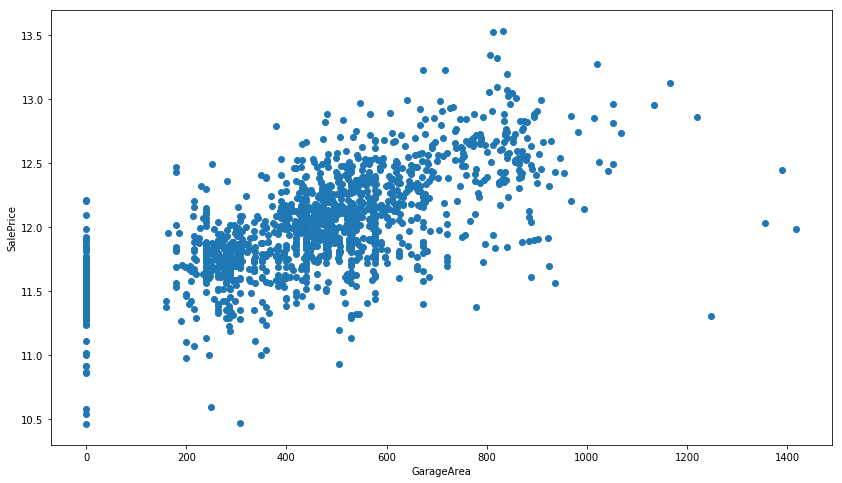

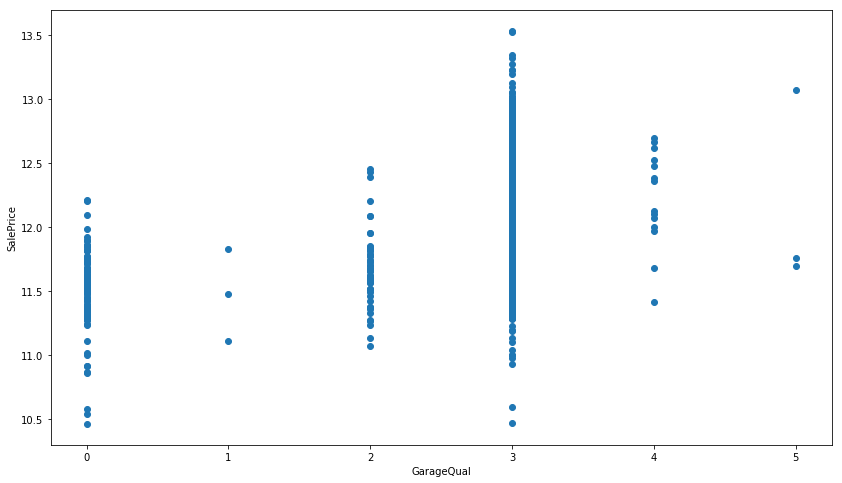

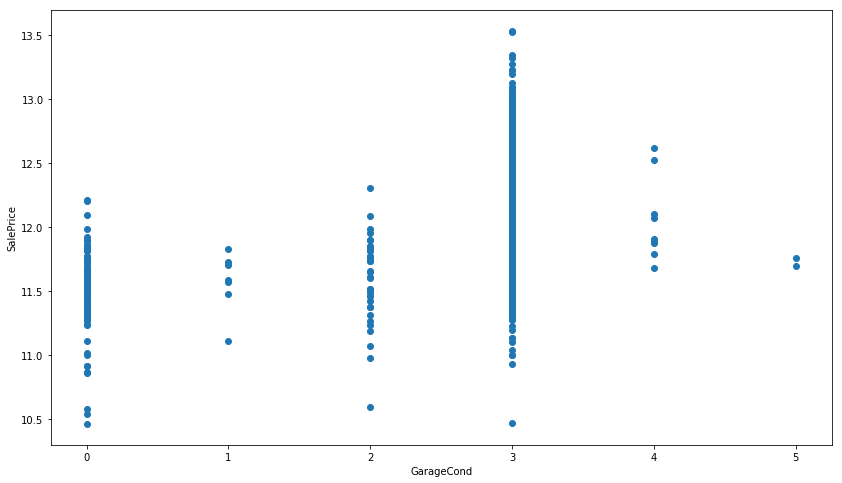

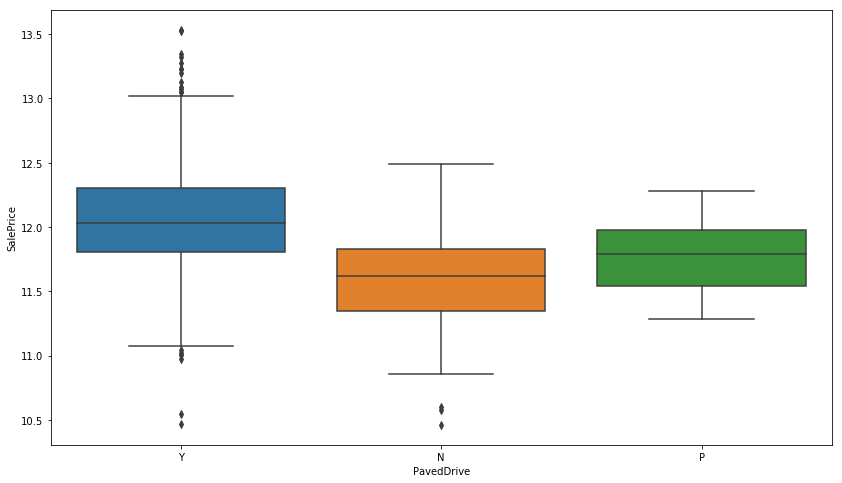

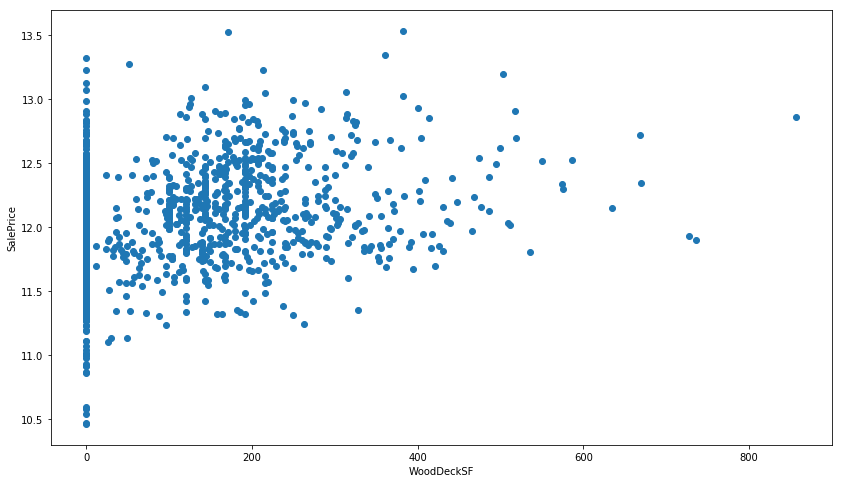

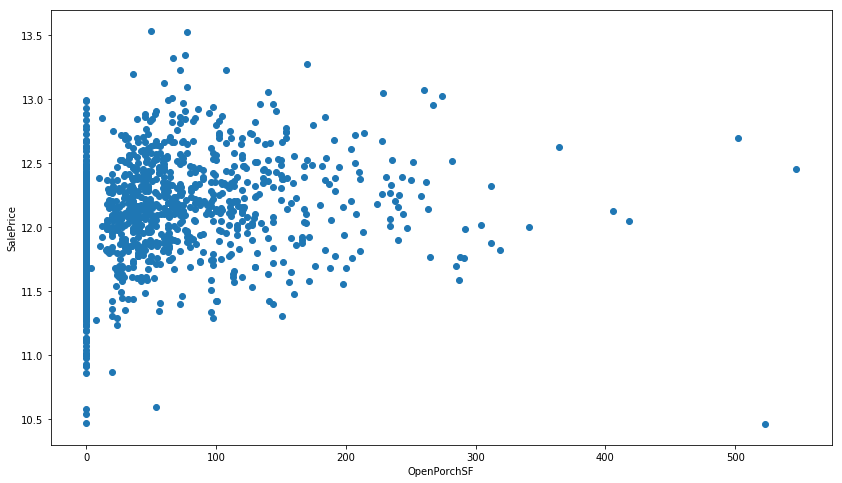

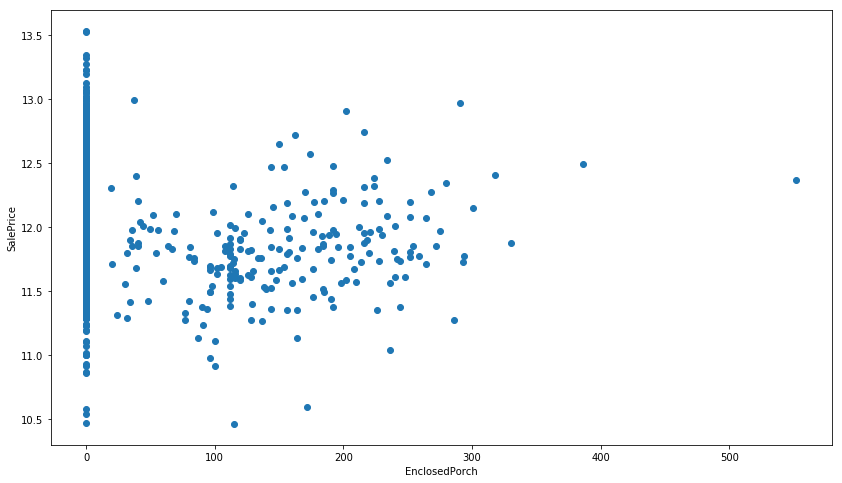

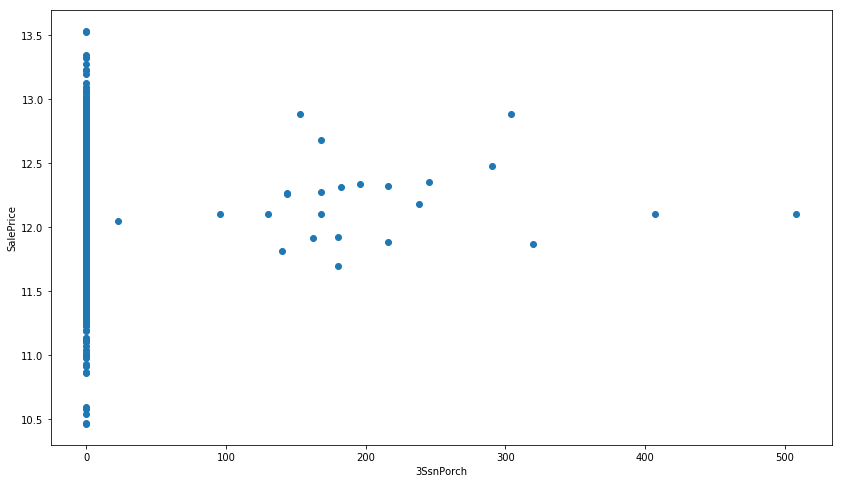

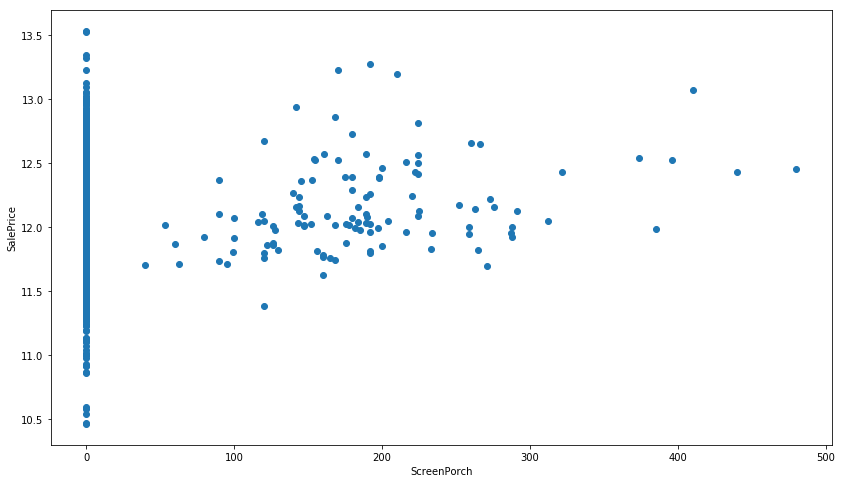

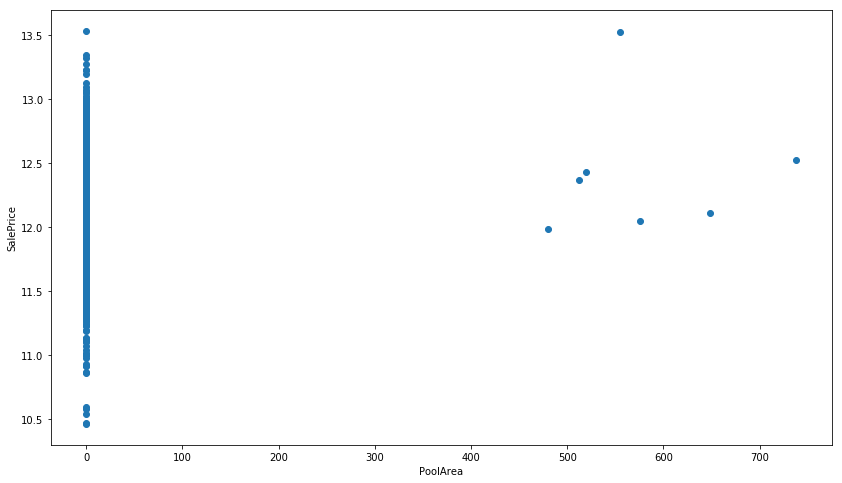

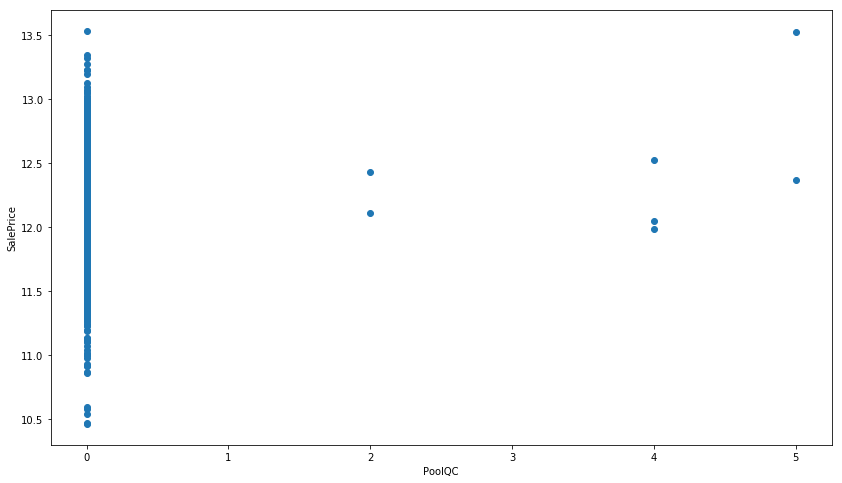

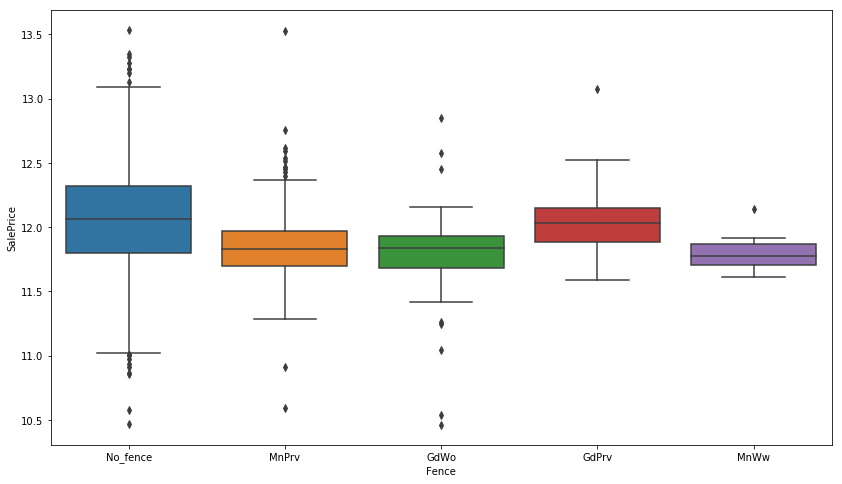

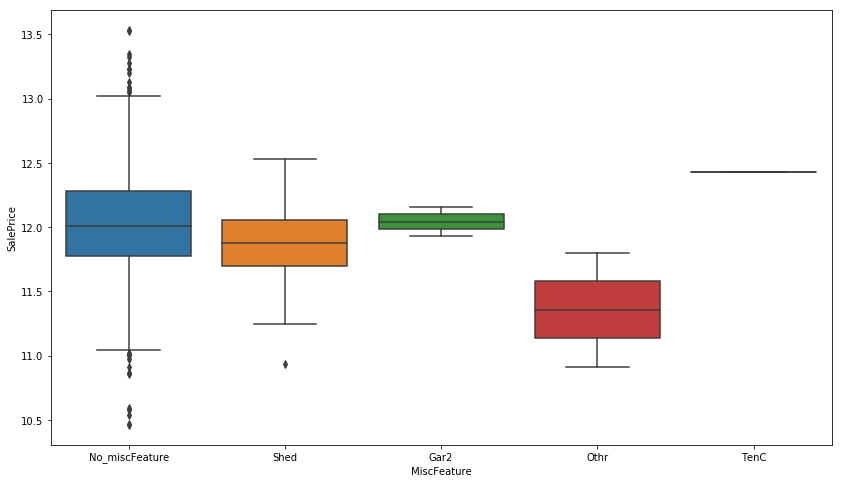

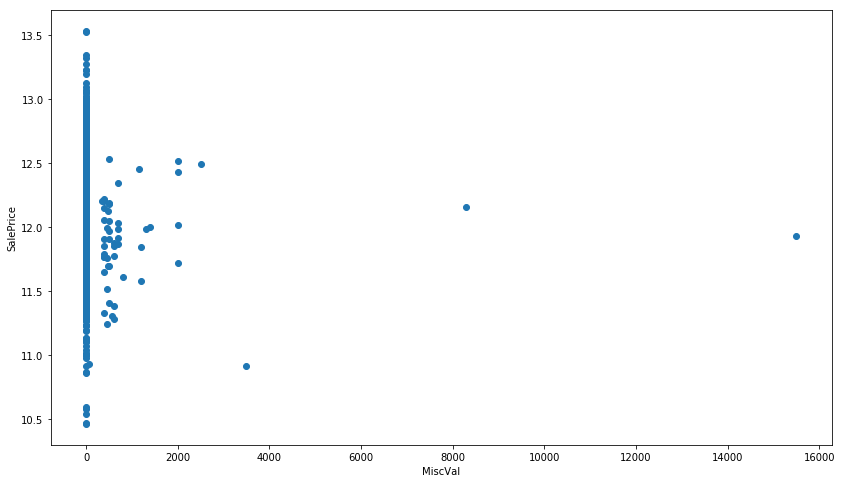

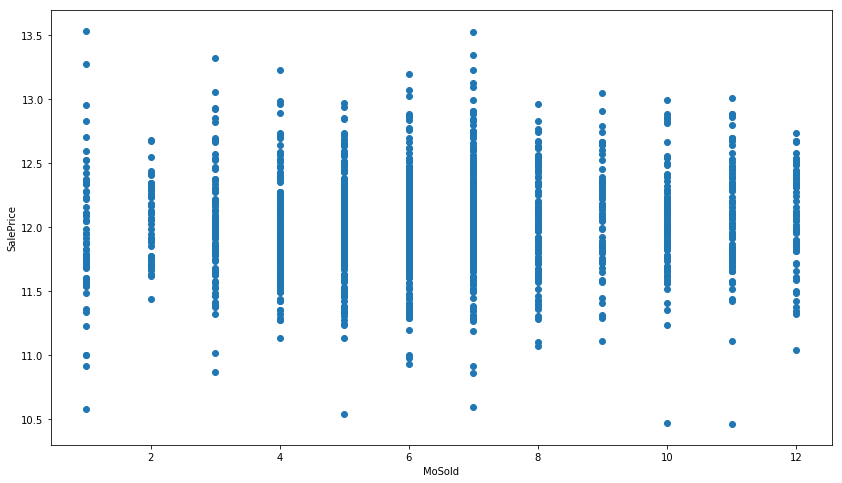

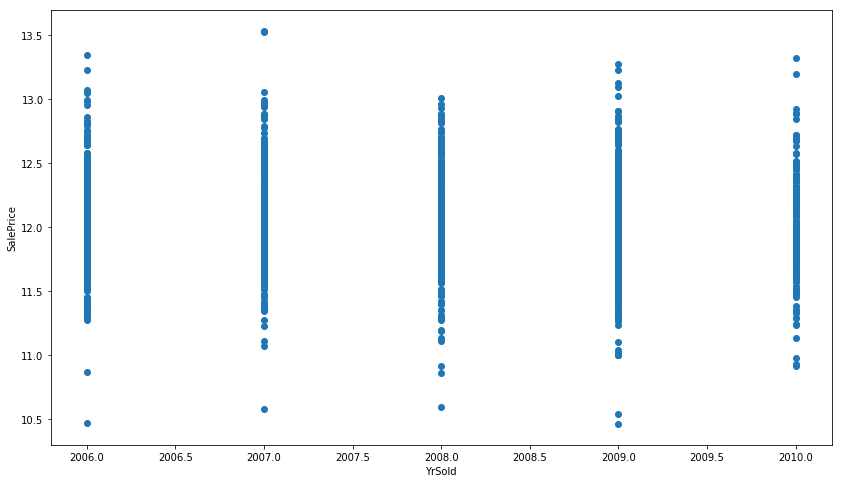

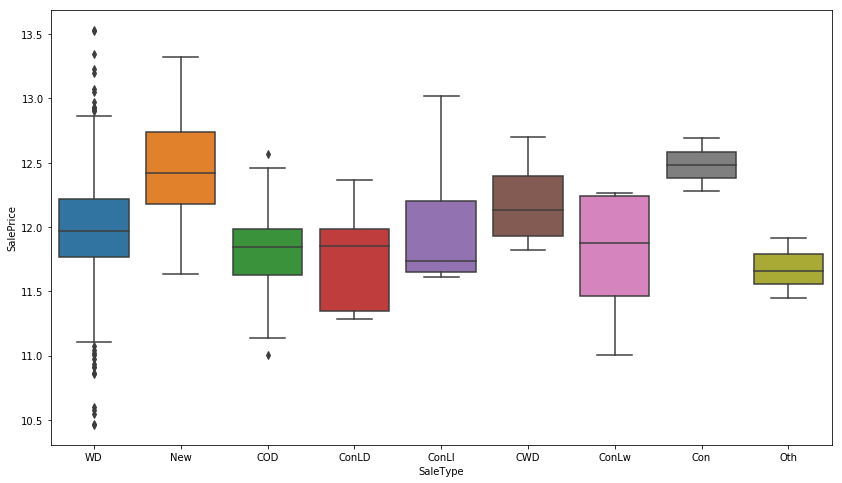

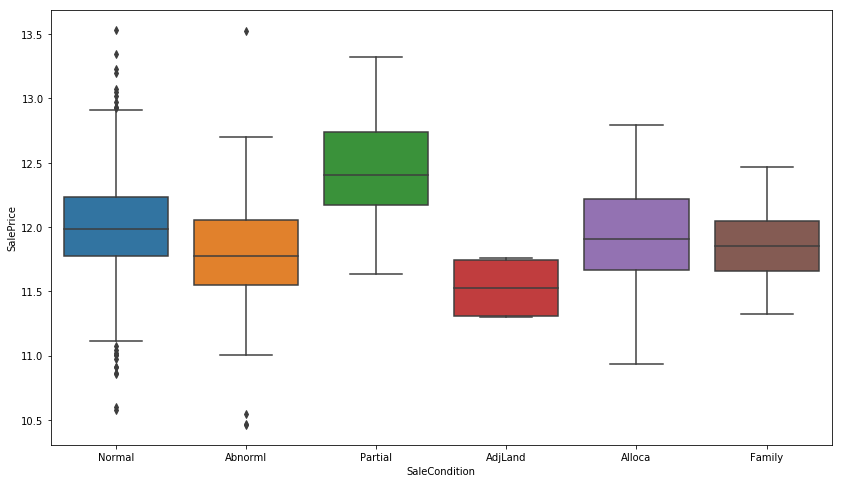

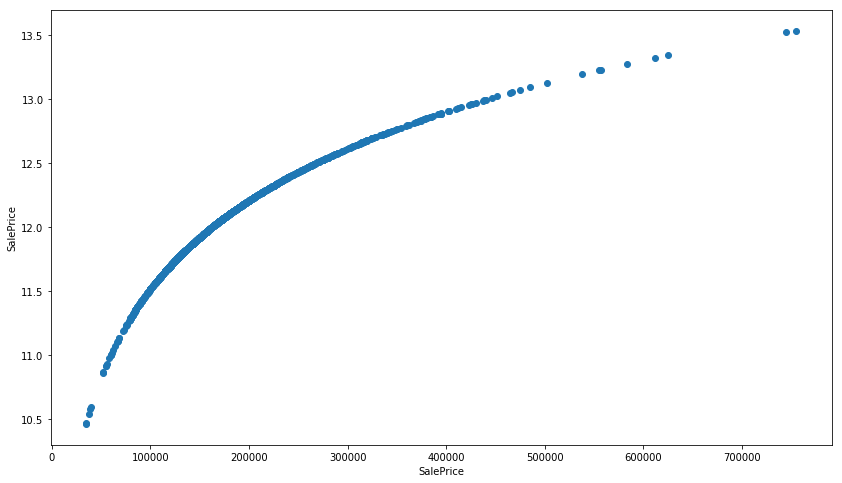

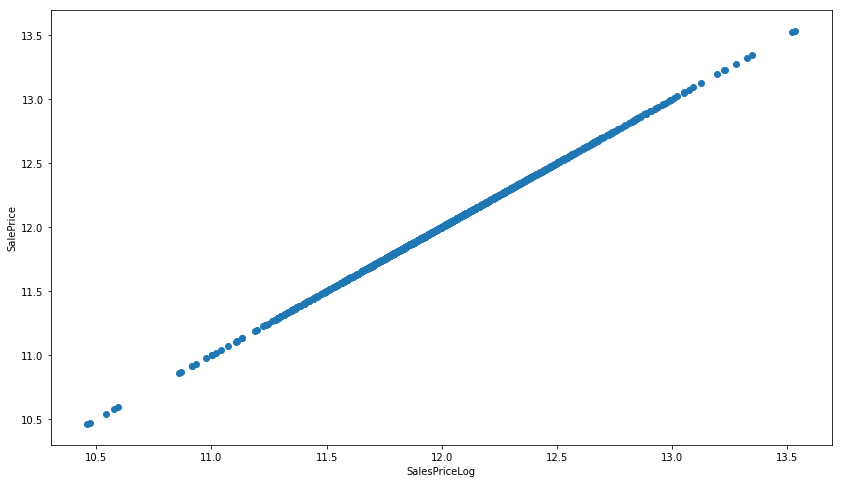

In [481]:
#Change y to log(y)
housing['SalesPriceLog'] = list(map(np.log,housing['SalePrice']))

#run graphs on log
for col in list(housing.columns.values)[1:len(housing.columns)]:
    try:
        if np.issubdtype(housing[col].dtype, np.number) == True:
            plt.figure(figsize=(14,8))
            matplotlib.pyplot.scatter(housing[col],housing.SalesPriceLog)
        else:
            plt.figure(figsize=(14,8))
            sns.boxplot(x=col, y="SalesPriceLog", data=housing)
            print(housing.groupby(col).agg({target:['count','mean']})) 
        plt.xlabel(col)
        plt.ylabel("SalePrice")
        plt.show()
    except:
        pass

housing.drop('SalesPriceLog',axis=1,inplace=True)

In [483]:
features = list(housing.columns.values)
#correlations = list(housing.corr(method="pearson")['SalePrice'])
missing = list(housing.apply(lambda x: 1-(x.count()/len(housing)), axis=0))
datatype = housing.dtypes
fc = list(zip(features,zip(missing,datatype)))
fc
features = dict(fc)
#features = pd.DataFrame.from_dict(features)
#features

In [484]:
features1 = pd.DataFrame.from_dict(features)
features1

import csv
 
myFile = open('test2.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    for key, value in features.items():
        writer.writerow([key, value])



YrSold  MoSold
2006    1         201090.000000
        2         194322.222222
        3         184982.200000
        4         174312.814815
        5         158928.289474
        6         172283.333333
        7         183211.059701
        8         196239.956522
        9         223768.866667
        10        172356.708333
        11        213285.000000
        12        185545.000000
2007    1         183234.615385
        2         176301.750000
        3         176567.782609
        4         170772.608696
        5         169873.511628
        6         179725.813559
        7         195396.843137
        8         183941.075000
        9         195533.818182
        10        215428.812500
        11        197709.333333
        12        214414.500000
2008    1         178504.692308
        2         159370.000000
        3         178505.277778
        4         159293.346154
        5         188334.473684
        6         169730.941176
        7         174562.

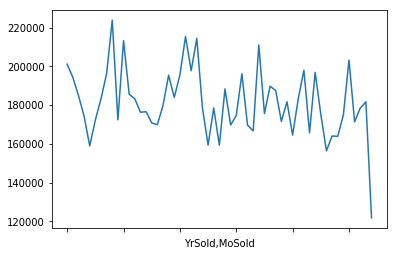

In [149]:
a = housing.groupby(['YrSold','MoSold']).mean()
print(a['SalePrice'])
(a['SalePrice']).plot()

In [486]:
sum(housing.isnull().values) #missingness remaining

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 37,  0, 38, 37,
        0, 38,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, 81, 81, 81,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

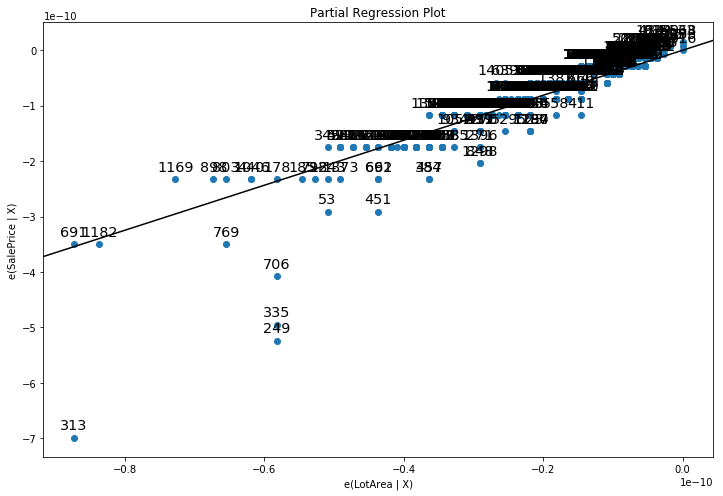

In [207]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.plot_partregress("SalePrice", 'LotArea', ['LotArea','SalePrice'], data=housing, ax=ax)

In [492]:
# #failed added variable plot /partial regression plot 
# for col in list(housing.columns.values)[1:len(housing.columns)]:
#     try:
#         if np.issubdtype(housing[col].dtype, np.number) == True:
#             fig, ax = plt.subplots(figsize=(12,8))
#             #fig = sm.graphics.plot_partregress("SalePrice", col, [col], data=housing, ax=ax)
#         else:
#             sns.boxplot(x=col, y="SalePrice", data=housing)
#             print(housing.groupby(col).agg({'SalePrice':['count','mean']}))
#         plt.xlabel(col)
#         plt.ylabel("SalePrice")
#         plt.show()
#     except:
#         pass  
#     fig, ax = plt.subplots(figsize=(12,8))
#     fig = sm.graphics.plot_partregress("SalePrice", 'LotArea', ['LotArea'], data=housing, ax=ax)

In [498]:
all_columns = " + ".join(housingNumeric.columns[1:]) #replace 5 with -1
all_columns = all_columns.replace('SalePrice + ','')
my_formula = "SalePrice~" + all_columns
my_formula

display(housingNumeric.head())
sum(housingNumeric.MSSubClass_nan)

Id  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1         65.0     8450            7            5       2003   
1   2         80.0     9600            6            8       1976   
2   3         68.0    11250            7            5       2001   
3   4         60.0     9550            7            5       1915   
4   5         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  ExterQual  ExterCond  BsmtCond  BsmtFinSF1  \
0          2003       196.0          4          3         3         706   
1          1976         0.0          3          3         3         978   
2          2002       162.0          4          3         3         486   
3          1970         0.0          3          3         4         216   
4          2000       350.0          4          3         3         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  \
0           0        150          856          5       856       854   
1           0        284         1262          5      1262         0   
2           0        434          920          5       920       866   
3           0        540          756          4       961       756   
4           0        490         1145          5      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  \
0             3             1            4             8           0   
1             3             1            3             6           1   
2             3             1            4             6           1   
3             3             1            4             7           1   
4             4             1            4             9           1   

   FireplaceQu  GarageYrBlt  GarageCars  GarageArea  GarageQual  GarageCond  \
0            0       2003.0           2         548           3           3   
1            3       1976.0           2         460           3           3   
2            3       2001.0           2         608           3           3   
3            4       1998.0           3         642           3           3   
4            3       2000.0           3         836           3           3   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0           0           61              0          0            0         0   
1         298            0              0          0            0         0   
2           0           42              0          0            0         0   
3           0           35            272          0            0         0   
4         192           84              0          0            0         0   

   PoolQC  MiscVal  MoSold  YrSold  SalePrice  MSSubClass_s160  \
0       0        0       2    2008     208500                0   
1       0        0       5    2007     181500                0   
2       0        0       9    2008     223500                0   
3       0        0       2    2006     140000                0   
4       0        0      12    2008     250000                0   

   MSSubClass_s180  MSSubClass_s190  MSSubClass_s20  MSSubClass_s30  \
0                0                0               0               0   
1                0                0               1               0   
2                0                0               0               0   
3                0                0               0               0   
4                0                0               0               0   

   MSSubClass_s40  MSSubClass_s45 

0

In [504]:
housing2 = housing.copy(deep=True)

housing2['firstFlrSF'] = list(housing2['1stFlrSF'])
housing2['secondFlrSF'] = list(housing2['2ndFlrSF'])
housing2['threeFlrSF'] = list(housing2['3SsnPorch'])
#housing2['Exteriorfirst_Wd_Sdng'] = list(housing2['Exterior1st_Wd Sdng'])

housing2.drop(['1stFlrSF','2ndFlrSF','3SsnPorch'],axis=1,inplace=True)

housing2 = housing2.replace(np.nan, 0, regex=True)
all_columns = " + ".join(housing2.columns[1:]) #replace 5 with -1
all_columns = all_columns.replace('SalePrice + ','')
my_formula = "SalePrice~" + all_columns
my_formula
housing_model = ols(my_formula, data=housing2).fit()
print(housing_model.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     108.5
Date:                Fri, 17 Aug 2018   Prob (F-statistic):               0.00
Time:                        10:44:45   Log-Likelihood:                -15984.
No. Observations:                1460   AIC:                         3.264e+04
Df Residuals:                    1124   BIC:                         3.442e+04
Df Model:                         335                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [505]:
housing2 = housing.copy(deep=True)

housing['SalesPriceLog'] = list(map(np.log,housing['SalePrice']))

housing2['firstFlrSF'] = list(housing2['1stFlrSF'])
housing2['secondFlrSF'] = list(housing2['2ndFlrSF'])
housing2['threeFlrSF'] = list(housing2['3SsnPorch'])
#housing2['Exteriorfirst_Wd_Sdng'] = list(housing2['Exterior1st_Wd Sdng'])

housing2.drop(['1stFlrSF','2ndFlrSF','3SsnPorch','SalePrice'],axis=1,inplace=True)

housing2 = housing2.replace(np.nan, 0, regex=True)
all_columns = " + ".join(housing2.columns[1:]) #replace 5 with -1
all_columns = all_columns.replace('SalesPriceLog + ','')
my_formula = "SalesPriceLog~" + all_columns
my_formula
housing_model = ols(my_formula, data=housing2).fit()
print(housing_model.summary())

                            OLS Regression Results                            
Dep. Variable:          SalesPriceLog   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     62.31
Date:                Fri, 17 Aug 2018   Prob (F-statistic):               0.00
Time:                        10:46:58   Log-Likelihood:                 1437.0
No. Observations:                1460   AIC:                            -2204.
Df Residuals:                    1125   BIC:                            -433.1
Df Model:                         334                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

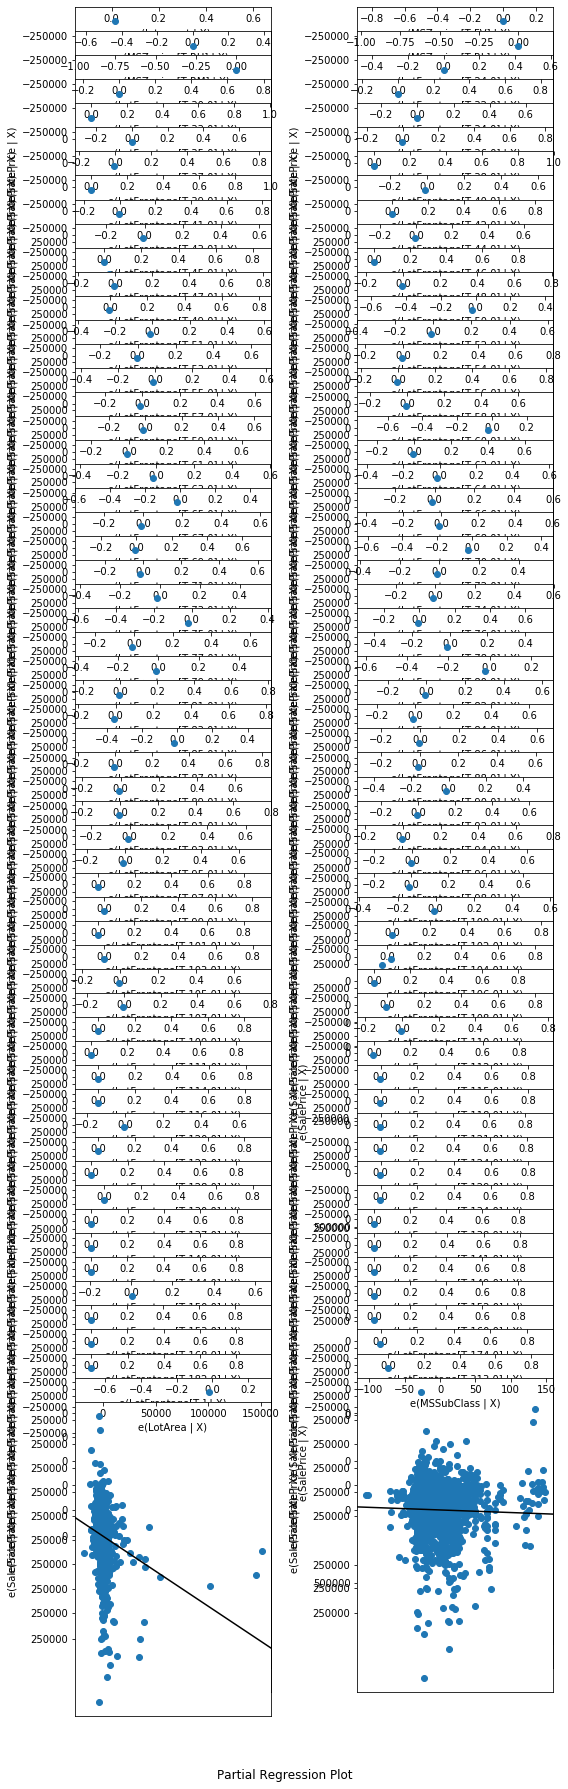

In [257]:
#result = lm(formula=my_formula, data=DF)

fig = plt.figure(figsize=(8,5))
#fig.tight_layout()
fig = sm.graphics.plot_partregress_grid(housing_model, fig=fig)
fig.subplots_adjust(left=None, bottom=2.0, right=None, top=5.0, wspace=None, hspace=None)


In [258]:
fig.subplots_adjust(left=None, bottom=0.0, right=None, top=5.0, wspace=None, hspace=None)

RuntimeError: 

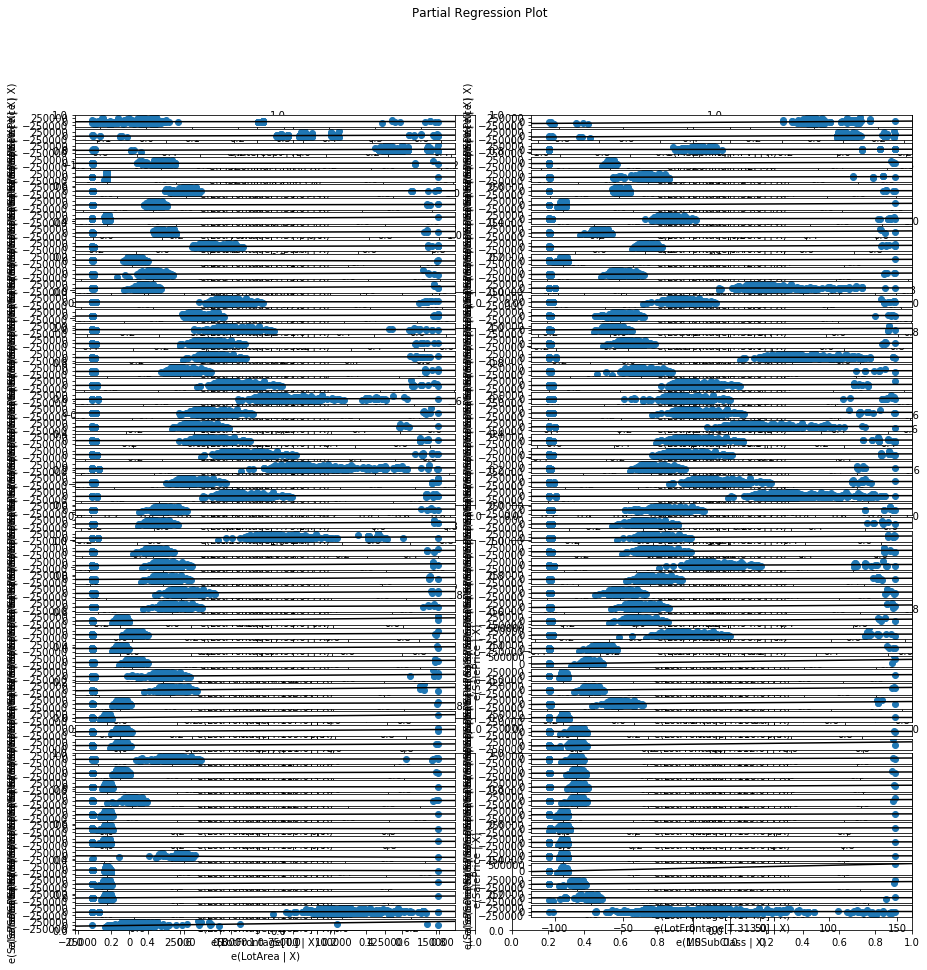

In [239]:
#result = lm(formula=my_formula, data=DF)
#fig, axs = plt.subplots(4,4,figsize=(15,15))
sm.graphics.plot_partregress_grid(housing_model, fig=fig)

TypeError: 'Figure' object does not support indexing

In [263]:
housing.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt       object


In [303]:
housing['TotalSF'] = housing['TotalBsmtSF'] + housing['1stFlrSF'] + housing['2ndFlrSF']